# INSTRUCTIONS:

                                                                                 
 
1) INPUT DATA FOR THE RESPECTIVE MONTH HAS TO BE CHANGED AT CELL 1 ALONG WITH THE PATH , Eg. df_final=pd.read_excel(path & file     name).

   NOTE:INCASE SHEET NAMES HAVE BEEN CHANGED, KINDLY ENTER THE SHEET NAME FOR ALLOCATION , PROFICIENCY AND PROFILE COMPLETENESS
   ANALYSIS
   Eg.  path/name,sheet_name='SHEET NAME')

2) OUTPUT FILE NAME AND PATH TO BE CHANGED AT CELL 2:

   OUTPUT FILE WILL BE SAVED AS "WIPRO REPORT".

   
   
4) OUTPUT FILE LOCATION IN CELL 2, KINDLY CHANGE PATH AS PER YOUR SYSTEM
   EXAMPLE: writer = pd.ExcelWriter(r'C:\Users\Admin\OneDrive\Desktop\'Wipro Report-...
   CURRENT PATH IS DESKTOP 
   NOTE:DO NOT remove the r which is placed before the path!

5) CLICK ON CELL , THEN RUN ALL TO RUN THE SCRIPT
  

In [852]:

import pandas as pd
import matplotlib.pyplot as plt

#INPUT FILES:

#processed data for analysis,Data sheet (Data sheet was cleaned and saved separately)

df_final = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Sean\2021 data edge networks\june\processed_data_final_wipro_may.xlsx')

#allocation data analysis:
df_allocation = pd.read_excel(r'C:\Users\Admin\Downloads\allocation_data_analysis2021_06_01.xlsx', sheet_name='data')


#transaction proficiency analysis , 4 sheets:

# mand_skill_in_supply_skills:
df_mand_skill_in_supply_skills = pd.read_excel(r'C:\Users\Admin\Downloads\transaction_data_analysis_new_2021_06_01.xlsx', sheet_name='mand_skill_in_supply_skills')

#mand_skill_in_project_skills
df_mand_skill_in_project_skills = pd.read_excel(r'C:\Users\Admin\Downloads\transaction_data_analysis_new_2021_06_01.xlsx', sheet_name='mand_skill_in_project_skills')

#mand_sk_in_certificate_skills
df_mand_sk_in_certificate_skill = pd.read_excel(r'C:\Users\Admin\Downloads\transaction_data_analysis_new_2021_06_01.xlsx', sheet_name='mand_sk_in_certificate_skill')

#mand_sk_in_recent_project_skill
df_mand_sk_in_recent_project_skill = pd.read_excel(r'C:\Users\Admin\Downloads\transaction_data_analysis_new_2021_06_01.xlsx', sheet_name='rec_proj_sk_and_prof_match')


#profile completeness analysis

df_prof_comp1 = pd.read_excel(r'C:\Users\Admin\Downloads\profile_completness_data_creation_part1.xlsx')
df_prof_comp2 = pd.read_excel(r'C:\Users\Admin\Downloads\profile_completness_data_creation_part2.xlsx')

In [853]:
#OUTPUT FILE:

import xlsxwriter
from datetime import datetime
from calendar import  month_name, month_abbr
d = datetime.now()
last_month=month_abbr[d.month - 1] 
current_year=d.year


writer = pd.ExcelWriter(r'C:\Users\Admin\OneDrive\Desktop\'Wipro Automated Report MAY.xlsx',engine='xlsxwriter')

In [854]:
df_final.shape

(7673, 44)

In [855]:
def remove_str(string):
    string = string.replace("Supply Side: Supply's recent project is older than 1 year is main reason for invalid transaction", 'Recent project older than 1 yr')
    string = string.replace("Supply Side: Supply having less than 2 skills is main reason for invalid transaction", 'Less than 2 skills')
    string = string.replace("Supply Side: Supply not having any project and skill info is main reason for invalid transaction", 'No project or skill info')
    return string
df_final['flag_for_invalid_transaction'] = df_final.apply(lambda x: remove_str(x["flag_for_invalid_transaction"]), axis=1)


In [856]:
df_final.head()

,uni_key,demand_guid,emp_no,proposal_date,rejection_date,rejected_reason,score,DEM BUSL,PROPOSAL SOURCE DESC,PROJECT ACQUIRED SKILL,...,valid_transcation,proposed_flag,allocation_flag,rejection_flag,emp_stat,ALLOCATED ON,derived_indent_geography,location,COUNTRY,INDENT NO
0,p0pld6DugSDdZ59au2wr4bfuZD0w3ThSji2ESOF8H18=::...,p0pld6DugSDdZ59au2wr4bfuZD0w3ThSji2ESOF8H18=,yqrSLCSkg1N0rWWxsgW209kE+u/JxED8seaU2mj5q+w=,2021-05-27 00:00:00,2021-05-28 00:00:00,SYSTEM REJECT - EMPLOYEE ALLOCATED,84,IDAE,Skill Match Workbench by RM,"Oracle -L2-39,WCF - Windows Communication Foun...",...,False,proposed,not_allocated,rejected,Virtual,NaN,ZIND,Pune,INDIA,Rek96djQkD2RSGr3wPQ5Yq3OFcCteLI2eA1GyCsvOdY=
1,sfyau5mQKDZQC/8di0XRFJpl0A6T8acD0/F5n+cc1Ko=::...,sfyau5mQKDZQC/8di0XRFJpl0A6T8acD0/F5n+cc1Ko=,Lzadtk1lXAIaE5ZWK25YNFwN4qArgZsfu+hXN9XFbFU=,2021-05-27 00:00:00,2021-05-28 00:00:00,SYSTEM REJECT - EMPLOYEE ALLOCATED,63,IDAD,Ims by employee,"Unix Shell Scripting -L2-6,PL-SQL -L2-4,Autosy...",...,True,proposed,not_allocated,rejected,Existing,NaN,ZIND,Chennai,INDIA,BNqWQ25JN2KGJfd5S0t2knHEPADZb9NPl3bJL5jWKFk=
2,2i0VQWqLIo4eQ40HXi6Ypdz6/1RUXy8FqQVlFfGgvbQ=::...,2i0VQWqLIo4eQ40HXi6Ypdz6/1RUXy8FqQVlFfGgvbQ=,ISmvjCEJQECNgrmq9v4CR26HilZzoeX5uqXWRKjxTR0=,2021-05-06 00:00:00,2021-05-31 00:00:00,SYSTEM REJECT - EMPLOYEE ALLOCATED,40,GCRS,Skill Match Workbench by RM,"Peoplesoft Apps Admin Support -L1-47,Linux Adm...",...,False,proposed,not_allocated,rejected,Existing,NaN,ZIND,Bengaluru,INDIA,JWQRSlgYxyRDoCKPl0GFhwQqbELSBmj2VPw7eAmVZBk=
3,XlRJXfSnbj0T3qXI0gH1N1XdDU1x2xCMdLi3KYT4ntQ=::...,XlRJXfSnbj0T3qXI0gH1N1XdDU1x2xCMdLi3KYT4ntQ=,pQXS4RKQq5xw+8Kaou8y0MZ0UYLh8d8PbnktEGquK7Y=,2021-05-24 00:00:00,NaN,,62,IDDX,Skill Match Workbench by RM,"Mobile Web App development -L1-19,Matlab Simul...",...,True,proposed,not_allocated,not_rejected,Existing,NaN,ZIND,Bengaluru,INDIA,BNqWQ25JN2KGJfd5S0t2kvjZHqnNIGwKiFrY0gPzr1U=
4,BKZhPL6J8b5ODklNXvFX859Lj0sIitCe37zq3IdPM7c=::...,BKZhPL6J8b5ODklNXvFX859Lj0sIitCe37zq3IdPM7c=,MAGyDZrQcSHJFBg1SVqM3sQV2ZYfnnyBiie1pMimzO8=,2021-05-06 00:00:00,2021-05-18 00:00:00,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,62,IDAD,Skill Match Workbench by RM,".NET -L2-58,Bootstrap -L1-47,HTML 5 -L1-47,C# ...",...,True,proposed,not_allocated,rejected,Existing,NaN,ZIND,Greater Noida,INDIA,4QuzkmCRT/PnzRlFLxlcCHVzrdquQEzbvtztNs6Pm8g=


In [857]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   uni_key                                   7673 non-null   object        
 1   demand_guid                               7673 non-null   object        
 2   emp_no                                    7673 non-null   object        
 3   proposal_date                             7673 non-null   object        
 4   rejection_date                            4103 non-null   object        
 5   rejected_reason                           7673 non-null   object        
 6   score                                     7673 non-null   int64         
 7   DEM BUSL                                  7673 non-null   object        
 8   PROPOSAL SOURCE DESC                      7673 non-null   object        
 9   PROJECT ACQUIRED SKILL        

In [858]:
df_final.rename(columns={"DEM BUSL":"Business line","flag_for_invalid_transaction":"Flag for invalid transaction","essential_skills":"Essential Skills"},inplace=True)

In [859]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'rejected_reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO'],
      dtype='object')

In [860]:
df_final["Business line"].value_counts()

IDAE    2903
IDCT    1183
IDAD    1108
IDDX     803
ICCI     501
IDED     364
IDDC     270
IDEU     216
IDA2      71
GCRS      69
IDAP      46
SF        38
IDA1      36
IDOT      20
CIEU      13
CIAP      10
CIA1       7
APME       4
CIA2       3
EREU       2
CREU       1
EURP       1
CRA2       1
ERA1       1
ERA2       1
AMR1       1
Name: Business line, dtype: int64

In [861]:
#invalid transaction analysis

In [862]:
#inavlid reason vs business line

df1= pd.pivot_table(df_final, index =["Flag for invalid transaction"],columns="Business line",aggfunc ="size",fill_value=0)
df1['Total'] = df1.sum(axis=1)

df1.name = "Business Line : Invalid Reason Distribution"
df1.reset_index(inplace=True)
df1.shape
df1

Business line,Flag for invalid transaction,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CRA2,CREU,ERA1,...,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF,Total
0,Less than 2 skills,0,0,2,0,1,0,0,0,0,...,67,3,58,2,15,5,10,0,12,231
1,No project or skill info,0,0,0,0,0,0,0,0,0,...,67,1,10,0,14,23,9,0,3,172
2,Recent project older than 1 yr,0,2,1,0,4,6,1,0,1,...,1294,22,587,138,312,149,115,9,1,3406
3,blank,1,2,4,3,5,7,0,1,0,...,1475,20,528,130,462,187,82,11,22,3864


In [863]:
df1.shape

(4, 28)

Business line,Flag for invalid transaction,IDAE,IDCT,IDAD,IDDX,ICCI
0,Less than 2 skills,67,58,38,15,12
1,No project or skill info,67,10,21,14,21
2,Recent project older than 1 yr,1294,587,482,312,197
3,blank,1475,528,567,462,271
4,Total,2903,1183,1108,803,501


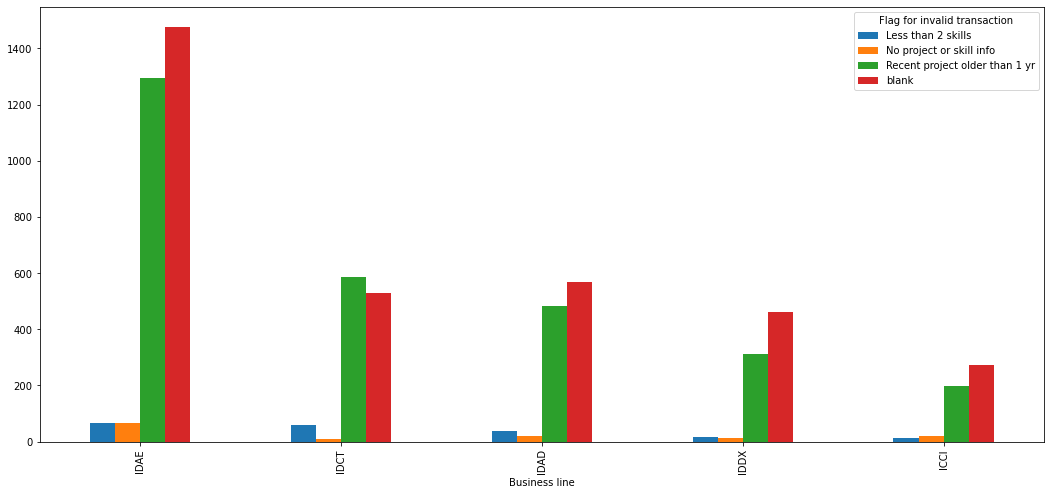

In [864]:
# top 5 business lines
df2= pd.pivot_table(df_final, index =["Business line"],columns="Flag for invalid transaction",aggfunc ="size",fill_value=0)



df2['Total'] = df2.sum(axis=1)
df2=df2.sort_values(by="Total",ascending=False)
df2=df2.head(5)

df2 = df2.drop('Total', axis = 1)
df2.plot.bar(stacked=False,figsize=(18,8))
plt.savefig("americanpic1a.png")
df2['Total'] = df2.sum(axis=1)
df2=df2.transpose()
df2.reset_index(inplace=True)

df2.name = "Top 5 Business lines : Invalid Reason Distribution"
df2


In [865]:
# excel report formating

#import xlsxwriter
#writer = pd.ExcelWriter(r'C:\Users\Admin\OneDrive\Desktop\'Wipro Report-'+last_month+str(current_year)+'.xlsx',engine='xlsxwriter')
workbook=writer.book
worksheet0=workbook.add_worksheet('General')
worksheet=workbook.add_worksheet('Invalid transaction analysis')
worksheet1=workbook.add_worksheet('Skill Analysis')

worksheet3=workbook.add_worksheet('Rejection Analysis')
worksheet4=workbook.add_worksheet('Allocation Analysis')
worksheet5=workbook.add_worksheet('Proficiency Analysis')
worksheet6=workbook.add_worksheet('Profile Completness Analysis')

writer.sheets['General'] = worksheet0
writer.sheets['Invalid transaction analysis'] = worksheet
writer.sheets['Skill Analysis'] = worksheet1

writer.sheets['Rejection Analysis'] = worksheet3
writer.sheets['Allocation Analysis'] = worksheet4
writer.sheets['Proficiency Analysis'] = worksheet5
writer.sheets['Profile Completness Analysis'] = worksheet6

cell_format = workbook.add_format({'bold': True,'font_size':16})
cell_format1 = workbook.add_format({'bold': True,'bg_color':'#8DB4E2','font_size':20})
cell_format1.set_align("vcenter")
cell_format2 = workbook.add_format({'bold': False,'bg_color':'#D9D9D9','font_size':20})
cell_format3 = workbook.add_format({'bold': True})
cell_format3.set_align('center')

border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})

header_format = workbook.add_format()
header_format.set_bg_color("#B8CCE4")
header_format.set_align('center')

new_format = workbook.add_format()
new_format.set_align('center')

new_format1 = workbook.add_format()
new_format1.set_align('left')

new_format2 = workbook.add_format({'bold': True})
new_format2.set_align('left')

title_format = workbook.add_format()
title_format.set_bg_color("#8DB4E2")









system_rating,Similarity,1,2,3,4,5,Total
0,Non-similar,174,943,0,36,11,1164
1,similar,13,96,1754,680,102,2645
2,Total,187,1039,1754,716,113,3809


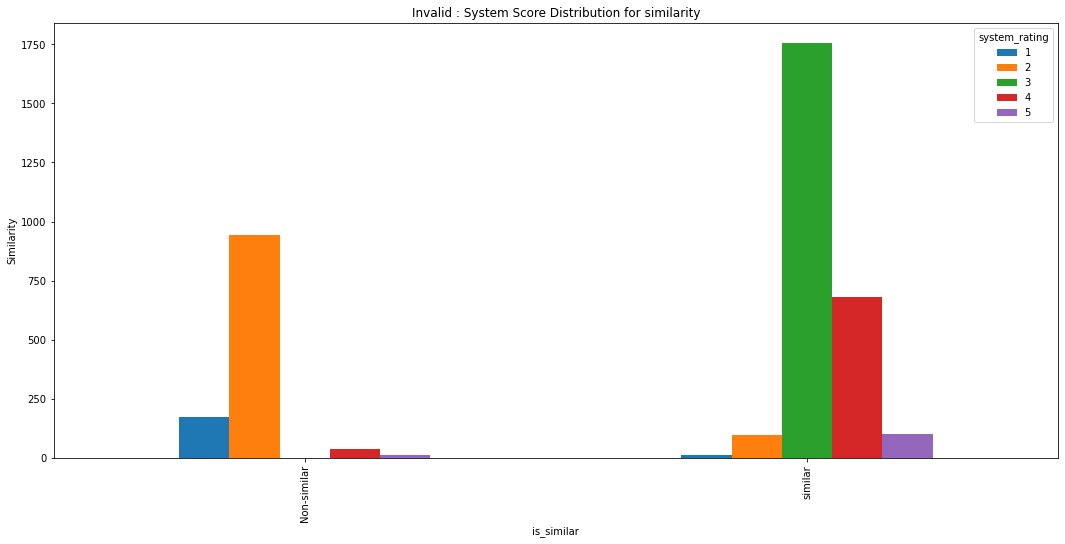

In [866]:
#invalid : systems score vs similarity

x=df_final[df_final["valid_transcation"]==False]


df0 = pd.pivot_table(x, index =["is_similar"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df0=df0.rename(index={'Yes': 'similar','No': 'Non-similar'})

df0.plot.bar(stacked=False,figsize=(18,8))
plt.title("Invalid : System Score Distribution for similarity")
plt.ylabel("Similarity")
plt.savefig("americanpic0.png",bbox_inches = 'tight')

df0['Total'] = df0.sum(axis=1)
df0.loc["Total"] = df0.sum()


df0.reset_index(inplace=True)
df0.name="System Score Distribution for Similarity"

worksheet.write_string(3, 2, df0.name,cell_format)
start_row=0+5
bottom_border=start_row+df0.shape[0]-1
top_right=2+df0.shape[1]-1

df0.rename(columns={"is_similar":"Similarity"},inplace=True)
df0.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row , startcol=2,index=False,header=False)

worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df0.columns.values):
    worksheet.write(4, 2+col_num, value, header_format)
worksheet.insert_image(start_row-1,top_right+5, 'americanpic0.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)
df0

In [867]:
#df1 and df2 :


worksheet.write_string(bottom_border+3+11, 2, df1.name,cell_format)


start_row=bottom_border+5+11
bottom_border=start_row+df1.shape[0]-1
top_right=2+df1.shape[1]-1



df1.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
    
worksheet.write_string(bottom_border+3, 2, df2.name,cell_format)
start_row=bottom_border+5
bottom_border=start_row+df2.shape[0]-1
top_right=2+df2.shape[1]-1   


    


df2.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,header=False,index=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
    
worksheet.insert_image(start_row-1,top_right+5, 'americanpic1a.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet.write(bottom_border, 2,"Total",new_format2)
df2

worksheet.set_row(1,20,title_format)

worksheet.write(1, 2,"INVALID TRANSACTION ANALYSIS",cell_format1)
worksheet.set_row(bottom_border,15,cell_format3)




In [868]:
# various calculation after group by on "Business line" and storing them in a table
#business line analysis table created step by step just for understanding

x=df_final[df_final["valid_transcation"]==True]


In [869]:
x0=df_final[df_final["valid_transcation"]==False]

In [870]:
x1=x[x["is_similar"]=="Yes"]


In [871]:
x2=x[x["is_similar"]=="No"]


In [872]:
dftest = pd.pivot_table(x, index =["valid_transcation"],columns="Business line",aggfunc ="size",fill_value=0)
dftest

Business line,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CREU,EREU,GCRS,ICCI,...,IDAD,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF
valid_transcation,,,,,,,,,,,,,,,,,,,,,
True,1,2,4,3,5,7,1,1,28,271,...,567,1475,20,528,130,462,187,82,11,22


In [873]:
dftest0 = pd.pivot_table(x0, index =["valid_transcation"],columns="Business line",aggfunc ="size",fill_value=0)
dftest0

Business line,APME,CIA1,CIAP,CIEU,CRA2,ERA1,ERA2,EREU,EURP,GCRS,...,IDAD,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF
valid_transcation,,,,,,,,,,,,,,,,,,,,,
False,2,3,5,6,1,1,1,1,1,41,...,541,1428,26,655,140,341,177,134,9,16


In [874]:
dftest1 = pd.pivot_table(x1, index =["is_similar"],columns="Business line",aggfunc ="size",fill_value=0)
dftest1

Business line,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CREU,EREU,GCRS,ICCI,...,IDAD,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF
is_similar,,,,,,,,,,,,,,,,,,,,,
Yes,1,2,4,3,5,3,1,1,14,185,...,328,1090,9,427,47,341,138,57,8,1


In [875]:
dftest2 = pd.pivot_table(x2, index =["is_similar"],columns="Business line",aggfunc ="size",fill_value=0)
dftest2

Business line,CIEU,GCRS,ICCI,IDA1,IDA2,IDAD,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF
is_similar,,,,,,,,,,,,,,,
No,4,14,86,1,4,239,385,11,101,83,121,49,25,3,21


In [876]:
df3=pd.concat([dftest,dftest0,dftest1,dftest2])
df3

,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CREU,EREU,GCRS,ICCI,...,IDDC,IDDX,IDED,IDEU,IDOT,SF,CRA2,ERA1,ERA2,EURP
True,1.0,2.0,4.0,3.0,5.0,7,1.0,1.0,28,271,...,130,462,187,82,11,22,NaN,NaN,NaN,NaN
False,NaN,2.0,3.0,NaN,5.0,6,NaN,1.0,41,230,...,140,341,177,134,9,16,1.0,1.0,1.0,1.0
Yes,1.0,2.0,4.0,3.0,5.0,3,1.0,1.0,14,185,...,47,341,138,57,8,1,NaN,NaN,NaN,NaN
No,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,14,86,...,83,121,49,25,3,21,NaN,NaN,NaN,NaN


In [877]:
df3.rename(index={'Yes': 'valid+similar',True:"Valid",False:"invalid",'No': 'valid+Non-similar'}, inplace=True)

In [878]:
df3

,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CREU,EREU,GCRS,ICCI,...,IDDC,IDDX,IDED,IDEU,IDOT,SF,CRA2,ERA1,ERA2,EURP
Valid,1.0,2.0,4.0,3.0,5.0,7,1.0,1.0,28,271,...,130,462,187,82,11,22,NaN,NaN,NaN,NaN
invalid,NaN,2.0,3.0,NaN,5.0,6,NaN,1.0,41,230,...,140,341,177,134,9,16,1.0,1.0,1.0,1.0
valid+similar,1.0,2.0,4.0,3.0,5.0,3,1.0,1.0,14,185,...,47,341,138,57,8,1,NaN,NaN,NaN,NaN
valid+Non-similar,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,14,86,...,83,121,49,25,3,21,NaN,NaN,NaN,NaN


In [879]:
df3=df3.fillna(0)

In [880]:
df3.loc["Total"] = df3.sum()
df3.loc["Accuracy(valid+similar/total valid)"]=(df3.loc["valid+similar"]/df3.loc["Valid"])*100
df3['Total'] = df3.sum(axis=1)
df3=df3.round(1)
df3=df3.fillna(0)
df3.name = "Valid-Invalid transaction analysis on  Business line"
df3.reset_index(inplace=True)
df3

worksheet.write_string(bottom_border+3+11, 2, df3.name,cell_format)
start_row=bottom_border+5+11
bottom_border=start_row+df3.shape[0]-1
top_right=2+df3.shape[1]-1


df3.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.set_row(bottom_border-1,15,cell_format3)

worksheet.write(bottom_border, 2,"Total",new_format2)
worksheet.write(bottom_border-1, 2,"Accuracy (valid+similar/total valid)",new_format2)

df3
#final table df3

,index,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CREU,EREU,GCRS,...,IDDX,IDED,IDEU,IDOT,SF,CRA2,ERA1,ERA2,EURP,Total
0,Valid,1.0,2.0,4.0,3.0,5.0,7.0,1.0,1.0,28.0,...,462.0,187.0,82.0,11.0,22.0,0.0,0.0,0.0,0.0,3864.0
1,invalid,0.0,2.0,3.0,0.0,5.0,6.0,0.0,1.0,41.0,...,341.0,177.0,134.0,9.0,16.0,1.0,1.0,1.0,1.0,3809.0
2,valid+similar,1.0,2.0,4.0,3.0,5.0,3.0,1.0,1.0,14.0,...,341.0,138.0,57.0,8.0,1.0,0.0,0.0,0.0,0.0,2717.0
3,valid+Non-similar,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,14.0,...,121.0,49.0,25.0,3.0,21.0,0.0,0.0,0.0,0.0,1147.0
4,Total,2.0,6.0,11.0,6.0,15.0,20.0,2.0,3.0,97.0,...,1265.0,551.0,298.0,31.0,60.0,1.0,1.0,1.0,1.0,11537.0
5,Accuracy(valid+similar/total valid),100.0,100.0,100.0,100.0,100.0,42.9,100.0,100.0,50.0,...,73.8,73.8,69.5,72.7,4.5,0.0,0.0,0.0,0.0,1633.2


system_rating,Flag for invalid transaction,1,2,3,4,5,Total
0,Less than 2 skills,16,80,108,26,1,231
1,No project or skill info,18,62,52,40,0,172
2,Recent project older than 1 yr,153,897,1594,650,112,3406
3,Total,187,1039,1754,716,113,3809


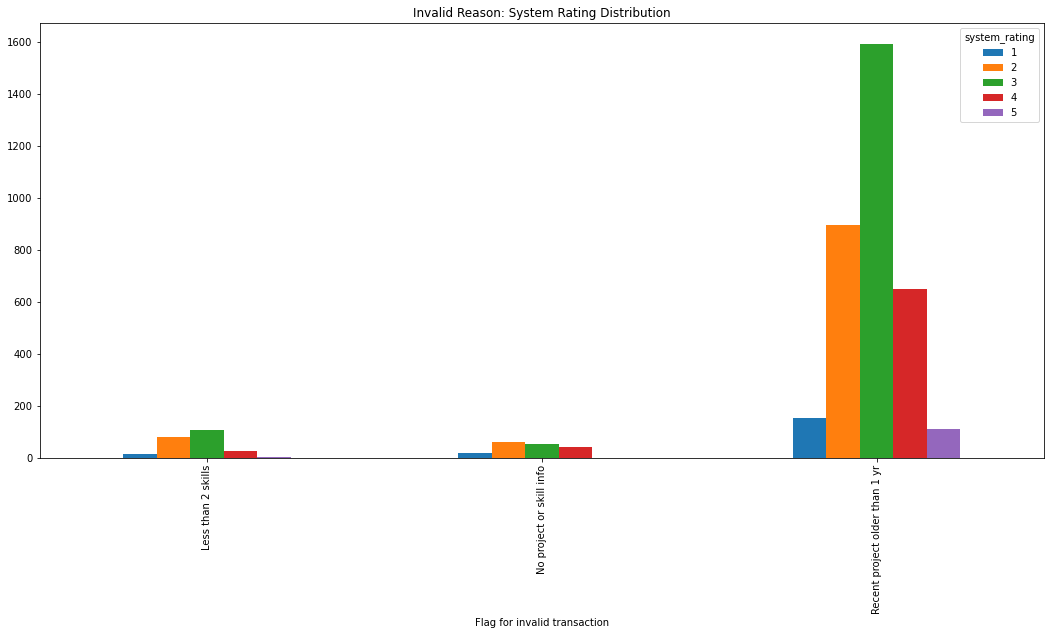

In [881]:
#invalid ,invalid flag vs system rating
x=df_final[df_final["valid_transcation"]==False]

df4 = pd.pivot_table(x, index =["Flag for invalid transaction"],columns="system_rating",aggfunc ="size",fill_value=0)


df4.plot.bar(stacked=False,figsize=(18,8))
plt.title("Invalid Reason: System Rating Distribution")
plt.savefig("americanpic2a.png",bbox_inches = 'tight')

df4.loc["Total"] = df4.sum()
df4['Total'] = df4.sum(axis=1)
df4.reset_index(inplace=True)
df4.name = "Invalid Reason: System Rating Distribution"

worksheet.write_string(bottom_border+3, 2, df4.name,cell_format)
start_row=bottom_border+5
bottom_border=start_row+df4.shape[0]-1
top_right=2+df4.shape[1]-1


df4.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)

worksheet.insert_image(start_row-1,top_right+5, 'americanpic2a.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)
df4

In [882]:
#next table
#Invalid + Similar

x=df_final[df_final["valid_transcation"]==False]
x1=x[x["is_similar"]=="Yes"]

df5 = pd.pivot_table(x1, index =["Flag for invalid transaction"],columns="system_rating",aggfunc ="size",fill_value=0)


df_t=df5.copy()


#plt.savefig("americanpic2a.png")
df5.loc["Total"] = df5.sum()
df5['Total'] = df5.sum(axis=1)
df5.reset_index(inplace=True)
df5.name = "Invalid Reason: System Rating Distribution"
df5_string="Invalid & Similar"

#worksheet.write_string(bottom_border+1+11,0,df5_string,cell_format2)
worksheet.write(bottom_border+1+11, 0,"",cell_format2)
worksheet.write(bottom_border+1+11, 1,"Invalid & Similar",cell_format2)
worksheet.write_string(bottom_border+3+11, 2, df5.name,cell_format)
worksheet.write(bottom_border+1+11,2,"",cell_format2)


start_row=bottom_border+5+11
bottom_border=start_row+df5.shape[0]-1
top_right=2+df5.shape[1]-1

df5.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2,start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
    
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)

df5




system_rating,Flag for invalid transaction,1,2,3,4,5,Total
0,Less than 2 skills,1,8,108,25,1,143
1,No project or skill info,1,2,52,38,0,93
2,Recent project older than 1 yr,11,86,1594,617,101,2409
3,Total,13,96,1754,680,102,2645


In [883]:
df_final["valid_transcation"].value_counts()

True     3864
False    3809
Name: valid_transcation, dtype: int64

In [884]:
df_values=df_final["valid_transcation"].value_counts().to_frame()
df_values

,valid_transcation
True,3864
False,3809


In [885]:
no_of_valid=df_values["valid_transcation"][True]
no_of_invalid=df_values["valid_transcation"][False]
total_transactions=no_of_valid+no_of_invalid

In [886]:
total_transactions

7673

In [887]:
#next table
#Invalid + Similar - As % of Total Invalid
#doubt

df6=df_t.apply(lambda x:(x/no_of_invalid)*100)
df6.loc["Total"] = df6.sum()
df6['Total'] = df6.sum(axis=1)
df6=df6.round(1)
df6 = df6.apply(lambda x : x.astype(str) + '%')

df6.reset_index(inplace=True)
df6.name="Invalid Reason: As % of Total Invalid"

worksheet.write_string(bottom_border+3, 2, df6.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df6.shape[0]-1
top_right=2+df6.shape[1]-1


df6=df6.round(1)
df6.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)

df6

system_rating,Flag for invalid transaction,1,2,3,4,5,Total
0,Less than 2 skills,0.0%,0.2%,2.8%,0.7%,0.0%,3.8%
1,No project or skill info,0.0%,0.1%,1.4%,1.0%,0.0%,2.4%
2,Recent project older than 1 yr,0.3%,2.3%,41.8%,16.2%,2.7%,63.2%
3,Total,0.3%,2.5%,46.0%,17.9%,2.7%,69.4%


In [888]:
#next table
#Invalid + Non-Similar 

x=df_final[df_final["valid_transcation"]==False]
x1=x[x["is_similar"]=="No"]
df7 = pd.pivot_table(x1, index =["Flag for invalid transaction"],columns="system_rating",aggfunc ="size",fill_value=0)


set1={1,2,3,4,5}
set2=set(df7.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df7.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df7=dfx[cols]
df7
df_t1=df7.copy()
df7['Total'] = df7.sum(axis=1)
df7.loc["Total"] = df7.sum()


df7.reset_index(inplace=True)
df7.name="Invalid reason : System Rating Distribution"
df7_string="Invalid + Non-Similar"
#worksheet.write_string(bottom_border+2, 0,df7_string,cell_format2)
worksheet.write(bottom_border+2, 1,"Invalid & Non-Similar",cell_format2)
worksheet.write_string(bottom_border+4, 2, df7.name,cell_format)
worksheet.write(bottom_border+2, 2,"",cell_format2)
worksheet.write(bottom_border+2, 0,"",cell_format2)


start_row=bottom_border+6
bottom_border=start_row+df7.shape[0]-1
top_right=2+df7.shape[1]-1

df7=df7.fillna(0)
df7.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df7.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)
df7


<ipython-input-888-6bf927cc4772>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Total'] = df7.sum(axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Flag for invalid transaction,1,2,3,4,5,Total
0,Less than 2 skills,15.0,72.0,0.0,1.0,0.0,88.0
1,No project or skill info,17.0,60.0,0.0,2.0,0.0,79.0
2,Recent project older than 1 yr,142.0,811.0,0.0,33.0,11.0,997.0
3,Total,174.0,943.0,0.0,36.0,11.0,1164.0


In [889]:
#next table
#Invalid + Non-Similar - As % of Total inValid
#doubt

df8=df_t1.apply(lambda x:(x/no_of_invalid)*100)
df8['Total'] = df8.sum(axis=1)
df8.loc["Total"] = df8.sum()
df8=df8.fillna(0)
df8=df8.round(1)

df8 = df8.apply(lambda x : x.astype(str) + '%')
df8.reset_index(inplace=True)
df8.name="Invalid Reason: As a % of Total Invalid"
worksheet.write_string(bottom_border+3, 2, df8.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df8.shape[0]-1
top_right=2+df8.shape[1]-1



df8.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df8.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
worksheet.set_row(bottom_border,15,cell_format3)
worksheet.write(bottom_border, 2,"Total",new_format2)
df8



,Flag for invalid transaction,1,2,3,4,5,Total
0,Less than 2 skills,0.4%,1.9%,0.0%,0.0%,0.0%,2.3%
1,No project or skill info,0.4%,1.6%,0.0%,0.1%,0.0%,2.1%
2,Recent project older than 1 yr,3.7%,21.3%,0.0%,0.9%,0.3%,26.2%
3,Total,4.6%,24.8%,0.0%,0.9%,0.3%,30.6%


In [890]:
#next table
x=df_final[df_final["valid_transcation"]==True]
dfj = pd.pivot_table(x, index =["Flag for invalid transaction"],columns="system_rating",aggfunc ="size",fill_value=0)
dfj

system_rating,1,2,3,4,5
Flag for invalid transaction,,,,,
blank,194,1047,1832,704,87


In [891]:
dfi=dfj.apply(lambda x:(x/no_of_valid)*100)
dfi.rename(index={"blank":"As % of total valid"},inplace=True)
dfi

system_rating,1,2,3,4,5
Flag for invalid transaction,,,,,
As % of total valid,5.020704,27.096273,47.412008,18.219462,2.251553


In [892]:
#valid transaction analysis

df9=pd.concat([dfj,dfi])
df9['Total'] = df9.sum(axis=1)
df9=df9.round(1)
df9.loc['As % of total valid'] = df9.loc['As % of total valid'].astype(str) + '%'

df9.reset_index(inplace=True)
df9.name="Valid transaction analysis"

worksheet.write_string(bottom_border+2+1, 2, df9.name,cell_format)
start_row=bottom_border+5
bottom_border=start_row+df9.shape[0]-1
top_right=2+df9.shape[1]-1

df9=df9.round(1)
df9.to_excel(writer,sheet_name='Invalid transaction analysis',startrow=start_row, startcol=2,index=False,header=False)
worksheet.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df9.columns.values):
    worksheet.write(start_row-1, 2+col_num, value, header_format)
    


df9


system_rating,Flag for invalid transaction,1,2,3,4,5,Total
0,blank,194,1047,1832,704,87,3864
1,As % of total valid,5.0%,27.1%,47.4%,18.2%,2.3%,100.0%


<ipython-input-893-b9c74f05b654>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["count"]=1


system_rating,Essential Skills,1,2,3,4,5,Total
0,Selenium,3,50,106,62,7,228
1,Java-J2EE,4,29,81,30,6,150
2,Spring Boot,0,12,98,24,11,145
3,Application Testing,2,29,69,36,2,138
4,Core Java,3,14,78,31,2,128
5,.NET,0,8,67,24,3,102
6,Desktop Support,1,11,25,43,4,84
7,React JS,4,15,45,12,0,76
8,Project Management,0,3,10,36,12,61
9,Test Automation,1,22,28,7,0,58


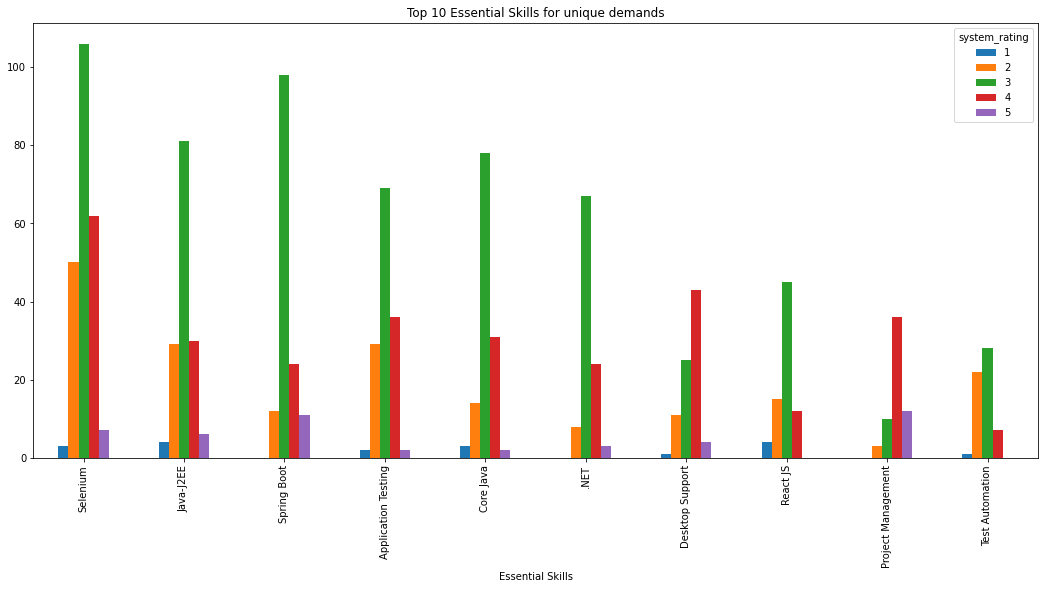

In [893]:
#skill analysis
#top 10 skills based on unique demand
x1 = df_final.drop_duplicates(subset=["demand_guid"])
x1["count"]=1

df0a = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df0a["Total"]=df0a.sum(axis=1)
df0a=df0a.sort_values(by="Total",ascending=False)
df0a=df0a.head(10)
df0a=df0a.drop(['Total'], axis = 1)

df0a.plot.bar(stacked=False,figsize=(18,8))
plt.title('Top 10 Essential Skills for unique demands')
plt.savefig("americanpic5b.png",bbox_inches = 'tight')

df0a["Total"]=df0a.sum(axis=1)




df0a.loc["Total"] = df0a.sum()
df0a.reset_index(inplace=True)

df0a.name='Top 10 Essential Skills for unique demands'

worksheet1.write_string(3, 2, df0a.name,cell_format)

start_row=0+5
bottom_border=start_row+df0a.shape[0]-1
top_right=2+df0a.shape[1]-1   
df0a=df0a.round(1)

df0a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border,2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df0a.columns.values):
    worksheet1.write(4, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic5b.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.write(bottom_border, 2,"Total",new_format2)

df0a


In [894]:
#creating the next table step by step
#top 10 essential skills (Valid)

x=df_final[df_final["valid_transcation"]==True]

dftest = pd.pivot_table(x, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest

valid_transcation,True
Essential Skills,
.NET,177
".NET, ASP.NET",5
".NET, ASP.NET MVC 5",2
".NET, C# - CSharp-Programming",5
".NET, MS SQL",4
...,...
"Windows Server Admin, Linux Admin",1
Xamarin Platform,5
ionic framework,2


In [895]:
dftest=dftest.sort_values(by=True,ascending=False)
dftest

valid_transcation,True
Essential Skills,
Selenium,346
.NET,177
Application Testing,174
Java-J2EE,160
Core Java,137
...,...
"Project Management, Salesforce Development Lifecycle & Deployment Design",1
Devops - Puppet,1
Pure Storage,1


In [896]:
dftest["percent of total valid"]=(dftest[True]/no_of_valid)*100


In [897]:
dftest["percent of total"]=(dftest[True]/total_transactions)*100
dftest

valid_transcation,True,percent of total valid,percent of total
Essential Skills,,,
Selenium,346,8.954451,4.509318
.NET,177,4.580745,2.306790
Application Testing,174,4.503106,2.267692
Java-J2EE,160,4.140787,2.085234
Core Java,137,3.545549,1.785482
...,...,...,...
"Project Management, Salesforce Development Lifecycle & Deployment Design",1,0.025880,0.013033
Devops - Puppet,1,0.025880,0.013033
Pure Storage,1,0.025880,0.013033


In [898]:
x1=x[x["is_similar"]=="Yes"]
dftest1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest1

is_similar,Yes
Essential Skills,
.NET,152
".NET, ASP.NET",4
".NET, ASP.NET MVC 5",2
".NET, C# - CSharp-Programming",4
".NET, MS SQL",1
...,...
"Windows Platform Engineering, C# - CSharp-Programming",1
Windows Server Admin,2
Xamarin Platform,3


In [899]:
mergedDf = dftest.merge(dftest1, left_index=True, right_index=True)
mergedDf

,True,percent of total valid,percent of total,Yes
Essential Skills,,,,
Selenium,346,8.954451,4.509318,262
.NET,177,4.580745,2.306790,152
Application Testing,174,4.503106,2.267692,146
Java-J2EE,160,4.140787,2.085234,130
Core Java,137,3.545549,1.785482,118
...,...,...,...,...
ECO and Airports,1,0.025880,0.013033,1
"E-Mobility, React JS",1,0.025880,0.013033,1
Documentum,1,0.025880,0.013033,1


In [900]:
mergedDf["percentage of total valid"]=(mergedDf["Yes"]/no_of_valid)*100
mergedDf["percentage of total"]=(mergedDf["Yes"]/total_transactions)*100
mergedDf

,True,percent of total valid,percent of total,Yes,percentage of total valid,percentage of total
Essential Skills,,,,,,
Selenium,346,8.954451,4.509318,262,6.780538,3.414571
.NET,177,4.580745,2.306790,152,3.933747,1.980972
Application Testing,174,4.503106,2.267692,146,3.778468,1.902776
Java-J2EE,160,4.140787,2.085234,130,3.364389,1.694253
Core Java,137,3.545549,1.785482,118,3.053830,1.537860
...,...,...,...,...,...,...
ECO and Airports,1,0.025880,0.013033,1,0.025880,0.013033
"E-Mobility, React JS",1,0.025880,0.013033,1,0.025880,0.013033
Documentum,1,0.025880,0.013033,1,0.025880,0.013033


In [901]:
x2=x[x["is_similar"]=="No"]
dftest2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest2

is_similar,No
Essential Skills,
.NET,25
".NET, ASP.NET",1
".NET, C# - CSharp-Programming",1
".NET, MS SQL",3
".NET, SQL Server Application Admin",3
...,...
Windows Server Admin,1
"Windows Server Admin, Linux Admin",1
Xamarin Platform,2


In [902]:
mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True)
mergedDf1

,True,percent of total valid,percent of total,Yes,percentage of total valid,percentage of total,No
Essential Skills,,,,,,,
Selenium,346,8.954451,4.509318,262,6.780538,3.414571,84
.NET,177,4.580745,2.306790,152,3.933747,1.980972,25
Application Testing,174,4.503106,2.267692,146,3.778468,1.902776,28
Java-J2EE,160,4.140787,2.085234,130,3.364389,1.694253,30
Core Java,137,3.545549,1.785482,118,3.053830,1.537860,19
...,...,...,...,...,...,...,...
Internet of Things - IoT,2,0.051760,0.026065,1,0.025880,0.013033,1
Cloud-PaaS-AWS-Amazon Web Services,2,0.051760,0.026065,1,0.025880,0.013033,1
Cloud-PaaS-Azure,2,0.051760,0.026065,1,0.025880,0.013033,1


In [903]:
mergedDf1["Percentage of total valid"]=(mergedDf1["No"]/no_of_valid)*100
mergedDf1["Percentage of total"]=(mergedDf1["No"]/total_transactions)*100
mergedDf1

,True,percent of total valid,percent of total,Yes,percentage of total valid,percentage of total,No,Percentage of total valid,Percentage of total
Essential Skills,,,,,,,,,
Selenium,346,8.954451,4.509318,262,6.780538,3.414571,84,2.173913,1.094748
.NET,177,4.580745,2.306790,152,3.933747,1.980972,25,0.646998,0.325818
Application Testing,174,4.503106,2.267692,146,3.778468,1.902776,28,0.724638,0.364916
Java-J2EE,160,4.140787,2.085234,130,3.364389,1.694253,30,0.776398,0.390981
Core Java,137,3.545549,1.785482,118,3.053830,1.537860,19,0.491718,0.247622
...,...,...,...,...,...,...,...,...,...
Internet of Things - IoT,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033
Cloud-PaaS-AWS-Amazon Web Services,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033
Cloud-PaaS-Azure,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033


In [904]:
mergedDf1["Similar as % of Valid Trans for Skill"]=(mergedDf1["Yes"]/mergedDf1[True])*100
mergedDf1["Non-similar as % of Valid Trans for Skill"]=(mergedDf1["No"]/mergedDf1[True])*100
mergedDf1

,True,percent of total valid,percent of total,Yes,percentage of total valid,percentage of total,No,Percentage of total valid,Percentage of total,Similar as % of Valid Trans for Skill,Non-similar as % of Valid Trans for Skill
Essential Skills,,,,,,,,,,,
Selenium,346,8.954451,4.509318,262,6.780538,3.414571,84,2.173913,1.094748,75.722543,24.277457
.NET,177,4.580745,2.306790,152,3.933747,1.980972,25,0.646998,0.325818,85.875706,14.124294
Application Testing,174,4.503106,2.267692,146,3.778468,1.902776,28,0.724638,0.364916,83.908046,16.091954
Java-J2EE,160,4.140787,2.085234,130,3.364389,1.694253,30,0.776398,0.390981,81.250000,18.750000
Core Java,137,3.545549,1.785482,118,3.053830,1.537860,19,0.491718,0.247622,86.131387,13.868613
...,...,...,...,...,...,...,...,...,...,...,...
Internet of Things - IoT,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033,50.000000,50.000000
Cloud-PaaS-AWS-Amazon Web Services,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033,50.000000,50.000000
Cloud-PaaS-Azure,2,0.051760,0.026065,1,0.025880,0.013033,1,0.025880,0.013033,50.000000,50.000000


In [905]:
#final table
#top 10 essential skills (Valid)

df1a=mergedDf1.head(10)
df1a.rename(columns={'Yes': 'Valid+similar',True:"Valid",'No': 'Valid+Non-similar'},inplace=True)


eslist=df1a.index.values.tolist() 
eslist

df1a.loc["Total"] = df1a.sum()


df1a["Similar as % of Valid Trans for Skill"]["Total"]=(df1a["Valid+similar"]["Total"]/df1a["Valid"]["Total"])*100
df1a["Non-similar as % of Valid Trans for Skill"]["Total"]=(df1a["Valid+Non-similar"]["Total"]/df1a["Valid"]["Total"])*100

df1a=df1a.round(1)
df1a['percentage of total valid'] = df1a['percentage of total valid'].astype(str) + '%'
df1a['percent of total'] = df1a['percent of total'].astype(str) + '%'
df1a['percent of total valid'] = df1a['percent of total valid'].astype(str) + '%'
df1a['percentage of total'] = df1a['percentage of total'].astype(str) + '%'
df1a['Percentage of total'] = df1a['Percentage of total'].astype(str) + '%'
df1a['Percentage of total valid'] = df1a['Percentage of total valid'].astype(str) + '%'
df1a['Similar as % of Valid Trans for Skill'] = df1a['Similar as % of Valid Trans for Skill'].astype(str) + '%'
df1a['Non-similar as % of Valid Trans for Skill'] = df1a['Non-similar as % of Valid Trans for Skill'].astype(str) + '%'

df1a.reset_index(inplace=True)
df1a.name='Top 10 Essential Skills'

worksheet1.write(bottom_border+2+5, 1,"Valid",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df1a.name,cell_format)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)

start_row=bottom_border+6+5
bottom_border=start_row+df1a.shape[0]-1
top_right=2+df1a.shape[1]-1


df1a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)

worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.write(bottom_border, 2,"Total",new_format2)


df1a

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_o

,Essential Skills,Valid,percent of total valid,percent of total,Valid+similar,percentage of total valid,percentage of total,Valid+Non-similar,Percentage of total valid,Percentage of total,Similar as % of Valid Trans for Skill,Non-similar as % of Valid Trans for Skill
0,Selenium,346.0,9.0%,4.5%,262.0,6.8%,3.4%,84.0,2.2%,1.1%,75.7%,24.3%
1,.NET,177.0,4.6%,2.3%,152.0,3.9%,2.0%,25.0,0.6%,0.3%,85.9%,14.1%
2,Application Testing,174.0,4.5%,2.3%,146.0,3.8%,1.9%,28.0,0.7%,0.4%,83.9%,16.1%
3,Java-J2EE,160.0,4.1%,2.1%,130.0,3.4%,1.7%,30.0,0.8%,0.4%,81.2%,18.8%
4,Core Java,137.0,3.5%,1.8%,118.0,3.1%,1.5%,19.0,0.5%,0.2%,86.1%,13.9%
5,Spring Boot,117.0,3.0%,1.5%,105.0,2.7%,1.4%,12.0,0.3%,0.2%,89.7%,10.3%
6,React JS,109.0,2.8%,1.4%,94.0,2.4%,1.2%,15.0,0.4%,0.2%,86.2%,13.8%
7,ETRM - Energy Trading and Risk Management,74.0,1.9%,1.0%,23.0,0.6%,0.3%,51.0,1.3%,0.7%,31.1%,68.9%
8,Desktop Support,68.0,1.8%,0.9%,60.0,1.6%,0.8%,8.0,0.2%,0.1%,88.2%,11.8%
9,ASP.NET MVC 5,65.0,1.7%,0.8%,53.0,1.4%,0.7%,12.0,0.3%,0.2%,81.5%,18.5%


system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,13,68,151,104,10,346
1,.NET,0,18,103,53,3,177
2,Application Testing,2,25,108,32,7,174
3,Java-J2EE,4,26,85,39,6,160
4,Core Java,4,18,81,30,4,137
5,Spring Boot,1,13,70,22,11,117
6,React JS,1,14,77,17,0,109
7,ETRM - Energy Trading and Risk Management,31,38,5,0,0,74
8,Desktop Support,1,7,17,39,4,68
9,ASP.NET MVC 5,2,12,35,14,2,65


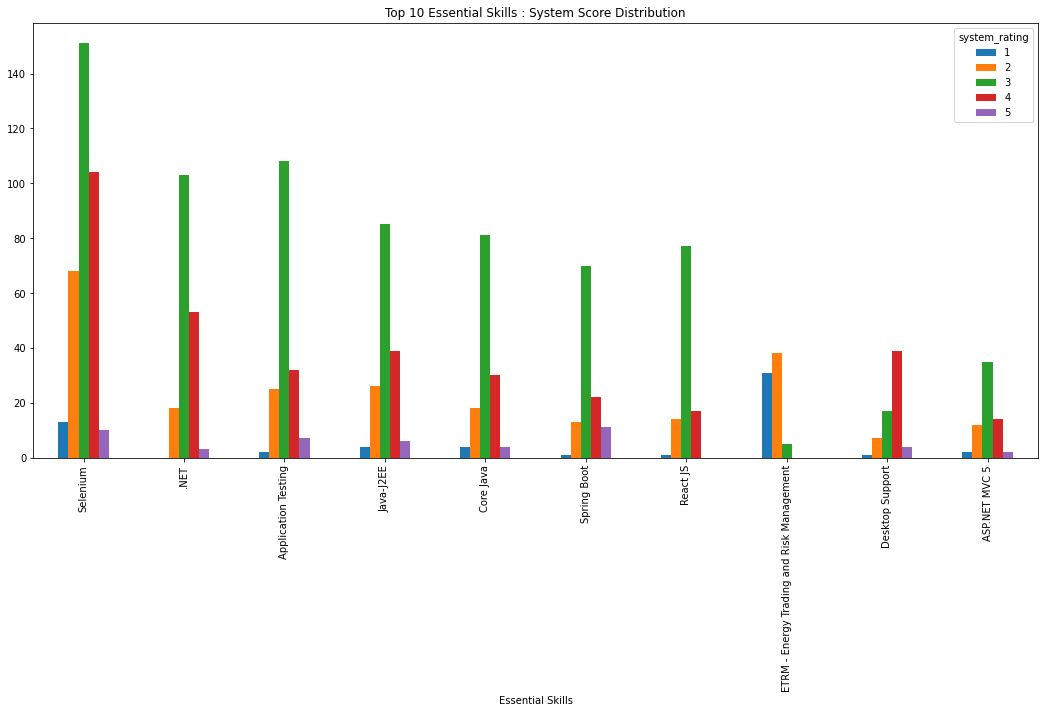

In [906]:
#Top 10 Essential Skills : System Score Distribution
 

x=df_final[df_final["valid_transcation"]==True]


df3aa = pd.pivot_table(x, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df3aa=df3aa.reindex(eslist)
df3aa

df3aa.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic1bb.png",bbox_inches = 'tight')

df3aa["total"]=df3aa.sum(axis=1)

df3aa.loc["Total"] = df3aa.sum()

df3aa.loc["% of Total Valid for top 10 skills"]=(df3aa.loc["Total"]/df1a["Valid"][10])*100
df3aa=df3aa.round(1)
df3aa.loc['% of Total Valid for top 10 skills'] = df3aa.loc['% of Total Valid for top 10 skills'].astype(str) + '%'
df3aa.reset_index(inplace=True)
df3aa_string="Valid"


df3aa.name='Top 10 Essential Skills : System Score Distribution'

#worksheet1.write_string(bottom_border+1, 0, df3aa_string,cell_format)

worksheet1.write_string(bottom_border+4, 2, df3aa.name,cell_format)



start_row=bottom_border+6
bottom_border=start_row+df3aa.shape[0]-1
top_right=2+df3aa.shape[1]-1   

df3aa.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3aa.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)

worksheet1.insert_image(start_row-1,top_right+5, 'americanpic1bb.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)
worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)


df3aa

system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,2,6,151,95,8,262
1,.NET,0,2,103,44,3,152
2,Application Testing,0,3,108,28,7,146
3,Java-J2EE,0,4,85,35,6,130
4,Core Java,1,3,81,29,4,118
5,Spring Boot,0,2,70,22,11,105
6,React JS,0,1,77,16,0,94
7,ETRM - Energy Trading and Risk Management,4,14,5,0,0,23
8,Desktop Support,0,0,17,39,4,60
9,ASP.NET MVC 5,0,2,35,14,2,53


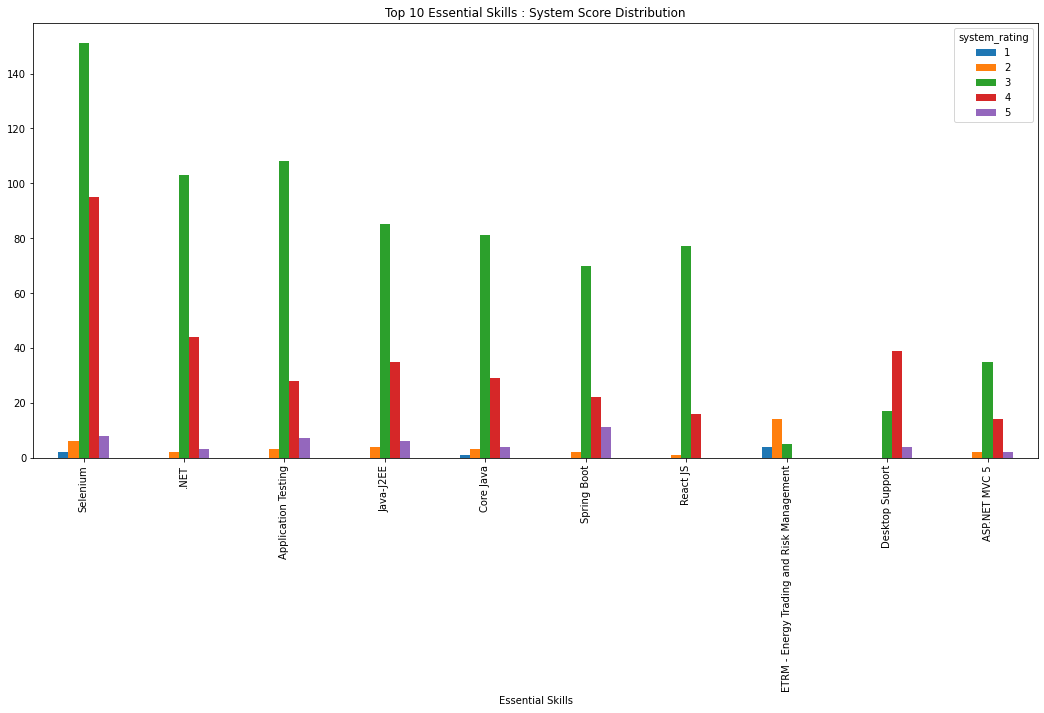

In [907]:
#Top 10 Essential Skills : System Score Distribution(valid & similar)
x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="Yes"]

df3a = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df3a=df3a.reindex(eslist)
df3a.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic1b.png",bbox_inches = 'tight')

df3a["total"]=df3a.sum(axis=1)

df3a.loc["Total"] = df3a.sum()

df3a.loc["% of Total Valid for top 10 skills"]=(df3a.loc["Total"]/df1a["Valid"][10])*100
df3a=df3a.round(1)
df3a.loc['% of Total Valid for top 10 skills'] = df3a.loc['% of Total Valid for top 10 skills'].astype(str) + '%'

df3a.reset_index(inplace=True)
df3a_string="Valid & similar"
df3a.name='Top 10 Essential Skills : System Score Distribution'

#worksheet1.write_string(bottom_border+1+2, 0, df3a_string,cell_format)
worksheet1.write(bottom_border+2+5, 1,"Valid & Similar",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df3a.name,cell_format)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)

start_row=bottom_border+6+5
bottom_border=start_row+df3a.shape[0]-1
top_right=2+df3a.shape[1]-1   

df3a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)

worksheet1.insert_image(start_row-1,top_right+5, 'americanpic1b.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df3a

<ipython-input-908-5e01595ea9ad>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4a["total"]=df4a.sum(axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Essential Skills,1,2,3,4,5,total
0,Selenium,11,62,0,9,2,84
1,.NET,0,16,0,9,0,25
2,Application Testing,2,22,0,4,0,28
3,Java-J2EE,4,22,0,4,0,30
4,Core Java,3,15,0,1,0,19
5,Spring Boot,1,11,0,0,0,12
6,React JS,1,13,0,1,0,15
7,ETRM - Energy Trading and Risk Management,27,24,0,0,0,51
8,Desktop Support,1,7,0,0,0,8
9,ASP.NET MVC 5,2,10,0,0,0,12


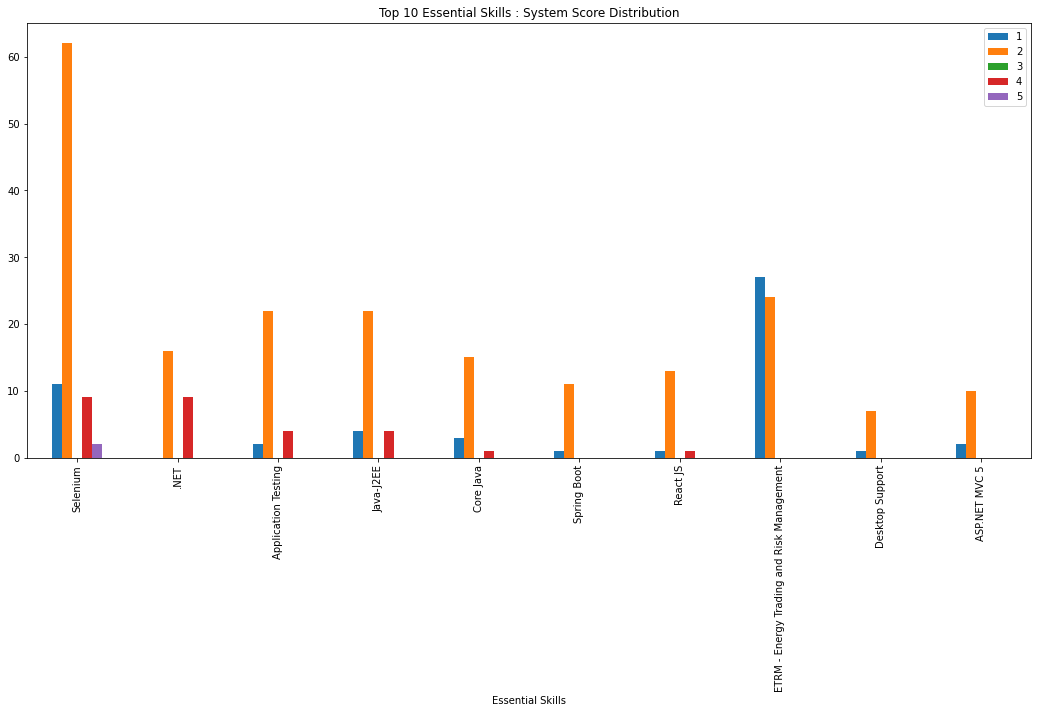

In [908]:
#Top 10 Essential Skills : System Score Distribution(valid & similar)

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="No"]

df4a = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df4a=df4a.reindex(eslist)

set1={1,2,3,4,5}
set2=set(df4a.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df4a.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df4a=dfx[cols]

df4a.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic2b.png",bbox_inches = 'tight')


df4a["total"]=df4a.sum(axis=1)
df4a.loc["Total"] = df4a.sum()
df4a.loc["% of Total Valid for top 10 skills"]=(df4a.loc["Total"]/df1a["Valid"][10])*100
df4a=df4a.round(1)
df4a=df4a.fillna(0)

df4a.loc['% of Total Valid for top 10 skills'] = df4a.loc['% of Total Valid for top 10 skills'].astype(str) + '%'
df4a.reset_index(inplace=True)

df4a.name='Top 10 Essential Skills : System Score Distribution' 
df4a_string="Valid & non-similar"




worksheet1.write(bottom_border+2+5, 1,"Valid & Non-Similar",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df4a.name,cell_format)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)


start_row=bottom_border+6+5
bottom_border=start_row+df4a.shape[0]-1
top_right=2+df4a.shape[1]-1   

df4a=df4a.round(1)
df4a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic2b.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df4a

In [909]:
#invalid ,Top 10 Essential Skills

x=df_final[df_final["valid_transcation"]==False]

dftest = pd.pivot_table(x, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest

dftest=dftest.sort_values(by=False,ascending=False)
dftest

dftest["percent of total invalid"]=(dftest[False]/no_of_invalid)*100

dftest["percent of total"]=(dftest[False]/total_transactions)*100
dftest

x1=x[x["is_similar"]=="Yes"]
dftest1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest1

mergedDf = dftest.merge(dftest1, left_index=True, right_index=True)
mergedDf

mergedDf["percentage of total invalid"]=(mergedDf["Yes"]/no_of_invalid)*100
mergedDf["percentage of total"]=(mergedDf["Yes"]/total_transactions)*100
mergedDf

x2=x[x["is_similar"]=="No"]
dftest2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest2

mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True)
mergedDf1

mergedDf1["Percentage of total invalid"]=(mergedDf1["No"]/no_of_invalid)*100
mergedDf1["Percentage of total"]=(mergedDf1["No"]/total_transactions)*100
mergedDf1

mergedDf1["Similar as % of Invalid Trans for Skill"]=(mergedDf1["Yes"]/mergedDf1[False])*100
mergedDf1["Non-similar as % of Invalid Trans for Skill"]=(mergedDf1["No"]/mergedDf1[False])*100
mergedDf1

df2a=mergedDf1.head(10)
df2a.rename(columns={'Yes': 'Invalid+similar',False:"Invalid",'No': 'Invalid+Non-similar'},inplace=True)

eslist1=df2a.index.values.tolist() 


df2a.loc["Total"] = df2a.sum()

df2a["Similar as % of Invalid Trans for Skill"]["Total"]=(df2a["Invalid+similar"]["Total"]/df2a["Invalid"]["Total"])*100
df2a["Non-similar as % of Invalid Trans for Skill"]["Total"]=(df2a["Invalid+Non-similar"]["Total"]/df2a["Invalid"]["Total"])*100

df2a=df2a.round(1)
df2a['percentage of total invalid'] = df2a['percentage of total invalid'].astype(str) + '%'
df2a['percent of total'] = df2a['percent of total'].astype(str) + '%'
df2a['percent of total invalid'] = df2a['percent of total invalid'].astype(str) + '%'
df2a['percentage of total'] = df2a['percentage of total'].astype(str) + '%'
df2a['Percentage of total'] = df2a['Percentage of total'].astype(str) + '%'
df2a['Percentage of total invalid'] = df2a['Percentage of total invalid'].astype(str) + '%'
df2a['Similar as % of Invalid Trans for Skill'] = df2a['Similar as % of Invalid Trans for Skill'].astype(str) + '%'
df2a['Non-similar as % of Invalid Trans for Skill'] = df2a['Non-similar as % of Invalid Trans for Skill'].astype(str) + '%'

df2a.reset_index(inplace=True)
df2a.name='Top 10 Essential Skills'



worksheet1.write(bottom_border+2+5, 1,"Invalid",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df2a.name,cell_format)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)

start_row=bottom_border+6+5
bottom_border=start_row+df2a.shape[0]-1
top_right=2+df2a.shape[1]-1   

df2a=df2a.round(1)
df2a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)

worksheet1.set_row(bottom_border,15,cell_format3)

worksheet1.write(bottom_border, 2,"Total",new_format2)


df2a

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_o

,Essential Skills,Invalid,percent of total invalid,percent of total,Invalid+similar,percentage of total invalid,percentage of total,Invalid+Non-similar,Percentage of total invalid,Percentage of total,Similar as % of Invalid Trans for Skill,Non-similar as % of Invalid Trans for Skill
0,Selenium,286.0,7.5%,3.7%,215.0,5.6%,2.8%,71.0,1.9%,0.9%,75.2%,24.8%
1,Application Testing,213.0,5.6%,2.8%,157.0,4.1%,2.0%,56.0,1.5%,0.7%,73.7%,26.3%
2,.NET,181.0,4.8%,2.4%,156.0,4.1%,2.0%,25.0,0.7%,0.3%,86.2%,13.8%
3,Java-J2EE,176.0,4.6%,2.3%,140.0,3.7%,1.8%,36.0,0.9%,0.5%,79.5%,20.5%
4,Core Java,155.0,4.1%,2.0%,139.0,3.6%,1.8%,16.0,0.4%,0.2%,89.7%,10.3%
5,Spring Boot,140.0,3.7%,1.8%,128.0,3.4%,1.7%,12.0,0.3%,0.2%,91.4%,8.6%
6,Test Automation,79.0,2.1%,1.0%,42.0,1.1%,0.5%,37.0,1.0%,0.5%,53.2%,46.8%
7,Project Management,78.0,2.0%,1.0%,75.0,2.0%,1.0%,3.0,0.1%,0.0%,96.2%,3.8%
8,ETRM - Energy Trading and Risk Management,67.0,1.8%,0.9%,9.0,0.2%,0.1%,58.0,1.5%,0.8%,13.4%,86.6%
9,Project Management ADM,64.0,1.7%,0.8%,60.0,1.6%,0.8%,4.0,0.1%,0.1%,93.8%,6.2%


system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,9,59,152,53,13,286
1,Application Testing,3,53,98,53,6,213
2,.NET,0,25,114,41,1,181
3,Java-J2EE,4,33,87,43,9,176
4,Core Java,2,11,84,52,6,155
5,Spring Boot,0,12,107,18,3,140
6,Test Automation,3,33,31,11,1,79
7,Project Management,0,3,9,51,15,78
8,ETRM - Energy Trading and Risk Management,37,27,3,0,0,67
9,Project Management ADM,0,0,10,46,8,64


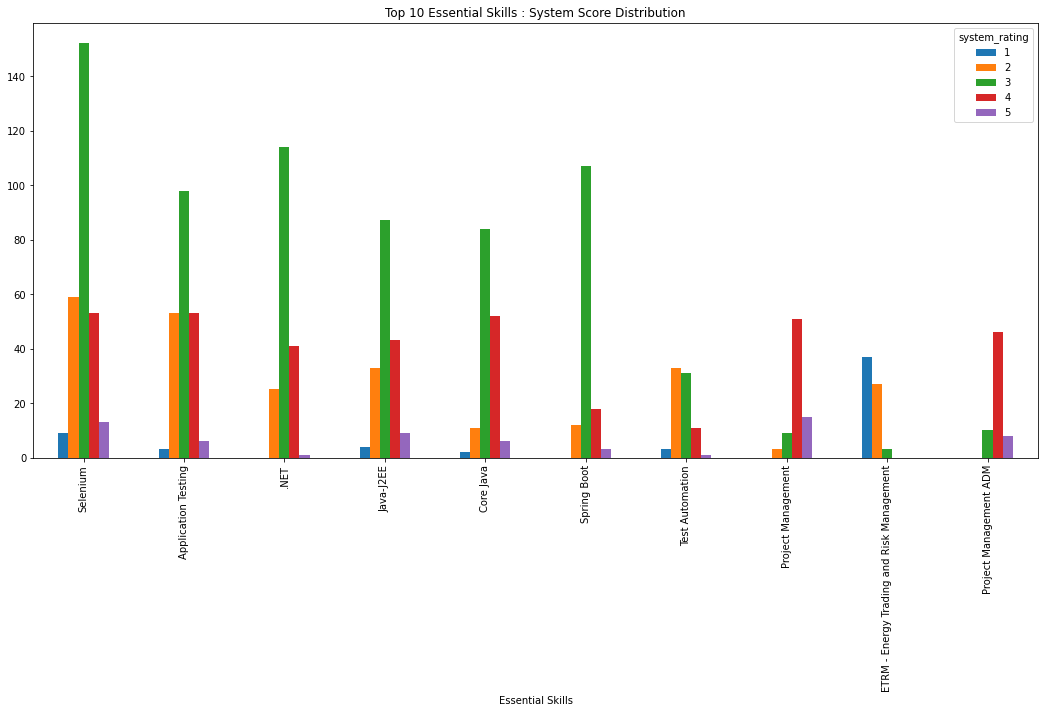

In [910]:
# invalid, Top 10 Essential skills : System Score Distribution

x=df_final[df_final["valid_transcation"]==False]


df5aa = pd.pivot_table(x, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df5aa=df5aa.reindex(eslist1)
df5aa.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic3bb.png",bbox_inches = 'tight')

df5aa["total"]=df5aa.sum(axis=1)

df5aa.loc["Total"] = df5aa.sum()
df5aa.loc["% of Total Invalid for top 10 skills"]=(df5aa.loc["Total"]/df2a["Invalid"][10])*100
df5aa=df5aa.round(1)
df5aa.loc['% of Total Invalid for top 10 skills'] = df5aa.loc['% of Total Invalid for top 10 skills'].astype(str) + '%'
df5aa.reset_index(inplace=True)

df5aa.name='Top 10 Essential skills : System Score Distribution'
#worksheet1.write_string(bottom_border+1+2, 0, df5aa_string,cell_format)

worksheet1.write_string(bottom_border+3, 2, df5aa.name,cell_format)



start_row=bottom_border+5
bottom_border=start_row+df5aa.shape[0]-1
top_right=2+df5aa.shape[1]-1   

df5aa=df5aa.round(1)
df5aa.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5aa.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic3bb.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Invalid for top 10 skills",new_format2)

df5aa

system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,0,4,152,48,11,215
1,Application Testing,1,6,98,48,4,157
2,.NET,0,5,114,37,0,156
3,Java-J2EE,1,3,87,40,9,140
4,Core Java,0,1,84,49,5,139
5,Spring Boot,0,1,107,18,2,128
6,Test Automation,0,0,31,10,1,42
7,Project Management,0,0,9,51,15,75
8,ETRM - Energy Trading and Risk Management,2,4,3,0,0,9
9,Project Management ADM,0,0,10,43,7,60


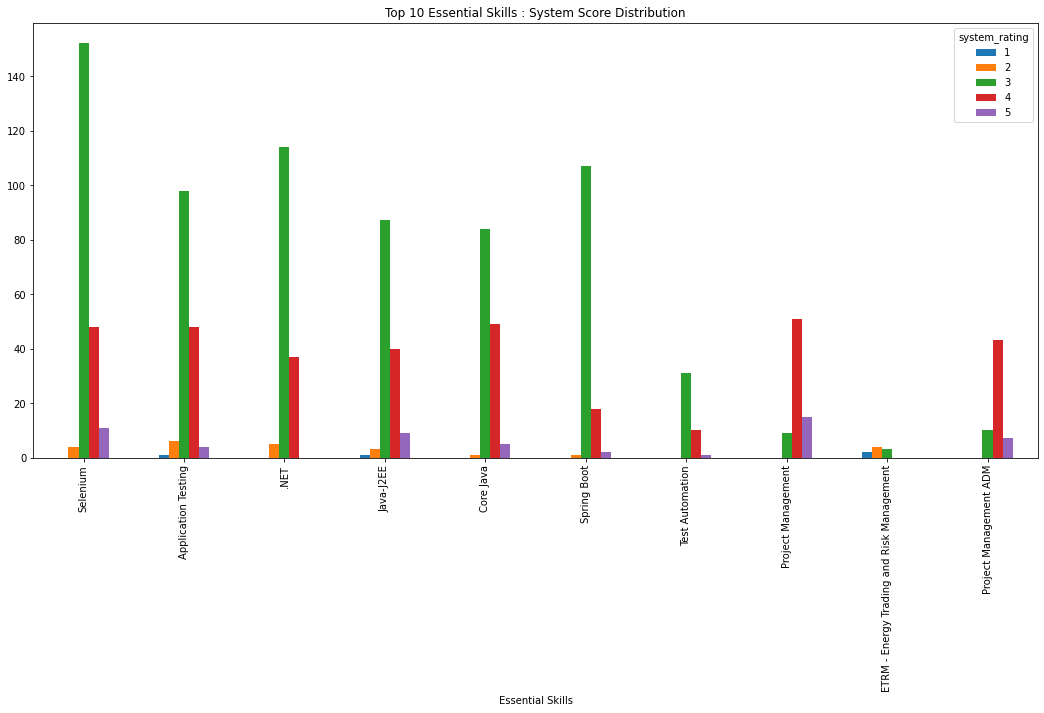

In [911]:
#next table
#invalid+similar, Top 10 Essential skills : System Score Distribution

x=df_final[df_final["valid_transcation"]==False]
x1=x[x["is_similar"]=="Yes"]

df5a = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df5a=df5a.reindex(eslist1)
df5a.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic3b.png",bbox_inches = 'tight')

df5a["total"]=df5a.sum(axis=1)

df5a.loc["Total"] = df5a.sum()
df5a.loc["% of Total Invalid for top 10 skills"]=(df5a.loc["Total"]/df2a["Invalid"][10])*100

df5a=df5a.round(1)
df5a.loc['% of Total Invalid for top 10 skills'] = df5a.loc['% of Total Invalid for top 10 skills'].astype(str) + '%'

df5a.reset_index(inplace=True)
df5a_string="Invalid & similar"
df5a.name='Top 10 Essential Skills : System Score Distribution'
#worksheet1.write_string(bottom_border+1+2, 0, df5a_string,cell_format)
worksheet1.write(bottom_border+2+5, 1,"Invalid & Similar",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df5a.name,cell_format)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)

start_row=bottom_border+6+5
bottom_border=start_row+df5a.shape[0]-1
top_right=2+df5a.shape[1]-1   

df5a=df5a.round(2)
df5a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic3b.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Invalid for top 10 skills",new_format2)
df5a

,Essential Skills,1,2,3,4,5,total
0,Selenium,9,55,0,5,2,71
1,Application Testing,2,47,0,5,2,56
2,.NET,0,20,0,4,1,25
3,Java-J2EE,3,30,0,3,0,36
4,Core Java,2,10,0,3,1,16
5,Spring Boot,0,11,0,0,1,12
6,Test Automation,3,33,0,1,0,37
7,Project Management,0,3,0,0,0,3
8,ETRM - Energy Trading and Risk Management,35,23,0,0,0,58
9,Project Management ADM,0,0,0,3,1,4


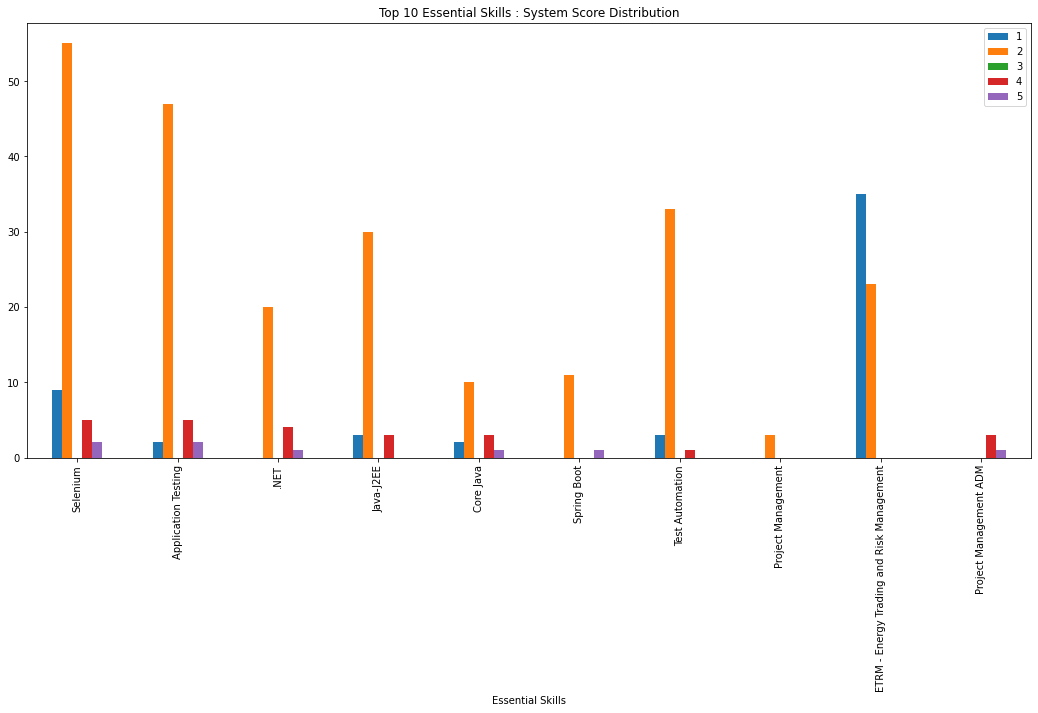

In [912]:
# invalid+non similar, Top 10 Essential skills : System Score Distribution

x=df_final[df_final["valid_transcation"]==False]
x1=x[x["is_similar"]=="No"]

df6a = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df6a=df6a.reindex(eslist1)
set1={1,2,3,4,5}
set2=set(df6a.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df6a.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df6a=dfx[cols]
df6a=df6a.fillna(0)

df6a.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic4b.png",bbox_inches = 'tight')

df6a["total"]=df6a.sum(axis=1)

df6a.loc["Total"] = df6a.sum()
df6a.loc["% of Total Invalid for top 10 skills"]=(df6a.loc["Total"]/df2a["Invalid"][10])*100

df6a=df6a.round(1)
df6a.loc['% of Total Invalid for top 10 skills'] = df6a.loc['% of Total Invalid for top 10 skills'].astype(str) + '%'

df6a.reset_index(inplace=True)
df6a_string="Invalid & Non-similar"
df6a.name='Top 10 Essential Skills : System Score Distribution'
#worksheet1.write_string(bottom_border+1+2, 0, df6a_string,cell_format)
worksheet1.write(bottom_border+2+5, 1,"Invalid & Non-Similar",cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df6a.name,cell_format)
worksheet1.write(bottom_border+2+5, 2,"",cell_format2)
worksheet1.write(bottom_border+2+5, 0,"",cell_format2)


start_row=bottom_border+6+5
bottom_border=start_row+df5a.shape[0]-1
top_right=2+df6a.shape[1]-1   
df6a=df6a.round(1)

df6a.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6a.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic4b.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Invalid for top 10 skills",new_format2)


df6a

In [913]:
#skill analysis by geography


In [914]:
df_final["COUNTRY"].value_counts()

INDIA                         6900
USA                            516
UNITED KINGDOM                  48
AUSTRALIA                       35
CANADA                          26
Mexico                          23
POLAND                          20
Brazil                          15
SINGAPORE                       14
SWEDEN                          12
ROMANIA                          9
GERMANY                          9
SWITZERLAND                      7
PHILIPPINES                      6
UNITED ARAB EMIRATES (UAE)       4
MALAYSIA                         3
JAPAN                            3
NETHERLANDS                      3
TURKEY                           3
HONG KONG                        2
Argentina                        2
CHINA                            2
THAILAND                         2
PORTUGAL                         1
IRELAND                          1
NEW ZEALAND                      1
INDONESIA                        1
LUXEMBOURG                       1
NORWAY              

In [915]:
liste=["AUSTRIA","BELGIUM","FRANCE","GERMANY","HUNGARY","IRELAND","ITALY","LITHUANIA","NETHERLANDS","POLAND","PORTUGAL","ROMANIA","SPAIN","SWEDEN","SWITZERLAND","TURKEY","UNITED KINGDOM"]

In [916]:
list1=["INDIA","USA","EUROPE"]

In [917]:
df_final["COUNTRY"]=df_final["COUNTRY"].replace(liste,"EUROPE")


In [918]:
#skill analysis by geo

x=df_final[df_final["COUNTRY"].isin(list1)]
x["count"]=1

dftest = pd.pivot_table(x, index =["COUNTRY"],columns=["count"],aggfunc ="size",fill_value=0)

x1=x[x["valid_transcation"]==True]
dftest1 = pd.pivot_table(x1, index =["COUNTRY"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)


mergedDf = dftest.merge(dftest1, left_index=True, right_index=True)


mergedDf["Valid as % of total for Geo"]=(mergedDf["True_y"]/mergedDf["1_x"])*100
mergedDf

x2=x[x["valid_transcation"]==False]
dftest2 = pd.pivot_table(x2, index =["COUNTRY"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest2 

mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True)
mergedDf1

mergedDf1["invalid as % of total for Geo"]=(mergedDf1[False]/mergedDf1["1_x"])*100
mergedDf1

x3=x1[x1["is_similar"]=="Yes"]
dftest3 = pd.pivot_table(x3, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest3

mergedDf2 = mergedDf1.merge(dftest3, left_index=True, right_index=True)
mergedDf2

mergedDf2["Valid+Similar as % of Total Valid for Geo"]=(mergedDf2["Yes"]/mergedDf2["True_y"])*100


x4=x1[x1["is_similar"]=="No"]
dftest4 = pd.pivot_table(x4, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)


mergedDf3 = mergedDf2.merge(dftest4, left_index=True, right_index=True)

mergedDf3["Valid+Non-similar as % of Total Valid for Geo"]=(mergedDf3["No"]/mergedDf2["True_y"])*100

mergedDf3["Valid as % of Total"]=(mergedDf3["True_y"]/total_transactions)*100


mergedDf3=mergedDf3.sort_values(by="1_x",ascending=False)

mergedDf3.rename(columns={'Yes': 'Valid+similar',"True_y":"Valid",False:"Invalid",'No': 'Valid+Non-similar',"1_x":"frequency"}, inplace=True)
mergedDf3.loc["Total"] = mergedDf3.sum()

df1b=mergedDf3.copy()
df1b_string="Skill Analysis By Geography"

df1b["Valid as % of total for Geo"]["Total"]=(df1b["Valid"]["Total"]/df1b["frequency"]["Total"])*100
df1b["invalid as % of total for Geo"]["Total"]=(df1b["Invalid"]["Total"]/df1b["frequency"]["Total"])*100
df1b["Valid+Similar as % of Total Valid for Geo"]["Total"]=(df1b["Valid+similar"]["Total"]/df1b["Valid"]["Total"])*100
df1b["Valid+Non-similar as % of Total Valid for Geo"]["Total"]=(df1b["Valid+Non-similar"]["Total"]/df1b["Valid"]["Total"])*100


df1b=df1b.round(1)
df1b['Valid as % of total for Geo'] = df1b['Valid as % of total for Geo'].astype(str) + '%'
df1b['invalid as % of total for Geo'] = df1b['invalid as % of total for Geo'].astype(str) + '%'
df1b['Valid+Similar as % of Total Valid for Geo'] = df1b['Valid+Similar as % of Total Valid for Geo'].astype(str) + '%'
df1b['Valid+Non-similar as % of Total Valid for Geo'] = df1b['Valid+Non-similar as % of Total Valid for Geo'].astype(str) + '%'
df1b['Valid as % of Total'] = df1b['Valid as % of Total'].astype(str) + '%'

df1b.reset_index(inplace=True)
df1b.name='Transaction Analysis by Geography'

worksheet1.write(bottom_border+2+5, 2,"SKILL ANALYSIS BY GEOGRAPHY" ,cell_format1)
worksheet1.set_row(bottom_border+2+5,20,title_format)

worksheet1.write_string(bottom_border+4+5, 2, df1b.name,cell_format)



start_row=bottom_border+6+5
bottom_border=start_row+df1b.shape[0]-1
top_right=2+df1b.shape[1]-1   

df1b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)

worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)

worksheet1.set_row(1,20,title_format)

worksheet1.write(1, 2,"SKILL ANALYSIS",cell_format1)
worksheet1.set_row(bottom_border,15,cell_format3)

worksheet1.write(bottom_border, 2,"Total",new_format2)

df1b

<ipython-input-918-019813ffb478>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1


,COUNTRY,frequency,Valid,Valid as % of total for Geo,Invalid,invalid as % of total for Geo,Valid+similar,Valid+Similar as % of Total Valid for Geo,Valid+Non-similar,Valid+Non-similar as % of Total Valid for Geo,Valid as % of Total
0,INDIA,6900.0,3500.0,50.7%,3400.0,49.3%,2438.0,69.7%,1062.0,30.3%,45.6%
1,USA,516.0,227.0,44.0%,289.0,56.0%,165.0,72.7%,62.0,27.3%,3.0%
2,EUROPE,116.0,60.0,51.7%,56.0,48.3%,50.0,83.3%,10.0,16.7%,0.8%
3,Total,7532.0,3787.0,50.3%,3745.0,49.7%,2653.0,70.1%,1134.0,29.9%,49.4%


In [919]:
#INDIA ,top 10 essential skills

x=df_final[df_final["COUNTRY"]=="INDIA"]
x["count"]=1

dftest = pd.pivot_table(x, index =["Essential Skills"],columns=["count"],aggfunc ="size",fill_value=0)
dftest

x1=x[x["valid_transcation"]==True]
dftest1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)


mergedDf = dftest.merge(dftest1, left_index=True, right_index=True)

mergedDf["Valid as % of total for Geo"]=(mergedDf["True_y"]/mergedDf["1_x"])*100
mergedDf

x2=x[x["valid_transcation"]==False]
dftest2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest2 

mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True)
mergedDf1

mergedDf1["Invalid as % of total for Geo"]=(mergedDf1[False]/mergedDf1["1_x"])*100
mergedDf1

x3=x1[x1["is_similar"]=="Yes"]
dftest3 = pd.pivot_table(x3, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest3

mergedDf2 = mergedDf1.merge(dftest3, left_index=True, right_index=True)
mergedDf2

mergedDf2["Valid+Similar as % of Total Valid for Geo"]=(mergedDf2["Yes"]/mergedDf2["True_y"])*100


x4=x1[x1["is_similar"]=="No"]
dftest4 = pd.pivot_table(x4, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)


mergedDf3 = mergedDf2.merge(dftest4, left_index=True, right_index=True)

mergedDf3["Valid+Non-similar as % of Total Valid for Geo"]=(mergedDf3["No"]/mergedDf2["True_y"])*100

mergedDf3=mergedDf3.sort_values(by="1_x",ascending=False)

mergedDf3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"Invalid",'No': 'Valid+Non-similar',"1_x":"transactions"}, inplace=True)

df2b=mergedDf3.head(10)

eslist0=df2b.index.values.tolist() 

df2b.loc["Total"] = df2b.sum()
df2b["Valid as % of total for Geo"]["Total"]=(df2b["Valid"]["Total"]/df2b["transactions"]["Total"])*100
df2b["Invalid as % of total for Geo"]["Total"]=(df2b["Invalid"]["Total"]/df2b["transactions"]["Total"])*100
df2b["Valid+Similar as % of Total Valid for Geo"]["Total"]=(df2b["valid+similar"]["Total"]/df2b["Valid"]["Total"])*100
df2b["Valid+Non-similar as % of Total Valid for Geo"]["Total"]=(df2b["Valid+Non-similar"]["Total"]/df2b["Valid"]["Total"])*100

df2b=df2b.round(1)
df2b['Valid as % of total for Geo'] = df2b['Valid as % of total for Geo'].astype(str) + '%'
df2b['Invalid as % of total for Geo'] = df2b['Invalid as % of total for Geo'].astype(str) + '%'
df2b['Valid+Similar as % of Total Valid for Geo'] = df2b['Valid+Similar as % of Total Valid for Geo'].astype(str) + '%'
df2b['Valid+Non-similar as % of Total Valid for Geo'] = df2b['Valid+Non-similar as % of Total Valid for Geo'].astype(str) + '%'

df2b.reset_index(inplace=True)

df2b_string="India"
df2b.name='TOP 10 Skill Analysis for GEO'

worksheet1.write_string(bottom_border+2, 2,"INDIA",cell_format1)
worksheet1.write_string(bottom_border+4, 2, df2b.name,cell_format)

worksheet1.set_row(bottom_border+2,20,title_format)

start_row=bottom_border+6
bottom_border=start_row+df2b.shape[0]-1
top_right=2+df2b.shape[1]-1   

df2b=df2b.round(1)
df2b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.write(bottom_border, 2,"Total",new_format2)

df2b








<ipython-input-919-5f6ce9b65fc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Essential Skills,transactions,Valid,Valid as % of total for Geo,Invalid,Invalid as % of total for Geo,valid+similar,Valid+Similar as % of Total Valid for Geo,Valid+Non-similar,Valid+Non-similar as % of Total Valid for Geo
0,Selenium,613.0,341.0,55.6%,272.0,44.4%,257.0,75.4%,84.0,24.6%
1,Application Testing,349.0,152.0,43.6%,197.0,56.4%,125.0,82.2%,27.0,17.8%
2,.NET,339.0,168.0,49.6%,171.0,50.4%,145.0,86.3%,23.0,13.7%
3,Java-J2EE,329.0,158.0,48.0%,171.0,52.0%,128.0,81.0%,30.0,19.0%
4,Core Java,280.0,131.0,46.8%,149.0,53.2%,112.0,85.5%,19.0,14.5%
5,Spring Boot,240.0,113.0,47.1%,127.0,52.9%,101.0,89.4%,12.0,10.6%
6,React JS,168.0,107.0,63.7%,61.0,36.3%,92.0,86.0%,15.0,14.0%
7,Test Automation,129.0,51.0,39.5%,78.0,60.5%,39.0,76.5%,12.0,23.5%
8,ETRM - Energy Trading and Risk Management,126.0,62.0,49.2%,64.0,50.8%,21.0,33.9%,41.0,66.1%
9,ASP.NET MVC 5,108.0,65.0,60.2%,43.0,39.8%,53.0,81.5%,12.0,18.5%


system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,13,68,148,102,10,341
1,Application Testing,2,24,89,30,7,152
2,.NET,0,16,96,53,3,168
3,Java-J2EE,4,26,84,38,6,158
4,Core Java,4,18,78,27,4,131
5,Spring Boot,1,13,66,22,11,113
6,React JS,1,14,75,17,0,107
7,Test Automation,1,11,29,10,0,51
8,ETRM - Energy Trading and Risk Management,31,28,3,0,0,62
9,ASP.NET MVC 5,2,12,35,14,2,65


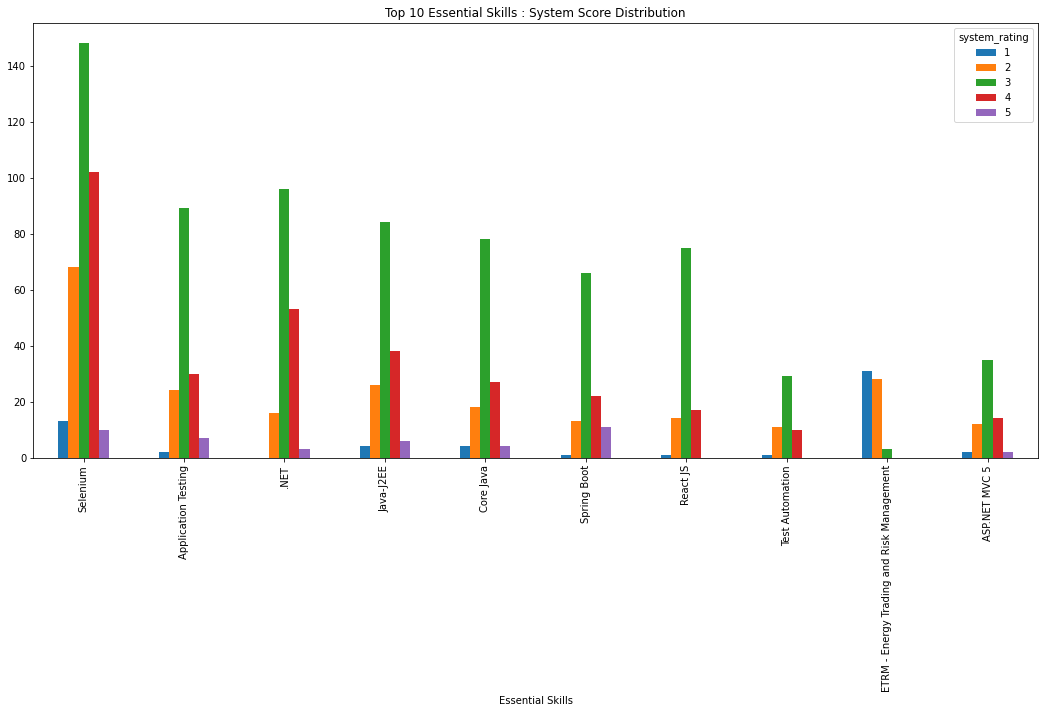

In [920]:
#valid INDIA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]

x2=x[x["COUNTRY"]=="INDIA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df3bb=df.reindex(eslist0)
df3bb.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic1cc.png",bbox_inches = 'tight')



df3bb["total"]=df3bb.sum(axis=1)
df3bb.loc["Total"] = df3bb.sum()
df3bb.loc["% of Total Valid for top 10 skills"]=(df3bb.loc["Total"]/df2b["Valid"][10])*100

df3bb=df3bb.round(1)
df3bb.loc['% of Total Valid for top 10 skills'] = df3bb.loc['% of Total Valid for top 10 skills'].astype(str) + '%'

df3bb.reset_index(inplace=True)
df3bb_string="Valid"
df3bb.name="Top 10 Essential skills : Systems Score Distribution"



worksheet1.write(bottom_border+2, 1, df3bb_string,cell_format2)
worksheet1.write_string(bottom_border+4, 2, df3bb.name,cell_format)
worksheet1.write(bottom_border+2, 2,"",cell_format2)
worksheet1.write(bottom_border+2, 0,"",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df3bb.shape[0]-1
top_right=2+df3bb.shape[1]-1  

df3bb=df3bb.round(1)
df3bb.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3bb.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic1cc.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df3bb

system_rating,Essential Skills,1,2,3,4,5,total
0,Selenium,2,6,148,93,8,257
1,Application Testing,0,3,89,26,7,125
2,.NET,0,2,96,44,3,145
3,Java-J2EE,0,4,84,34,6,128
4,Core Java,1,3,78,26,4,112
5,Spring Boot,0,2,66,22,11,101
6,React JS,0,1,75,16,0,92
7,Test Automation,0,0,29,10,0,39
8,ETRM - Energy Trading and Risk Management,4,14,3,0,0,21
9,ASP.NET MVC 5,0,2,35,14,2,53


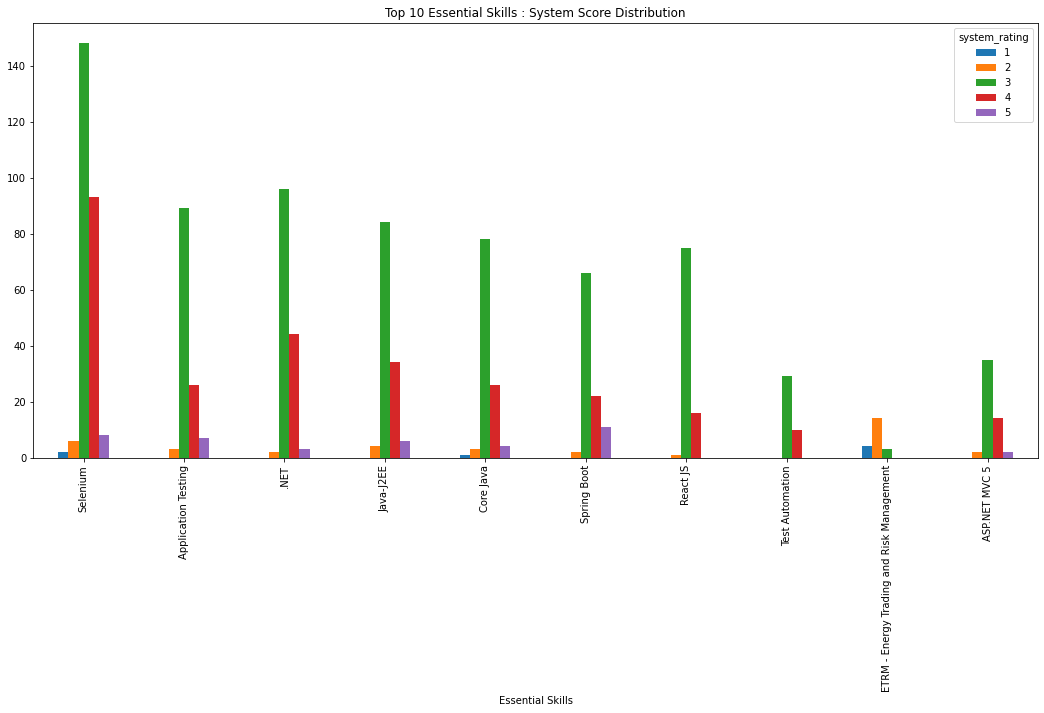

In [921]:
#next table

#valid+similar,INDIA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="Yes"]
x2=x1[x1["COUNTRY"]=="INDIA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df3b=df.reindex(eslist0)
df3b.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic1c.png",bbox_inches = 'tight')



df3b["total"]=df3b.sum(axis=1)
df3b.loc["Total"] = df3b.sum()
df3b.loc["% of Total Valid for top 10 skills"]=(df3b.loc["Total"]/df2b["Valid"][10])*100

df3b=df3b.round(1)
df3b.loc['% of Total Valid for top 10 skills'] = df3b.loc['% of Total Valid for top 10 skills'].astype(str) + '%'

df3b.reset_index(inplace=True)
df3b_string="Valid & similar"
df3b.name="Top 10 Essential skills : Systems Score Distribution"



worksheet1.write(bottom_border+2+5, 1, df3b_string,cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df3b.name,cell_format)
worksheet1.write(bottom_border+2+5, 2, "",cell_format2)
worksheet1.write(bottom_border+2+5, 0, "",cell_format2)


start_row=bottom_border+6+5
bottom_border=start_row+df3b.shape[0]-1
top_right=2+df3b.shape[1]-1  

df3b=df3b.round(1)
df3b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic1c.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df3b



,Essential Skills,1,2,3,4,5,total
0,Selenium,11,62,0,9,2,84
1,Application Testing,2,21,0,4,0,27
2,.NET,0,14,0,9,0,23
3,Java-J2EE,4,22,0,4,0,30
4,Core Java,3,15,0,1,0,19
5,Spring Boot,1,11,0,0,0,12
6,React JS,1,13,0,1,0,15
7,Test Automation,1,11,0,0,0,12
8,ETRM - Energy Trading and Risk Management,27,14,0,0,0,41
9,ASP.NET MVC 5,2,10,0,0,0,12


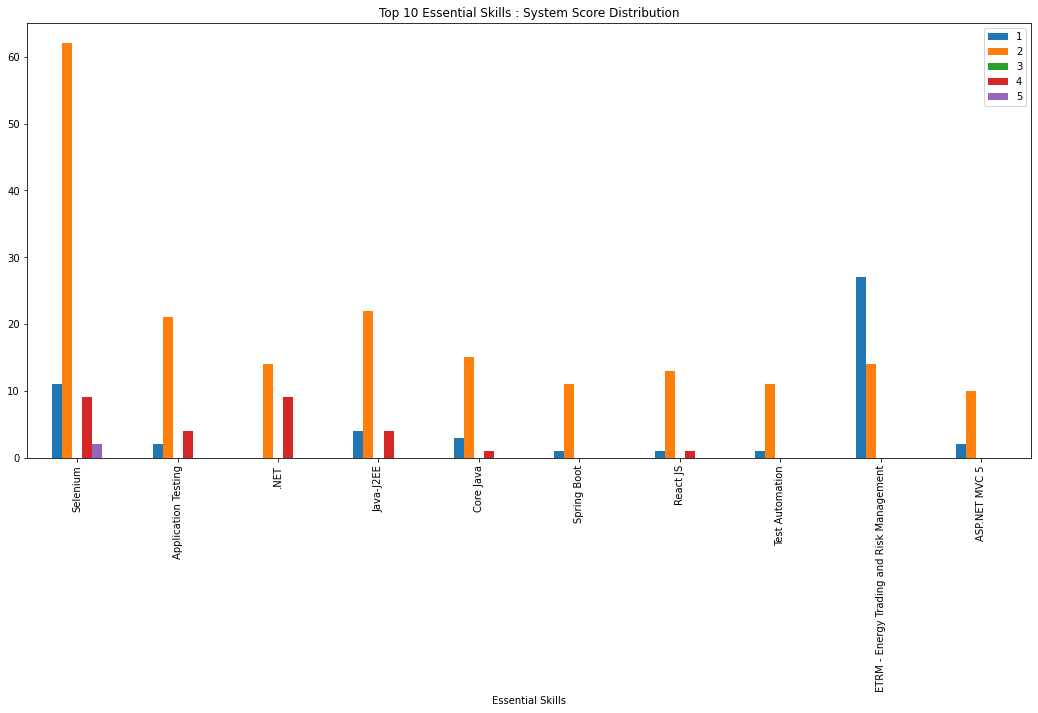

In [922]:
#next table

#valid + non-similar, INDIA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="No"]
x2=x1[x1["COUNTRY"]=="INDIA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df4b=df.reindex(eslist0)

set1={1,2,3,4,5}
set2=set(df4b.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df4b.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df4b=dfx[cols]
df4b=df4b.fillna(0)

df4b.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic2c.png",bbox_inches = 'tight')

df4b["total"]=df4b.sum(axis=1)
df4b.loc["Total"] = df4b.sum()
df4b.loc["% of Total Valid for top 10 skills"]=(df4b.loc["Total"]/df2b["Valid"][10])*100

df4b=df4b.round(1)
df4b.loc['% of Total Valid for top 10 skills'] = df4b.loc['% of Total Valid for top 10 skills'].astype(str) + '%'

df4b.reset_index(inplace=True)
df4b_string="Valid & Non-similar"
df4b.name="Top 10 Essential skills : Systems Score Distribution"

worksheet1.write(bottom_border+2+5, 1, df4b_string,cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df4b.name,cell_format)
worksheet1.write(bottom_border+2+5, 2, "",cell_format2)
worksheet1.write(bottom_border+2+5, 0, "",cell_format2)

start_row=bottom_border+6+5
bottom_border=start_row+df4b.shape[0]-1
top_right=2+df4b.shape[1]-1

df4b=df4b.round(2)

df4b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic2c.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df4b


In [923]:
#next table 
#for USA ,top 10 essential skills

x=df_final[df_final["COUNTRY"]=="USA"]
x["count"]=1

dftest = pd.pivot_table(x, index =["Essential Skills"],columns=["count"],aggfunc ="size",fill_value=0)
dftest

x1=x[x["valid_transcation"]==True]
dftest1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)


mergedDf = dftest.merge(dftest1, left_index=True, right_index=True,how="left")

mergedDf["Valid as % of total for Geo"]=(mergedDf["True_y"]/mergedDf["1_x"])*100
mergedDf

x2=x[x["valid_transcation"]==False]
dftest2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest2 

mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True,how="left")
mergedDf1

mergedDf1["Invalid as % of total for Geo"]=(mergedDf1[False]/mergedDf1["1_x"])*100
mergedDf1

x3=x1[x1["is_similar"]=="Yes"]
dftest3 = pd.pivot_table(x3, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest3

mergedDf2 = mergedDf1.merge(dftest3, left_index=True, right_index=True,how="left")
mergedDf2

mergedDf2["Valid+Similar as % of Total Valid for Geo"]=(mergedDf2["Yes"]/mergedDf2["True_y"])*100


x4=x1[x1["is_similar"]=="No"]
dftest4 = pd.pivot_table(x4, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)


mergedDf3 = mergedDf2.merge(dftest4, left_index=True, right_index=True,how="left")

mergedDf3["Valid+Non-similar as % of Total Valid for Geo"]=(mergedDf3["No"]/mergedDf2["True_y"])*100

mergedDf3=mergedDf3.sort_values(by="1_x",ascending=False)

mergedDf3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"Invalid",'No': 'Valid+Non-similar',"1_x":"transactions"}, inplace=True)

mergedDf3=mergedDf3.fillna(0)

df5b=mergedDf3.head(10)
eslist=df5b.index.values.tolist() 
df5b.loc["Total"] = df5b.sum()

df5b["Valid as % of total for Geo"]["Total"]=(df5b["Valid"]["Total"]/df5b["transactions"]["Total"])*100
df5b["Invalid as % of total for Geo"]["Total"]=(df5b["Invalid"]["Total"]/df5b["transactions"]["Total"])*100
df5b["Valid+Similar as % of Total Valid for Geo"]["Total"]=(df5b["valid+similar"]["Total"]/df5b["Valid"]["Total"])*100
df5b["Valid+Non-similar as % of Total Valid for Geo"]["Total"]=(df5b["Valid+Non-similar"]["Total"]/df5b["Valid"]["Total"])*100


df5b=df5b.round(1)
df5b['Valid as % of total for Geo'] = df5b['Valid as % of total for Geo'].astype(str) + '%'
df5b['Invalid as % of total for Geo'] = df5b['Invalid as % of total for Geo'].astype(str) + '%'
df5b['Valid+Similar as % of Total Valid for Geo'] = df5b['Valid+Similar as % of Total Valid for Geo'].astype(str) + '%'
df5b['Valid+Non-similar as % of Total Valid for Geo'] = df5b['Valid+Non-similar as % of Total Valid for Geo'].astype(str) + '%'
df5b.reset_index(inplace=True)

df5b_string="USA"
df5b.name='TOP 10 Skill Analysis'
worksheet1.write(bottom_border+2+5, 2, df5b_string,cell_format1)
worksheet1.write_string(bottom_border+4+5, 2, df5b.name,cell_format)

worksheet1.set_row(bottom_border+2+5,20,title_format)

start_row=bottom_border+6+5
bottom_border=start_row+df5b.shape[0]-1
top_right=2+df5b.shape[1]-1

df5b=df5b.round(1)
df5b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.set_row(bottom_border,15,cell_format3)

worksheet1.write(bottom_border, 2,"Total",new_format2)


df5b

<ipython-input-923-c6c3c9b80434>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Essential Skills,transactions,Valid,Valid as % of total for Geo,Invalid,Invalid as % of total for Geo,valid+similar,Valid+Similar as % of Total Valid for Geo,Valid+Non-similar,Valid+Non-similar as % of Total Valid for Geo
0,Project Management,33.0,23.0,69.7%,10.0,30.3%,22.0,95.7%,1.0,4.3%
1,Application Testing,17.0,6.0,35.3%,11.0,64.7%,5.0,83.3%,1.0,16.7%
2,Spring Boot,16.0,4.0,25.0%,12.0,75.0%,4.0,100.0%,0.0,0.0%
3,ETRM - Energy Trading and Risk Management,15.0,12.0,80.0%,3.0,20.0%,2.0,16.7%,10.0,83.3%
4,Project Management ADM,13.0,8.0,61.5%,5.0,38.5%,8.0,100.0%,0.0,0.0%
5,.NET,12.0,8.0,66.7%,4.0,33.3%,6.0,75.0%,2.0,25.0%
6,Enterprise Platform Engineering Java,11.0,4.0,36.4%,7.0,63.6%,1.0,25.0%,3.0,75.0%
7,"Project Management ADM, Infra Managed Serv Pro...",10.0,4.0,40.0%,6.0,60.0%,4.0,100.0%,0.0,0.0%
8,Solution Architecture,10.0,6.0,60.0%,4.0,40.0%,5.0,83.3%,1.0,16.7%
9,Infra Managed Serv Project Management,9.0,6.0,66.7%,3.0,33.3%,5.0,83.3%,1.0,16.7%


system_rating,Essential Skills,1,2,3,4,5,Total
0,Project Management,0,0,5,14,4,23
1,Application Testing,0,1,4,1,0,6
2,Spring Boot,0,0,4,0,0,4
3,ETRM - Energy Trading and Risk Management,0,10,2,0,0,12
4,Project Management ADM,0,0,1,7,0,8
5,.NET,0,2,6,0,0,8
6,Enterprise Platform Engineering Java,0,3,1,0,0,4
7,"Project Management ADM, Infra Managed Serv Pro...",0,0,1,3,0,4
8,Solution Architecture,0,1,2,3,0,6
9,Infra Managed Serv Project Management,0,1,5,0,0,6


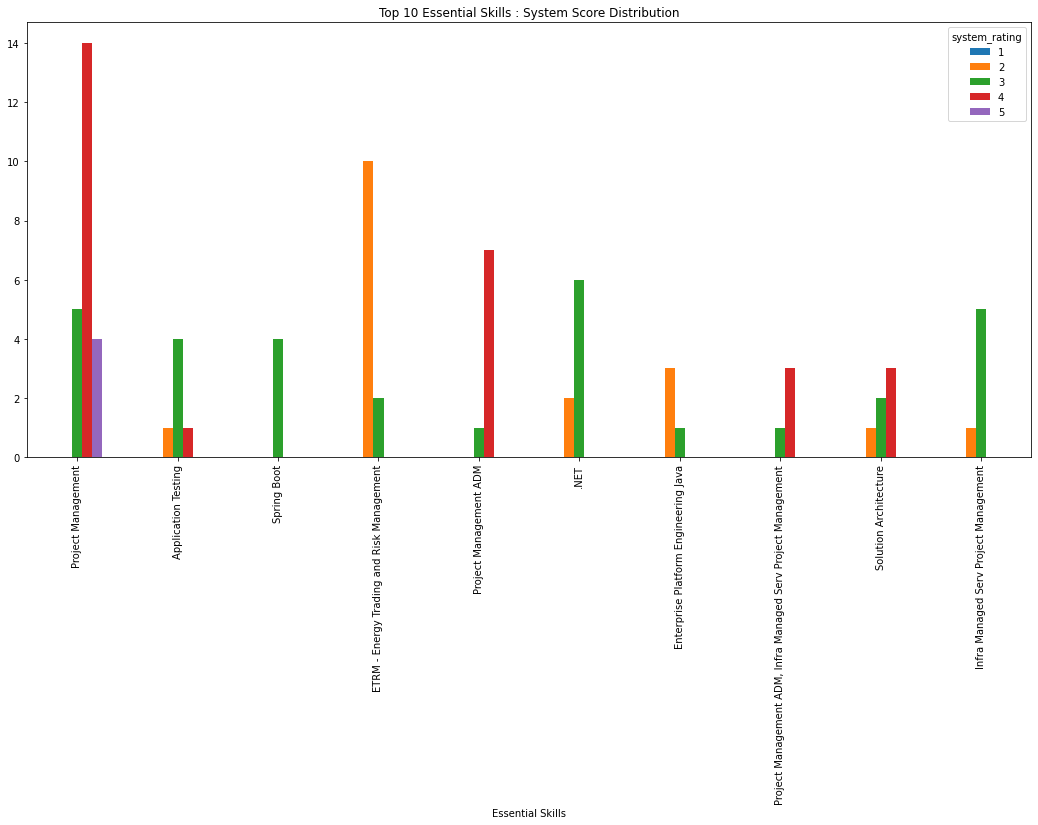

In [924]:
#valid, USA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]

x2=x[x["COUNTRY"]=="USA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df6bb=df.reindex(eslist)
df6bb.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic3cc.png",bbox_inches = 'tight')



df6bb['Total'] = df6bb.sum(axis=1)
df6bb.loc["Total"] = df6bb.sum()
df6bb.loc["% of Total Valid for top 10 skills"]=(df6bb.loc["Total"]/df5b["Valid"][10])*100

df6bb=df6bb.round(1)
df6bb.loc['% of Total Valid for top 10 skills'] = df6bb.loc['% of Total Valid for top 10 skills'].astype(str) + '%'

df6bb.reset_index(inplace=True)

df6bb_string='Valid'
df6bb.name='Top 10 Essesntial Skills : System Score Distribution'
worksheet1.write(bottom_border+2, 1, df6bb_string,cell_format2)
worksheet1.write_string(bottom_border+4, 2, df6bb.name,cell_format)
worksheet1.write(bottom_border+2, 2, "",cell_format2)
worksheet1.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df6bb.shape[0]-1
top_right=2+df6bb.shape[1]-1

df6bb=df6bb.round(1)

df6bb.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6bb.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic3cc.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df6bb

system_rating,Essential Skills,1,2,3,4,5,Total
0,Project Management,0,0,5,13,4,22
1,Application Testing,0,0,4,1,0,5
2,Spring Boot,0,0,4,0,0,4
3,ETRM - Energy Trading and Risk Management,0,0,2,0,0,2
4,Project Management ADM,0,0,1,7,0,8
5,.NET,0,0,6,0,0,6
6,Enterprise Platform Engineering Java,0,0,1,0,0,1
7,"Project Management ADM, Infra Managed Serv Pro...",0,0,1,3,0,4
8,Solution Architecture,0,1,2,2,0,5
9,Infra Managed Serv Project Management,0,0,5,0,0,5


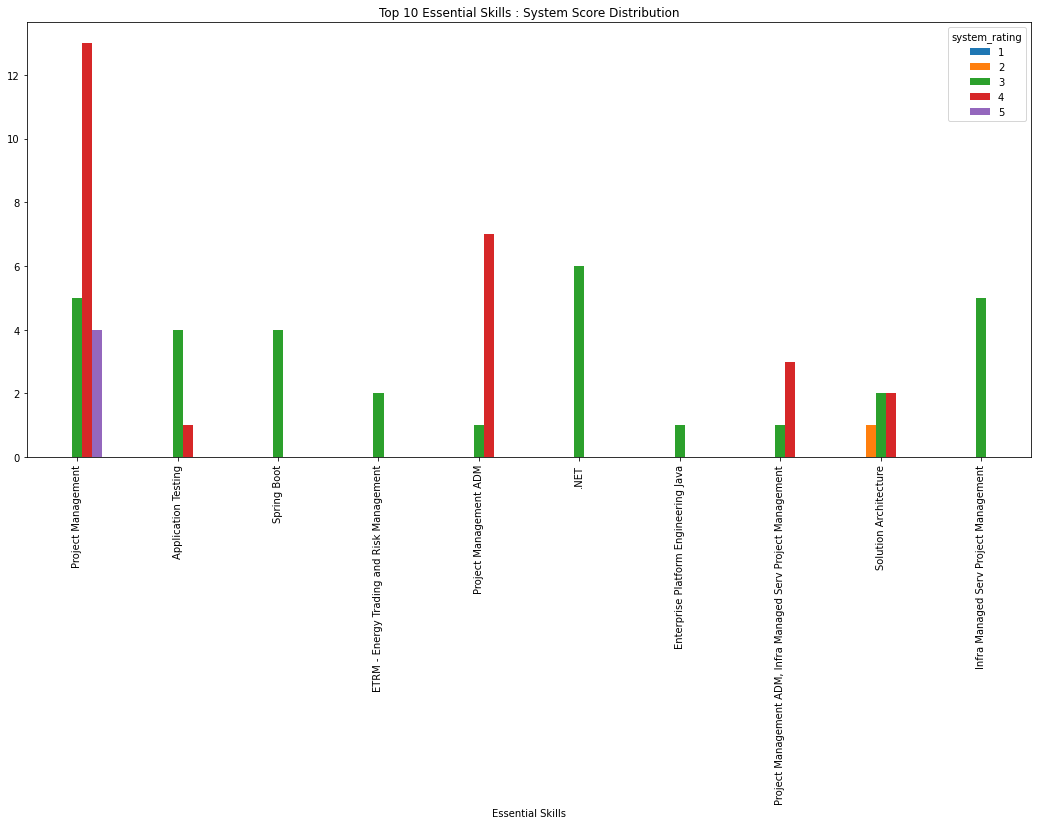

In [925]:
#next table
#valid+similar, USA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="Yes"]
x2=x1[x1["COUNTRY"]=="USA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df6b=df.reindex(eslist)
df6b.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic3c.png",bbox_inches = 'tight')



df6b['Total'] = df6b.sum(axis=1)
df6b.loc["Total"] = df6b.sum()
df6b.loc["% of Total Valid for top 10 skills"]=(df6b.loc["Total"]/df5b["Valid"][10])*100

df6b=df6b.round(1)
df6b.loc['% of Total Valid for top 10 skills'] = df6b.loc['% of Total Valid for top 10 skills'].astype(str) + '%'
df6b.reset_index(inplace=True)

df6b_string='Valid  & Similar'
df6b.name='Top 10 Essesntial Skills : System Score Distribution'
worksheet1.write(bottom_border+2+5, 1, df6b_string,cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df6b.name,cell_format)
worksheet1.write(bottom_border+2+5, 2, "",cell_format2)
worksheet1.write(bottom_border+2+5, 0, "",cell_format2)


start_row=bottom_border+6+5
bottom_border=start_row+df6b.shape[0]-1
top_right=2+df6b.shape[1]-1

df6b=df6b.round(2)

df6b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic3c.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df6b

,Essential Skills,1,2,3,4,5,Total
0,Project Management,0,0,0,1,0,1
1,Application Testing,0,1,0,0,0,1
2,Spring Boot,0,0,0,0,0,0
3,ETRM - Energy Trading and Risk Management,0,10,0,0,0,10
4,Project Management ADM,0,0,0,0,0,0
5,.NET,0,2,0,0,0,2
6,Enterprise Platform Engineering Java,0,3,0,0,0,3
7,"Project Management ADM, Infra Managed Serv Pro...",0,0,0,0,0,0
8,Solution Architecture,0,0,0,1,0,1
9,Infra Managed Serv Project Management,0,1,0,0,0,1


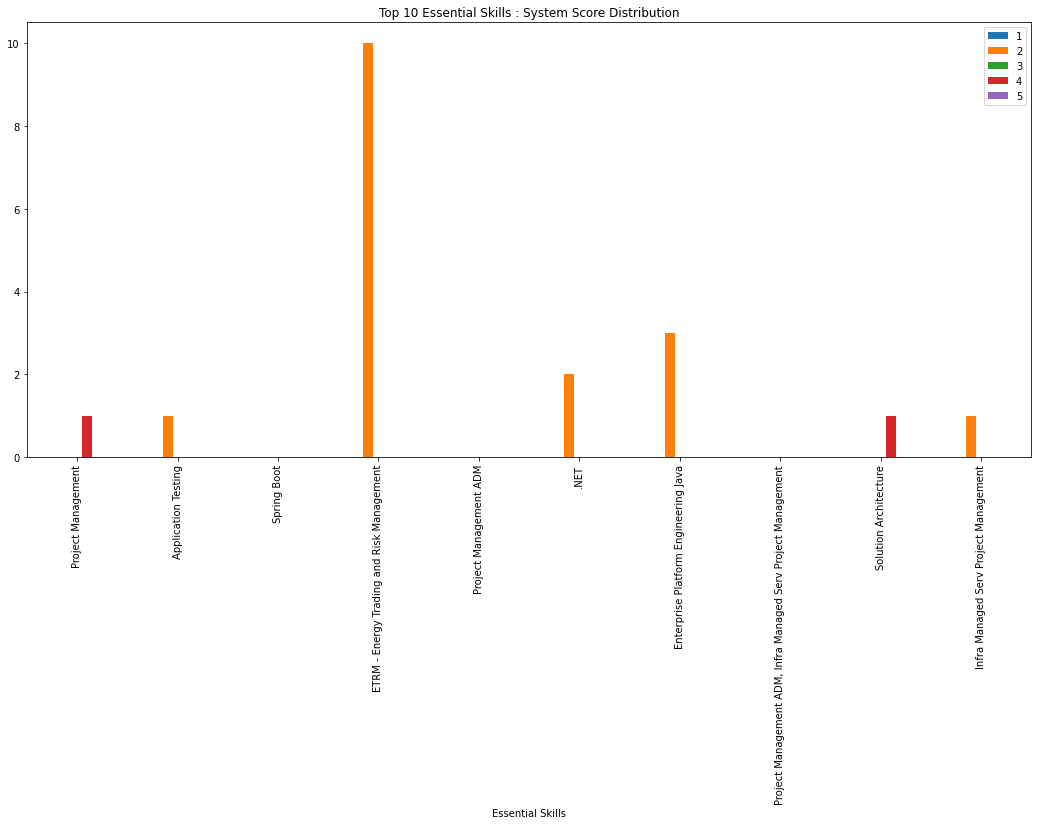

In [926]:
#next table

#valid + non-similar, USA ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="No"]
x2=x1[x1["COUNTRY"]=="USA"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df7b=df.reindex(eslist)

set1={1,2,3,4,5}
set2=set(df7b.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df7b.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df7b=dfx[cols]

df7b=df7b.fillna(0)
df7b.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic4c.png",bbox_inches = 'tight')

df7b['Total'] = df7b.sum(axis=1)
df7b.loc["Total"] = df7b.sum()
df7b.loc["% of Total Valid for top 10 skills"]=(df7b.loc["Total"]/df5b["Valid"][10])*100

df7b=df7b.round(1)
df7b.loc['% of Total Valid for top 10 skills'] = df7b.loc['% of Total Valid for top 10 skills'].astype(str) + '%'
df7b.reset_index(inplace=True)

df7b_string='Valid & Non-Similar'
df7b.name='Top 10 Essesntial Skills : System Score Distribution'
worksheet1.write(bottom_border+2+5, 1, df7b_string,cell_format2)
worksheet1.write_string(bottom_border+4+5, 2, df7b.name,cell_format)
worksheet1.write(bottom_border+2+5, 2, "",cell_format2)
worksheet1.write(bottom_border+2+5, 0, "",cell_format2)


start_row=bottom_border+6+5
bottom_border=start_row+df7b.shape[0]-1
top_right=2+df7b.shape[1]-1


df7b=df7b.round(1)

df7b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df7b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.insert_image(start_row-1,top_right+5, 'americanpic4c.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.set_row(bottom_border-1,15,cell_format3)

worksheet1.write(bottom_border-1, 2,"Total",new_format2)
worksheet1.write(bottom_border, 2,"% of Total Valid for top 10 skills",new_format2)

df7b

In [927]:
#EUROPE

In [928]:
# Europe ,top 10 essential skills

x=df_final[df_final["COUNTRY"]=="EUROPE"]
x["count"]=1

dftest = pd.pivot_table(x, index =["Essential Skills"],columns=["count"],aggfunc ="size",fill_value=0)

x1=x[x["valid_transcation"]==True]
dftest1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)


mergedDf = dftest.merge(dftest1, left_index=True, right_index=True,how="left")

mergedDf

mergedDf["Valid as % of total for Geo"]=(mergedDf["True_y"]/mergedDf["1_x"])*100
mergedDf

x2=x[x["valid_transcation"]==False]
dftest2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
dftest2 

mergedDf1 = mergedDf.merge(dftest2, left_index=True, right_index=True)
mergedDf1

mergedDf1["Invalid as % of total for Geo"]=(mergedDf1[False]/mergedDf1["1_x"])*100
mergedDf1

x3=x1[x1["is_similar"]=="Yes"]
dftest3 = pd.pivot_table(x3, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
dftest3
mergedDf2 = mergedDf1.merge(dftest3, left_index=True, right_index=True,how="left")
mergedDf2

mergedDf2["Valid+Similar as % of Total Valid for Geo"]=(mergedDf2["Yes"]/mergedDf2["True_y"])*100

mergedDf2
x4=x1[x1["is_similar"]=="No"]
dftest4 = pd.pivot_table(x4, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)

mergedDf3 = mergedDf2.merge(dftest4, left_index=True, right_index=True,how="left")

mergedDf3
mergedDf3["Valid+Non-similar as % of Total Valid for Geo"]=(mergedDf3["No"]/mergedDf2["True_y"])*100

mergedDf3
mergedDf3=mergedDf3.sort_values(by="1_x",ascending=False)

mergedDf3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"Invalid",'No': 'Valid+Non-similar',"1_x":"transactions"}, inplace=True)

df=mergedDf3.head(10)
df8b=df.fillna(0)
eslist1=df8b.index.values.tolist() 


df8b.loc["Total"] = df.sum()

df8b["Valid as % of total for Geo"]["Total"]=(df8b["Valid"]["Total"]/df8b["transactions"]["Total"])*100
df8b["Invalid as % of total for Geo"]["Total"]=(df8b["Invalid"]["Total"]/df8b["transactions"]["Total"])*100
df8b["Valid+Similar as % of Total Valid for Geo"]["Total"]=(df8b["valid+similar"]["Total"]/df8b["Valid"]["Total"])*100
df8b["Valid+Non-similar as % of Total Valid for Geo"]["Total"]=(df8b["Valid+Non-similar"]["Total"]/df8b["Valid"]["Total"])*100

df8b=df8b.round(1)
df8b['Valid as % of total for Geo'] = df8b['Valid as % of total for Geo'].astype(str) + '%'
df8b['Invalid as % of total for Geo'] = df8b['Invalid as % of total for Geo'].astype(str) + '%'
df8b['Valid+Similar as % of Total Valid for Geo'] = df8b['Valid+Similar as % of Total Valid for Geo'].astype(str) + '%'
df8b['Valid+Non-similar as % of Total Valid for Geo'] = df8b['Valid+Non-similar as % of Total Valid for Geo'].astype(str) + '%'

df8b.reset_index(inplace=True)

df8b_string="EUROPE"
df8b.name='TOP 10  Essential Skill Analysis'
worksheet1.write(bottom_border+2+5, 2, df8b_string,cell_format1)
worksheet1.write_string(bottom_border+4+5, 2, df8b.name,cell_format)
worksheet1.write(bottom_border+2+5, 3, "",cell_format2)

worksheet1.set_row(bottom_border+2+5,20,title_format)

start_row=bottom_border+6+5
bottom_border=start_row+df8b.shape[0]-1
top_right=2+df8b.shape[1]-1



df8b=df8b.round(2)
df8b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df8b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.set_row(bottom_border,15,cell_format3)

worksheet1.write(bottom_border, 2,"Total",new_format2)


df8b





<ipython-input-928-bba70832af57>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1


,Essential Skills,transactions,Valid,Valid as % of total for Geo,Invalid,Invalid as % of total for Geo,valid+similar,Valid+Similar as % of Total Valid for Geo,Valid+Non-similar,Valid+Non-similar as % of Total Valid for Geo
0,ITIL Incident Mgmt,9.0,6.0,66.7%,3.0,33.3%,6.0,100.0%,0.0,0.0%
1,Test Project Management,5.0,2.0,40.0%,3.0,60.0%,2.0,100.0%,0.0,0.0%
2,Project Management,5.0,0.0,0.0%,5.0,100.0%,0.0,0.0%,0.0,0.0%
3,Agile-Scrum,4.0,1.0,25.0%,3.0,75.0%,0.0,0.0%,1.0,100.0%
4,React JS,4.0,2.0,50.0%,2.0,50.0%,2.0,100.0%,0.0,0.0%
5,Selenium,4.0,1.0,25.0%,3.0,75.0%,1.0,100.0%,0.0,0.0%
6,Infra SI Project Management,3.0,1.0,33.3%,2.0,66.7%,1.0,100.0%,0.0,0.0%
7,.NET,3.0,1.0,33.3%,2.0,66.7%,1.0,100.0%,0.0,0.0%
8,Tivoli Backup,2.0,0.0,0.0%,2.0,100.0%,0.0,0.0%,0.0,0.0%
9,VAPT - VULNERABILITY ASSESSMENT AND PENETRATIO...,2.0,0.0,0.0%,2.0,100.0%,0.0,0.0%,0.0,0.0%


In [929]:
#valid, Europe ,top 10 essential skills
x=df_final[df_final["valid_transcation"]==True]

x2=x[x["COUNTRY"]=="EUROPE"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df9bb=df.reindex(eslist1)

set1={1,2,3,4,5}
set2=set(df9bb.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df9bb.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df9bb=dfx[cols]

df9bb=df9bb.fillna(0)
df9bb['Total'] = df9bb.sum(axis=1)
df9bb.loc["Total"] = df9bb.sum()

df9bb.reset_index(inplace=True)

df9bb_string="Valid"
df9bb.name='Top 10 Essential Skill : System Score Distribution'
worksheet1.write(bottom_border+2, 1, df9bb_string,cell_format2)
worksheet1.write_string(bottom_border+4, 2, df9bb.name,cell_format)
worksheet1.write(bottom_border+2, 2, "",cell_format2)
worksheet1.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df9bb.shape[0]-1
top_right=2+df9bb.shape[1]-1

df9bb=df9bb.round(1)
df9bb.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df9bb.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
    
worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.write(bottom_border, 2,"Total",new_format2)

df9bb

,Essential Skills,1,2,3,4,5,Total
0,ITIL Incident Mgmt,0.0,0.0,3.0,3.0,0.0,6.0
1,Test Project Management,0.0,0.0,1.0,1.0,0.0,2.0
2,Project Management,0.0,0.0,0.0,0.0,0.0,0.0
3,Agile-Scrum,0.0,1.0,0.0,0.0,0.0,1.0
4,React JS,0.0,0.0,2.0,0.0,0.0,2.0
5,Selenium,0.0,0.0,1.0,0.0,0.0,1.0
6,Infra SI Project Management,0.0,0.0,1.0,0.0,0.0,1.0
7,.NET,0.0,0.0,1.0,0.0,0.0,1.0
8,Tivoli Backup,0.0,0.0,0.0,0.0,0.0,0.0
9,VAPT - VULNERABILITY ASSESSMENT AND PENETRATIO...,0.0,0.0,0.0,0.0,0.0,0.0


In [930]:
#next table
#valid+similar,Europe ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="Yes"]
x2=x1[x1["COUNTRY"]=="EUROPE"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df9b=df.reindex(eslist1)

set1={1,2,3,4,5}
set2=set(df9b.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df9b.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df9b=dfx[cols]

df9b=df9b.fillna(0)
df9b['Total'] = df9b.sum(axis=1)
df9b.loc["Total"] = df9b.sum()

df9b.reset_index(inplace=True)

df9b_string="Valid & Similar"
df9b.name="Top 10 Essential Skill : System Score Distribution"
worksheet1.write(bottom_border+2, 1, df9b_string,cell_format2)
worksheet1.write_string(bottom_border+4, 2, df9b.name,cell_format)
worksheet1.write(bottom_border+2, 2, "",cell_format2)
worksheet1.write(bottom_border+2, 0, "",cell_format2)


start_row=bottom_border+6
bottom_border=start_row+df9b.shape[0]-1
top_right=2+df9b.shape[1]-1

df9b=df9b.round(1)
df9b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df9b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)
worksheet1.set_row(bottom_border,15,cell_format3)

worksheet1.write(bottom_border, 2,"Total",new_format2)

df9b


,Essential Skills,1,2,3,4,5,Total
0,ITIL Incident Mgmt,0.0,0.0,3.0,3.0,0.0,6.0
1,Test Project Management,0.0,0.0,1.0,1.0,0.0,2.0
2,Project Management,0.0,0.0,0.0,0.0,0.0,0.0
3,Agile-Scrum,0.0,0.0,0.0,0.0,0.0,0.0
4,React JS,0.0,0.0,2.0,0.0,0.0,2.0
5,Selenium,0.0,0.0,1.0,0.0,0.0,1.0
6,Infra SI Project Management,0.0,0.0,1.0,0.0,0.0,1.0
7,.NET,0.0,0.0,1.0,0.0,0.0,1.0
8,Tivoli Backup,0.0,0.0,0.0,0.0,0.0,0.0
9,VAPT - VULNERABILITY ASSESSMENT AND PENETRATIO...,0.0,0.0,0.0,0.0,0.0,0.0


In [931]:
list(df.columns)

[1, 2]

In [932]:
#next table

#valid + non-similar, Europe ,top 10 essential skills

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["is_similar"]=="No"]
x2=x1[x1["COUNTRY"]=="EUROPE"]

df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df10b=df.reindex(eslist1)
set1={1,2,3,4,5}
set2=set(df10b.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df10b.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df10b=dfx[cols]

df10b=df10b.fillna(0)

df10b['Total'] = df10b.sum(axis=1)
df10b.loc["Total"] = df10b.sum()

df10b.reset_index(inplace=True)

df10b_string="Valid & Non-similar"
df10b.name='Top 10 Essential Skill : System Score Distribution'
worksheet1.write(bottom_border+2, 1, df10b_string,cell_format2)
worksheet1.write_string(bottom_border+4, 2, df10b.name,cell_format)
worksheet1.write(bottom_border+2, 2, "",cell_format2)
worksheet1.write(bottom_border+2, 0, "",cell_format2)


df10b=df10b.round(1)


start_row=bottom_border+5+2
bottom_border=start_row+df10b.shape[0]-1
top_right=2+df10b.shape[1]-1

df10b.to_excel(writer,sheet_name='Skill Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet1.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df10b.columns.values):
    worksheet1.write(start_row-1, 2+col_num, value, header_format)

worksheet1.set_row(bottom_border,15,cell_format3)
worksheet1.write(bottom_border, 2,"Total",new_format2)

df10b


,Essential Skills,1,2,3,4,5,Total
0,ITIL Incident Mgmt,0.0,0.0,0.0,0.0,0.0,0.0
1,Test Project Management,0.0,0.0,0.0,0.0,0.0,0.0
2,Project Management,0.0,0.0,0.0,0.0,0.0,0.0
3,Agile-Scrum,0.0,1.0,0.0,0.0,0.0,1.0
4,React JS,0.0,0.0,0.0,0.0,0.0,0.0
5,Selenium,0.0,0.0,0.0,0.0,0.0,0.0
6,Infra SI Project Management,0.0,0.0,0.0,0.0,0.0,0.0
7,.NET,0.0,0.0,0.0,0.0,0.0,0.0
8,Tivoli Backup,0.0,0.0,0.0,0.0,0.0,0.0
9,VAPT - VULNERABILITY ASSESSMENT AND PENETRATIO...,0.0,0.0,0.0,0.0,0.0,0.0


In [933]:
df_final.rename(columns={"rejected_reason":"Rejected Reason"},inplace=True)

In [934]:
listr=list(df_final["Rejected Reason"].value_counts().index)
listr.pop(0)
listr

['SYSTEM REJECT - EMPLOYEE ALLOCATED',
 'TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)',
 'CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE ORDER YET',
 'Screen Reject by Customer',
 'EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT',
 'SYSTEM REJECT- CURRENT ASSIGNMENT EXTENSION',
 'EMPLOYEE IS NOT REACHABLE / NOT RESPONDING TO EMAIL',
 'NON-AVAILABILITY OF VISA',
 'EMPLOYEE GOING ON/ALREADY ON MATERNITY/LOP/SABBATICAL LEAVE',
 'Tech Reject by Customer',
 'Communication Reject by Customer',
 'SYSTEM REJECTED - INDENT FULFILLED',
 'EMPLOYEE IS NOT RESPONDING TO CLIENT INTERVIEW SCHEDULE']

In [935]:
#REJECTION ANALYSIS


x=df_final[df_final["valid_transcation"]==True]
x1=x[x["Rejected Reason"].isin(listr)]
x1["count"]="Rejections (with reason)"
df = pd.pivot_table(x1, index =["is_similar"],columns=["count"],aggfunc ="size",fill_value=0)
df["As % of Total Valid"]=(df["Rejections (with reason)"]/no_of_valid)*100
df.loc["Total"] = df.sum()
df["As % of Valid wth rejection reason"]=(df["Rejections (with reason)"]/df["Rejections (with reason)"]["Total"])*100
df1c=df.rename(index={'Yes': 'similar','No': 'Non-similar'})

df1c=df1c.round(1)
df1c['As % of Total Valid'] = df1c['As % of Total Valid'].astype(str) + '%'
df1c['As % of Valid wth rejection reason'] = df1c['As % of Valid wth rejection reason'].astype(str) + '%'

df1c.reset_index(inplace=True)
df1c.rename(columns={"is_similar":"Similarity"},inplace=True)
df1c.name="Valid Rejection Analysis"
worksheet3.write_string(3, 2, df1c.name,cell_format)

start_row=0+5
bottom_border=start_row+df1c.shape[0]-1
top_right=2+df1c.shape[1]-1

df1c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
    
worksheet3.set_row(1,20,title_format)

worksheet3.write(1, 2,"REJECTION ANALYSIS",cell_format1)
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.write(bottom_border, 2,"Total",new_format2)

df1c


<ipython-input-935-36c57758944e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1["count"]="Rejections (with reason)"


count,Similarity,Rejections (with reason),As % of Total Valid,As % of Valid wth rejection reason
0,Non-similar,583.0,15.1%,27.8%
1,similar,1516.0,39.2%,72.2%
2,Total,2099.0,54.3%,100.0%


In [936]:
#Top 5 Rejection Reason Analysis

x0=df_final[df_final["Rejected Reason"].isin(listr)]
x=x0[x0["valid_transcation"]==True]

df = pd.pivot_table(x, index =["Rejected Reason"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
df["As a % of total valid"]=(df[True]/no_of_valid)*100
df["As % of total transactions"]=(df[True]/total_transactions)*100

x1=x0[x0["valid_transcation"]==False]
df1 = pd.pivot_table(x1, index =["Rejected Reason"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)

x2=x[x["is_similar"]=="Yes"]
df2 = pd.pivot_table(x2, index =["Rejected Reason"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df2
merged_df2["Valid & similar as % of total valid for rejected reason"]=(merged_df2["Yes"]/merged_df2[True])*100
merged_df2["Valid & similar as % of total transactions"]=(merged_df2["Yes"]/total_transactions)*100

x3=x[x["is_similar"]=="No"]
df3 = pd.pivot_table(x3, index =["Rejected Reason"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df3, left_index=True, right_index=True)
merged_df3["Valid & non-similar as % of total valid for rejected reason"]=(merged_df3["No"]/merged_df3[True])*100
merged_df3["Valid & non-similar as % of total transactions"]=(merged_df3["No"]/total_transactions)*100

merged_df3
merged_df3["Valid & Similar as % of Valid with rejection reason"]=(merged_df3["Yes"]/df1c["Rejections (with reason)"][2])*100
merged_df3["Valid & Non-similar as % of Valid with rejection reason"]=(merged_df3["No"]/df1c["Rejections (with reason)"][2])*100

merged_df3.rename(columns={'Yes': 'valid & similar',True:"Valid",False:"invalid",'No': 'valid & Non-similar'},inplace=True)


merged_df3=merged_df3.sort_values(by="Valid",ascending=False)

df2c=merged_df3.head(5)
rrlist=df2c.index.values.tolist()
df2c.loc["Total"] = df2c.sum()


df2c["Valid & similar as % of total valid for rejected reason"]["Total"]=(df2c["valid & similar"]["Total"]/df2c["Valid"]["Total"])*100
df2c["Valid & non-similar as % of total valid for rejected reason"]["Total"]=(df2c["valid & Non-similar"]["Total"]/df2c["Valid"]["Total"])*100

df2c=df2c.round(1)
df2c['As a % of total valid'] = df2c['As a % of total valid'].astype(str) + '%'
df2c['As % of total transactions'] = df2c['As % of total transactions'].astype(str) + '%'
df2c['Valid & similar as % of total valid for rejected reason'] = df2c['Valid & similar as % of total valid for rejected reason'].astype(str) + '%'
df2c['Valid & similar as % of total transactions'] = df2c['Valid & similar as % of total transactions'].astype(str) + '%'
df2c['Valid & non-similar as % of total valid for rejected reason'] = df2c['Valid & non-similar as % of total valid for rejected reason'].astype(str) + '%'
df2c['Valid & non-similar as % of total transactions'] = df2c['Valid & non-similar as % of total transactions'].astype(str) + '%'
df2c['Valid & Similar as % of Valid with rejection reason'] = df2c['Valid & Similar as % of Valid with rejection reason'].astype(str) + '%'
df2c['Valid & Non-similar as % of Valid with rejection reason'] = df2c['Valid & Non-similar as % of Valid with rejection reason'].astype(str) + '%'


df2c.reset_index(inplace=True)
df2c.name='Top 5 Rejection Reason Analysis'

worksheet3.write_string(bottom_border+4, 2, df2c.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df2c.shape[0]-1
top_right=2+df2c.shape[1]-1 

df2c=df2c.round(1)
df2c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.write(bottom_border, 2,"Total",new_format2)
df2c

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


,Rejected Reason,Valid,As a % of total valid,As % of total transactions,invalid,valid & similar,Valid & similar as % of total valid for rejected reason,Valid & similar as % of total transactions,valid & Non-similar,Valid & non-similar as % of total valid for rejected reason,Valid & non-similar as % of total transactions,Valid & Similar as % of Valid with rejection reason,Valid & Non-similar as % of Valid with rejection reason
0,SYSTEM REJECT - EMPLOYEE ALLOCATED,868.0,22.5%,11.3%,764.0,621.0,71.5%,8.1%,247.0,28.5%,3.2%,29.6%,11.8%
1,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,338.0,8.7%,4.4%,299.0,288.0,85.2%,3.8%,50.0,14.8%,0.7%,13.7%,2.4%
2,Screen Reject by Customer,274.0,7.1%,3.6%,226.0,194.0,70.8%,2.5%,80.0,29.2%,1.0%,9.2%,3.8%
3,CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE...,244.0,6.3%,3.2%,280.0,168.0,68.9%,2.2%,76.0,31.1%,1.0%,8.0%,3.6%
4,EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT,157.0,4.1%,2.0%,187.0,116.0,73.9%,1.5%,41.0,26.1%,0.5%,5.5%,2.0%
5,Total,1881.0,48.7%,24.5%,1756.0,1387.0,73.7%,18.1%,494.0,26.3%,6.4%,66.1%,23.5%


system_rating,Rejected Reason,1,2,3,4,5,Total
0,SYSTEM REJECT - EMPLOYEE ALLOCATED,31,216,436,167,18,868
1,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,25,119,144,47,3,338
2,Screen Reject by Customer,11,69,141,50,3,274
3,CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE...,7,69,122,41,5,244
4,EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT,5,36,79,33,4,157
5,Total,79,509,922,338,33,1881


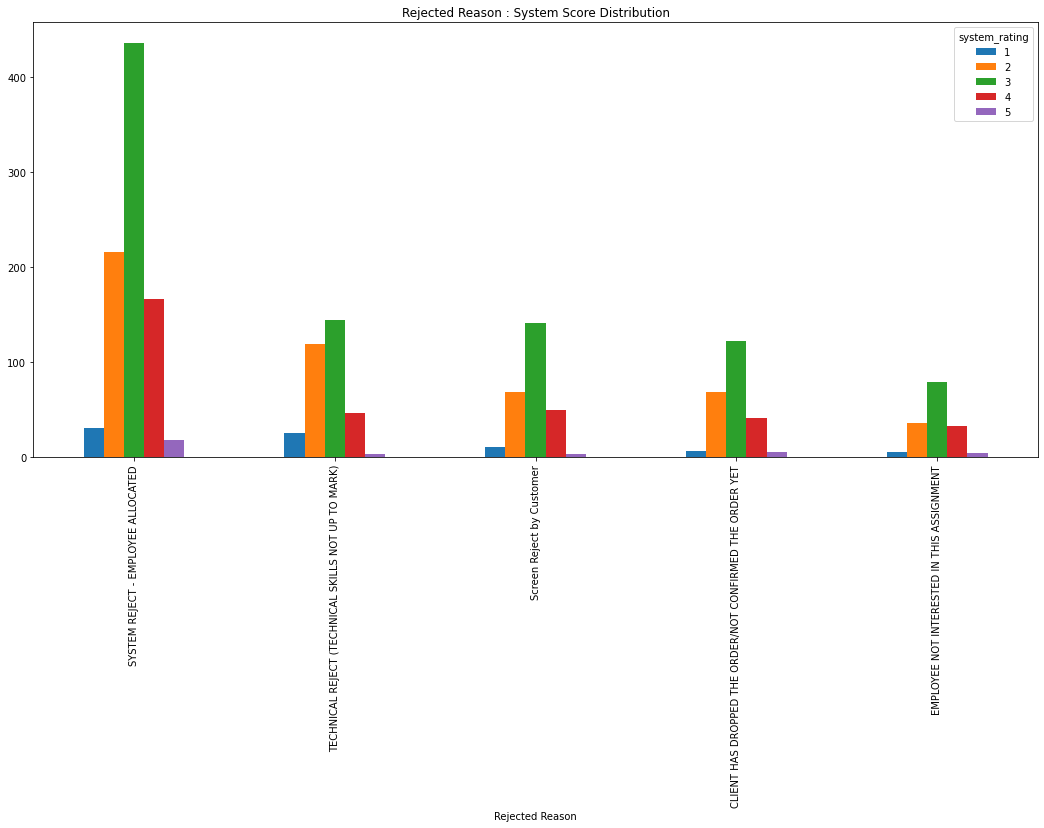

In [937]:
#next table
#valid,rejected reason vs score

x=df_final[df_final["valid_transcation"]==True]


df = pd.pivot_table(x, index =["Rejected Reason"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)

df3c=df.reindex(rrlist)
df3c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Rejected Reason : System Score Distribution")
plt.savefig("americanpic1d.png",bbox_inches = 'tight')

df3c.loc["Total"] = df3c.sum()
df3c['Total'] = df3c.sum(axis=1)

df3c.reset_index(inplace=True)
df3c_string="Valid"
df3c.name='Rejected Reason : System Score Distribution'
worksheet3.write(bottom_border+2, 1, df3c_string,cell_format2)
worksheet3.write_string(bottom_border+4, 2, df3c.name,cell_format)
worksheet3.write(bottom_border+2, 2, "",cell_format2)
worksheet3.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df3c.shape[0]-1
top_right=2+df3c.shape[1]-1 

df3c=df3c.round(1)

df3c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5, 'americanpic1d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.write(bottom_border, 2,"Total",new_format2)
df3c

system_rating,Rejected Reason,1,2,3,4,5,Total
0,SYSTEM REJECT - EMPLOYEE ALLOCATED,0,0,436,167,18,621
1,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,25,119,144,0,0,288
2,Screen Reject by Customer,0,0,141,50,3,194
3,CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE...,0,0,122,41,5,168
4,EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT,0,0,79,33,4,116
5,Total,25,119,922,291,30,1387
6,% of Total Valid Rejections(with reason),1.2%,5.7%,43.9%,13.9%,1.4%,66.1%


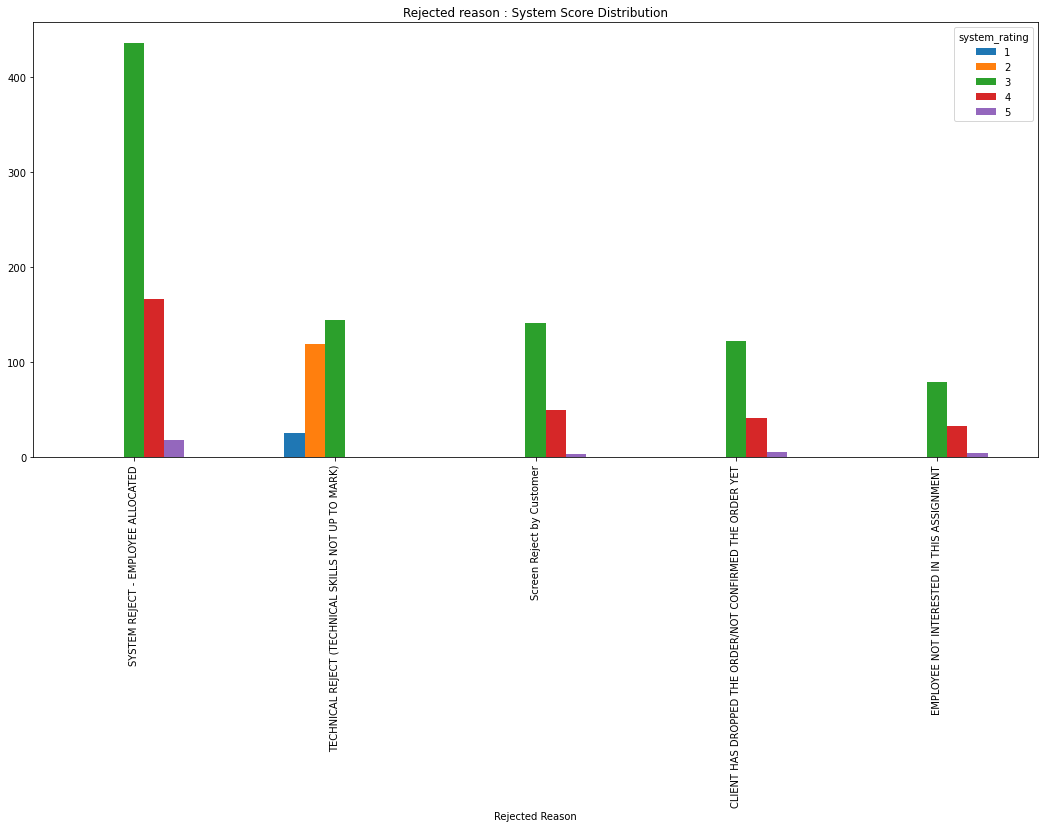

In [938]:
#next table
#valid+similar,rejected reason vs score

x=df_final[df_final["valid_transcation"]==True]
x2=x[x["is_similar"]=="Yes"]

df = pd.pivot_table(x2, index =["Rejected Reason"],columns=["system_rating"],aggfunc ="size",fill_value=0)



df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
df4c=df.reindex(rrlist)
df4c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Rejected reason : System Score Distribution")
plt.savefig("americanpic2d.png",bbox_inches = 'tight')

df4c['Total'] = df4c.sum(axis=1)
df4c.loc["Total"] = df4c.sum()
df4c.loc["% of Total Valid Rejections(with reason)"]=(df4c.loc["Total"]/df1c["Rejections (with reason)"][2])*100


df4c=df4c.round(1)
df4c.loc['% of Total Valid Rejections(with reason)'] = df4c.loc['% of Total Valid Rejections(with reason)'].astype(str) + '%'
df4c.reset_index(inplace=True)

df4c_string="Valid & similar"
df4c.name='Rejected Reason : System Score Distribution'
worksheet3.write(bottom_border+2+8, 1, df4c_string,cell_format2)
worksheet3.write_string(bottom_border+4+8, 2, df4c.name,cell_format)
worksheet3.write(bottom_border+2+8,2 , "",cell_format2)
worksheet3.write(bottom_border+2+8,0 , "",cell_format2)

start_row=bottom_border+6+8
bottom_border=start_row+df4c.shape[0]-1
top_right=2+df4c.shape[1]-1 

df4c=df4c.round(1)
df4c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5, 'americanpic2d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.set_row(bottom_border-1,15,cell_format3)

worksheet3.write(bottom_border-1, 2,"Total",new_format2)
worksheet3.write(bottom_border, 2,"% of Total Valid Rejections(with reason)",new_format2)

df4c

,Rejected Reason,1,2,3,4,5,Total
0,SYSTEM REJECT - EMPLOYEE ALLOCATED,31,216,0,0,0,247
1,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,0,0,0,47,3,50
2,Screen Reject by Customer,11,69,0,0,0,80
3,CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE...,7,69,0,0,0,76
4,EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT,5,36,0,0,0,41
5,Total,54,390,0,47,3,494
6,% of Total Valid Rejections(with reason),2.6%,18.6%,0.0%,2.2%,0.1%,23.5%


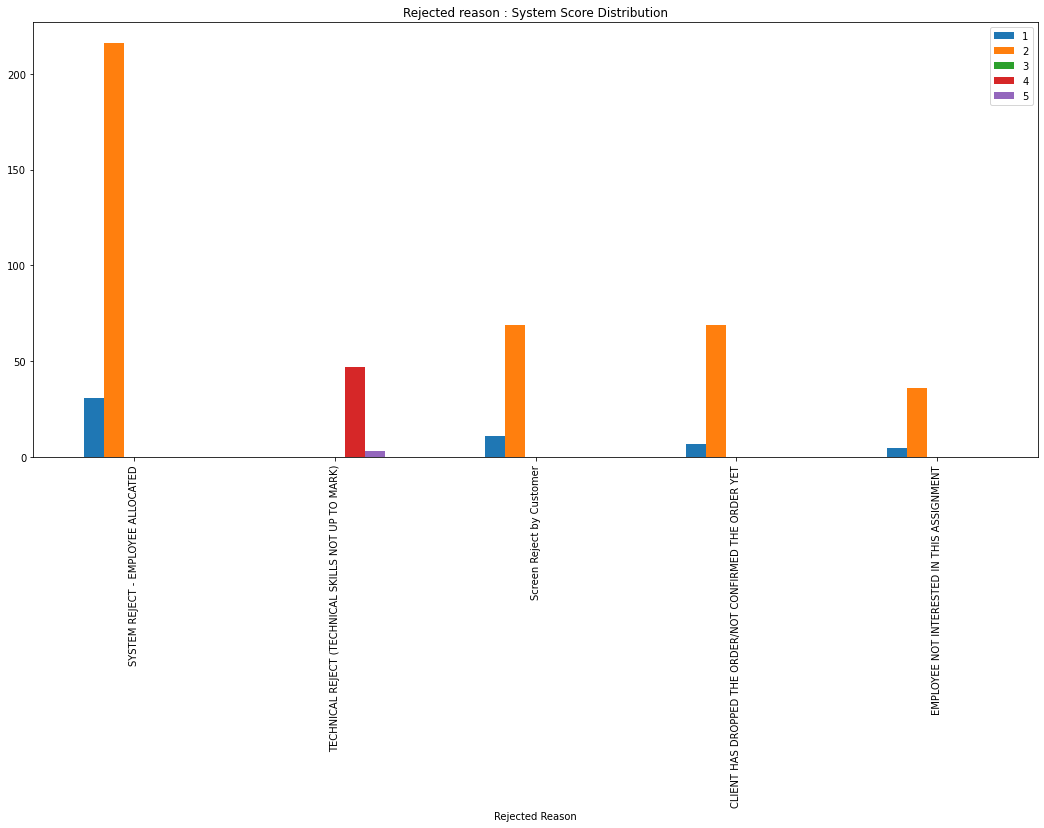

In [939]:
#next table
#valid+non-similar,rejected reason vs score

x=df_final[df_final["valid_transcation"]==True]
x2=x[x["is_similar"]=="No"]

df = pd.pivot_table(x2, index =["Rejected Reason"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df.drop(index=df.index[0], 
        axis=0, 
        inplace=True)
df5c=df.reindex(rrlist)

set1={1,2,3,4,5}
set2=set(df5c.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df5c.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df5c=dfx[cols]

df5c=df5c.fillna(0)

df5c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Rejected reason : System Score Distribution")
plt.savefig("americanpic3d.png",bbox_inches = 'tight')

df5c['Total'] = df5c.sum(axis=1)
df5c.loc["Total"] = df5c.sum()
df5c.loc["% of Total Valid Rejections(with reason)"]=(df5c.loc["Total"]/df1c["Rejections (with reason)"][2])*100

df5c=df5c.round(1)
df5c.loc['% of Total Valid Rejections(with reason)'] = df5c.loc['% of Total Valid Rejections(with reason)'].astype(str) + '%'

df5c.reset_index(inplace=True)
df5c_string="Valid & non-similar"
df5c.name='Rejected reason : System Score Distribution'

worksheet3.write(bottom_border+2+8, 1, df5c_string,cell_format2)
worksheet3.write_string(bottom_border+4+8, 2, df5c.name,cell_format)
worksheet3.write(bottom_border+2+8, 2, "",cell_format2)
worksheet3.write(bottom_border+2+8, 0, "",cell_format2)


start_row=bottom_border+6+8
bottom_border=start_row+df5c.shape[0]-1
top_right=2+df5c.shape[1]-1 

df5c=df5c.round(1)

df5c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5, 'americanpic3d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.set_row(bottom_border-1,15,cell_format3)

worksheet3.write(bottom_border-1, 2,"Total",new_format2)
worksheet3.write(bottom_border, 2,"% of Total Valid Rejections(with reason)",new_format2)

df5c

In [940]:
#System Score : Similarity Analysis for TECHNICAL REJECT

x=df_final[df_final["valid_transcation"]==True]
x1=x[x["Rejected Reason"]=="TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)"]
df6c = pd.pivot_table(x1, index =["system_rating"],columns=["is_similar"],aggfunc ="size",fill_value=0)
df6c['Total'] = df6c.sum(axis=1)
df6c.loc["Total1"] = df6c.sum()
df6c["Similar as % of total valid similar tech reject"]=(df6c["Yes"]/df6c["Yes"]["Total1"])*100
df6c["Non-siimilar as % of total valid non-similar tech reject"]=(df6c["No"]/df6c["No"]["Total1"])*100
df6c=df6c.rename(columns={"No":"Non-similar","Yes":"similar"})

df6c=df6c.round(1)
df6c['Similar as % of total valid similar tech reject'] = df6c['Similar as % of total valid similar tech reject'].astype(str) + '%'
df6c['Non-siimilar as % of total valid non-similar tech reject'] = df6c['Non-siimilar as % of total valid non-similar tech reject'].astype(str) + '%'

df6c.reset_index(inplace=True)
df6c_string="TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)"
df6c.name="System Score : Similarity Analysis"
worksheet3.write_string(bottom_border+2+10, 2, df6c_string,cell_format1)
worksheet3.write_string(bottom_border+4+10, 2, df6c.name,cell_format)

worksheet3.set_row(bottom_border+2+10,26,title_format)

start_row=bottom_border+6+10
bottom_border=start_row+df6c.shape[0]-1
top_right=2+df6c.shape[1]-1 

df6c.rename(columns={"system_rating":"System Rating"},inplace=True)

df6c=df6c.round(1)
df6c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.set_row(bottom_border,15,cell_format3)

worksheet3.write(bottom_border, 2,"Total",new_format2)


  
#worksheet3.set_row(0,20,title_format)
df6c

is_similar,System Rating,Non-similar,similar,Total,Similar as % of total valid similar tech reject,Non-siimilar as % of total valid non-similar tech reject
0,1,0,25,25,8.7%,0.0%
1,2,0,119,119,41.3%,0.0%
2,3,0,144,144,50.0%,0.0%
3,4,47,0,47,0.0%,94.0%
4,5,3,0,3,0.0%,6.0%
5,Total1,50,288,338,100.0%,100.0%


In [941]:
#next table
#Top 10 skills for valid transaction for TECHNICAL REJECT


x=df_final[df_final["Rejected Reason"]=="TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)"]
x["count"]=1
df = pd.pivot_table(x, index =["Essential Skills"],columns=["count"],aggfunc ="size",fill_value=0)
x1=x[x["valid_transcation"]==True]
df1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)

merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["valid as a % of total for skill"]=(merged_df["True_y"]/merged_df["1_x"])*100

x2=x[x["valid_transcation"]==False]
df2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True,how="left")
merged_df1["invalid as a % of total for skill"]=(merged_df1[False]/merged_df1["1_x"])*100

x3=x1[x1["is_similar"]=="Yes"]
df3 = pd.pivot_table(x3, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True,how="left")
merged_df2["valid + Similar as % of valid for skill"]=(merged_df2["Yes"]/merged_df2["True_y"])*100

x4=x1[x1["is_similar"]=="No"]
df4 = pd.pivot_table(x4, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df4, left_index=True, right_index=True,how="left")
merged_df3

merged_df3["valid+Non-similar as % of valid for skill"]=(merged_df3["No"]/merged_df3["True_y"])*100
merged_df3["Valid Trans for Skill as % of Total Valid"]=(merged_df3["True_y"]/no_of_valid)*100

merged_df3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"invalid",'No': 'valid+Non-similar','1_x': "transactions"},inplace=True)


merged_df3=merged_df3.sort_values(by="Valid",ascending=False)

merged_df3=merged_df3.fillna(0)
df7c=merged_df3.head(10)
eslist=df7c.index.values.tolist()

df7c.loc["Total"] = df7c.sum()

df7c["valid as a % of total for skill"]["Total"]=(df7c["Valid"]["Total"]/df7c["transactions"]["Total"])*100
df7c["invalid as a % of total for skill"]["Total"]=(df7c["invalid"]["Total"]/df7c["transactions"]["Total"])*100
df7c["valid + Similar as % of valid for skill"]["Total"]=(df7c["valid+similar"]["Total"]/df7c["Valid"]["Total"])*100
df7c["valid+Non-similar as % of valid for skill"]["Total"]=(df7c["valid+Non-similar"]["Total"]/df7c["Valid"]["Total"])*100

df7c=df7c.round(1)
df7c['valid as a % of total for skill'] = df7c['valid as a % of total for skill'].astype(str) + '%'
df7c['invalid as a % of total for skill'] = df7c['invalid as a % of total for skill'].astype(str) + '%'
df7c['valid + Similar as % of valid for skill'] = df7c['valid + Similar as % of valid for skill'].astype(str) + '%'
df7c['valid+Non-similar as % of valid for skill'] = df7c['valid+Non-similar as % of valid for skill'].astype(str) + '%'
df7c['Valid Trans for Skill as % of Total Valid'] = df7c['Valid Trans for Skill as % of Total Valid'].astype(str) + '%'

df7c.reset_index(inplace=True)

df7c.name="Top 10 skills for valid transaction"
worksheet3.write_string(bottom_border+4, 2, df7c.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df7c.shape[0]-1
top_right=2+df7c.shape[1]-1 


df7c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df7c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.write(bottom_border, 2,"Total",new_format2)

df7c


<ipython-input-941-30ced6ca4170>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Essential Skills,transactions,Valid,valid as a % of total for skill,invalid,invalid as a % of total for skill,valid+similar,valid + Similar as % of valid for skill,valid+Non-similar,valid+Non-similar as % of valid for skill,Valid Trans for Skill as % of Total Valid
0,Selenium,52.0,33.0,63.5%,19.0,36.5%,22.0,66.7%,11.0,33.3%,0.9%
1,.NET,46.0,21.0,45.7%,25.0,54.3%,12.0,57.1%,9.0,42.9%,0.5%
2,ETRM - Energy Trading and Risk Management,26.0,19.0,73.1%,7.0,26.9%,19.0,100.0%,0.0,0.0%,0.5%
3,Application Testing,44.0,18.0,40.9%,26.0,59.1%,14.0,77.8%,4.0,22.2%,0.5%
4,Java-J2EE,31.0,18.0,58.1%,13.0,41.9%,14.0,77.8%,4.0,22.2%,0.5%
5,Core Java,19.0,10.0,52.6%,9.0,47.4%,9.0,90.0%,1.0,10.0%,0.3%
6,React JS,14.0,9.0,64.3%,5.0,35.7%,8.0,88.9%,1.0,11.1%,0.2%
7,Spring Boot,18.0,8.0,44.4%,10.0,55.6%,8.0,100.0%,0.0,0.0%,0.2%
8,C# - CSharp-Programming,16.0,8.0,50.0%,8.0,50.0%,6.0,75.0%,2.0,25.0%,0.2%
9,Tableau,7.0,6.0,85.7%,1.0,14.3%,6.0,100.0%,0.0,0.0%,0.2%


system_rating,Essential Skills,1,2,3,4,5,Total
0,Selenium,2,6,14,9,2,33
1,.NET,0,2,10,9,0,21
2,ETRM - Energy Trading and Risk Management,4,14,1,0,0,19
3,Application Testing,0,3,11,4,0,18
4,Java-J2EE,0,4,10,4,0,18
5,Core Java,1,3,5,1,0,10
6,React JS,0,1,7,1,0,9
7,Spring Boot,0,2,6,0,0,8
8,C# - CSharp-Programming,0,3,3,2,0,8
9,Tableau,2,4,0,0,0,6


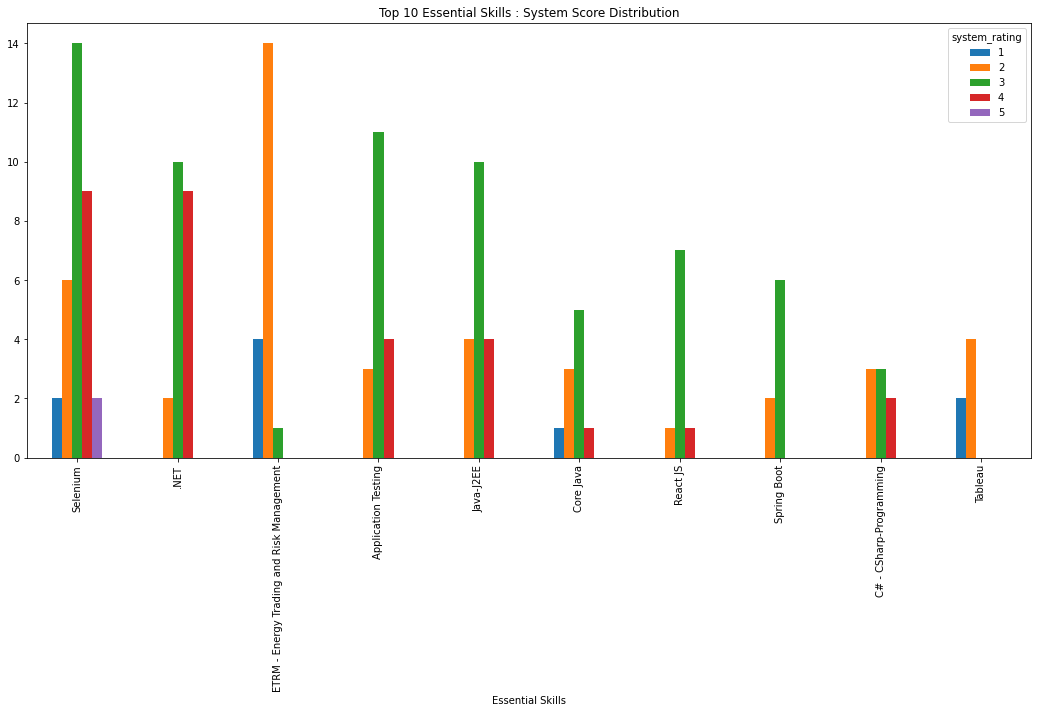

In [942]:
#next table
#valid, Top 10 Essential Skills : System Score Distribution FOR TECHNICAL REJECT

x1=x[x["valid_transcation"]==True]
# x was created in the previous table 

df = pd.pivot_table(x1, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df8c=df.reindex(eslist)
df8c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic4d.png",bbox_inches = 'tight')

df8c['Total'] = df8c.sum(axis=1)
df8c.loc["Total"] = df8c.sum()
df8c.loc["As % of Total Valid Technical Rejects"]=(df8c.loc["Total"]/df6c["Total"][5])*100

df8c=df8c.round(1)
df8c.loc['As % of Total Valid Technical Rejects'] = df8c.loc['As % of Total Valid Technical Rejects'].astype(str) + '%'

df8c.reset_index(inplace=True)
df8c_string="Valid"
df8c.name="Top 10 Essential Skills : System Score Distribution"
worksheet3.write(bottom_border+2, 1, df8c_string,cell_format2)
worksheet3.write_string(bottom_border+4, 2, df8c.name,cell_format)
worksheet3.write(bottom_border+2, 2,"",cell_format2)
worksheet3.write(bottom_border+2, 0,"",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df8c.shape[0]-1
top_right=2+df8c.shape[1]-1 

df8c=df8c.round(1)
df8c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df8c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5, 'americanpic4d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.set_row(bottom_border-1,15,cell_format3)

worksheet3.write(bottom_border-1, 2,"Total",new_format2)
worksheet3.write(bottom_border, 2,"As % of Total Valid Technical Rejects",new_format2)

df8c

system_rating,Essential Skills,1,2,3,Total
0,Selenium,2,6,14,22
1,.NET,0,2,10,12
2,ETRM - Energy Trading and Risk Management,4,14,1,19
3,Application Testing,0,3,11,14
4,Java-J2EE,0,4,10,14
5,Core Java,1,3,5,9
6,React JS,0,1,7,8
7,Spring Boot,0,2,6,8
8,C# - CSharp-Programming,0,3,3,6
9,Tableau,2,4,0,6


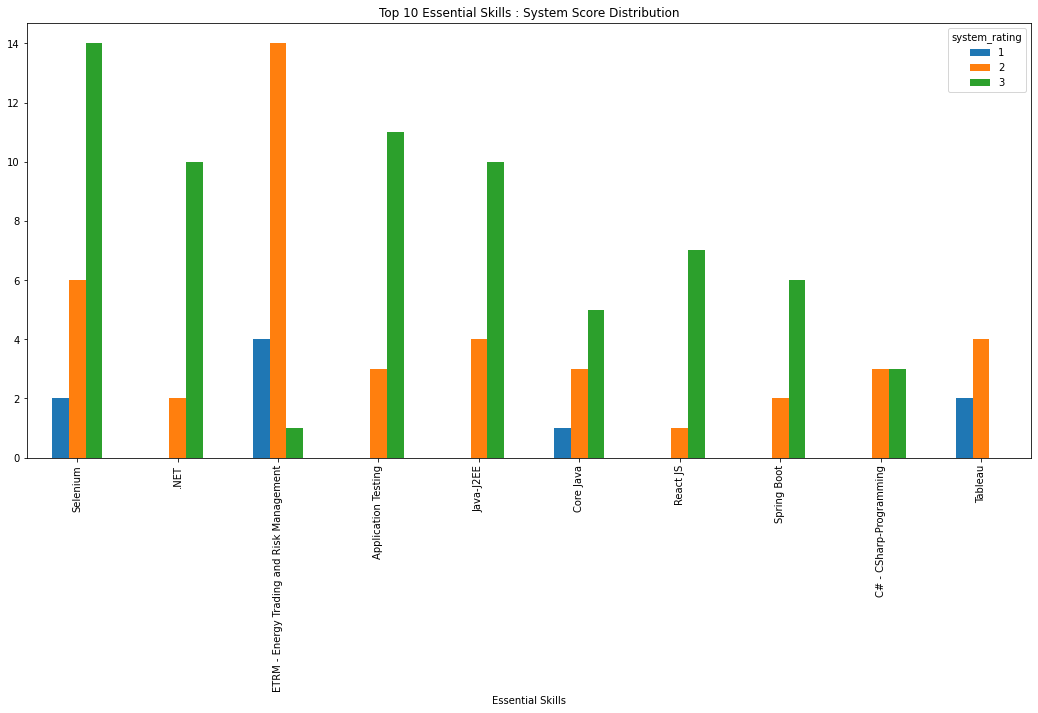

In [943]:
#valid+similar, Top 10 Essential Skills : System Score Distribution FOR TECHNICAL REJECT

x1=x[x["valid_transcation"]==True]
x2=x1[x1["is_similar"]=="Yes"]
df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)

df9c=df.reindex(eslist)

df9c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic5d.png",bbox_inches = 'tight')

df9c['Total'] = df9c.sum(axis=1)
df9c.loc["Total"] = df9c.sum()
df9c.loc["As % of Total Valid Technical Rejects"]=(df9c.loc["Total"]/df6c["Total"][5])*100

df9c=df9c.round(1)
df9c.loc['As % of Total Valid Technical Rejects'] = df9c.loc['As % of Total Valid Technical Rejects'].astype(str) + '%'

df9c.reset_index(inplace=True)
df9c_string="Valid and similar"
df9c.name="Top 10 Essential Skills : System Score Distribution"
worksheet3.write(bottom_border+2+6, 1, df9c_string,cell_format2)
worksheet3.write_string(bottom_border+4+6, 2, df9c.name,cell_format)
worksheet3.write(bottom_border+2+6, 2, "",cell_format2)
worksheet3.write(bottom_border+2+6, 0, "",cell_format2)

start_row=bottom_border+6+6
bottom_border=start_row+df9c.shape[0]-1
top_right=2+df9c.shape[1]-1 

df9c=df9c.round(1)
df9c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df9c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5+2, 'americanpic5d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.set_row(bottom_border-1,15,cell_format3)

worksheet3.write(bottom_border-1, 2,"Total",new_format2)
worksheet3.write(bottom_border, 2,"As % of Total Valid Technical Rejects",new_format2)

df9c

,Essential Skills,1,2,3,4,5,Total
0,Selenium,0,0,0,9,2,11
1,.NET,0,0,0,9,0,9
2,ETRM - Energy Trading and Risk Management,0,0,0,0,0,0
3,Application Testing,0,0,0,4,0,4
4,Java-J2EE,0,0,0,4,0,4
5,Core Java,0,0,0,1,0,1
6,React JS,0,0,0,1,0,1
7,Spring Boot,0,0,0,0,0,0
8,C# - CSharp-Programming,0,0,0,2,0,2
9,Tableau,0,0,0,0,0,0


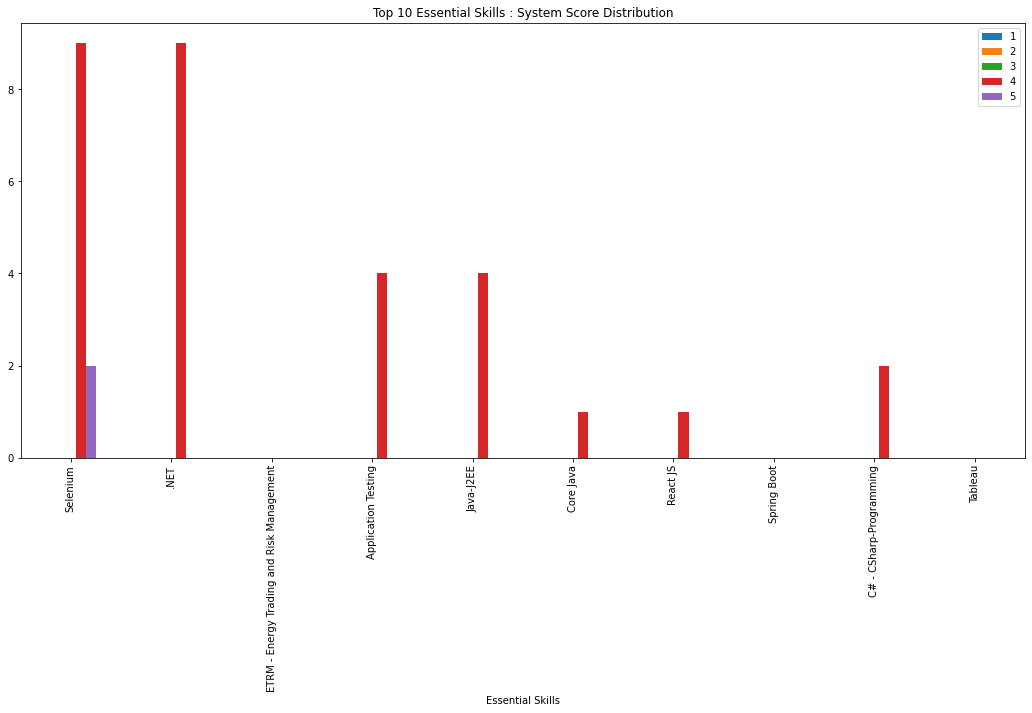

In [944]:
#valid+non similar,Top 10 Essential Skills : System Score Distribution FOR TECHNICAL REJECT

x1=x[x["valid_transcation"]==True]
x2=x1[x1["is_similar"]=="No"]
df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)


df10c=df.reindex(eslist)

set1={1,2,3,4,5}
set2=set(df10c.columns.values)
xx=set2.symmetric_difference(set1)
x1=list(xx)

df = pd.DataFrame(columns=x1)
dfx=df10c.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df10c=dfx[cols]

df10c=df10c.fillna(0)
df10c.plot.bar(stacked=False,figsize=(18,8))
plt.title("Top 10 Essential Skills : System Score Distribution")
plt.savefig("americanpic6d.png",bbox_inches = 'tight')

df10c['Total'] = df10c.sum(axis=1)
df10c.loc["Total"] = df10c.sum()
df10c.loc["As % of Total Valid Technical Rejects"]=(df10c.loc["Total"]/df6c["Total"][5])*100

df10c=df10c.round(1)
df10c.loc['As % of Total Valid Technical Rejects'] = df10c.loc['As % of Total Valid Technical Rejects'].astype(str) + '%'

df10c.reset_index(inplace=True)
df10c_string="Valid and Non-similar"
df10c.name="Top 10 Essential Skills : System Score Distribution"
worksheet3.write(bottom_border+2+6, 1, df10c_string,cell_format2)
worksheet3.write_string(bottom_border+4+6, 2, df10c.name,cell_format)
worksheet3.write(bottom_border+2+6, 2, "",cell_format2)
worksheet3.write(bottom_border+2+6, 0, "",cell_format2)

start_row=bottom_border+6+6
bottom_border=start_row+df10c.shape[0]-1
top_right=2+df10c.shape[1]-1 

df10c=df10c.round(1)
df10c.to_excel(writer,sheet_name='Rejection Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet3.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df10c.columns.values):
    worksheet3.write(start_row-1, 2+col_num, value, header_format)
worksheet3.insert_image(start_row-1,top_right+5, 'americanpic6d.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet3.set_row(bottom_border,15,cell_format3)
worksheet3.set_row(bottom_border-1,15,cell_format3)

worksheet3.write(bottom_border-1, 2,"Total",new_format2)
worksheet3.write(bottom_border, 2,"As % of Total Valid Technical Rejects",new_format2)

df10c

In [945]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO'],
      dtype='object')

In [946]:
# REJECTED -PROPOSED DATE DIFFERENCE ANALYSIS


df_final["proposal_date"]=df_final["proposal_date"].apply(lambda x: pd.to_datetime(x))






In [947]:
rej_df=df_final[df_final["rejection_flag"]=="rejected"]
rej_df["rejection_date"]=rej_df["rejection_date"].apply(lambda x: pd.to_datetime(x))

<ipython-input-947-678907cf48bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rej_df["rejection_date"]=rej_df["rejection_date"].apply(lambda x: pd.to_datetime(x))


In [948]:
import statistics

rej_df["days_diff"]=rej_df["rejection_date"]-rej_df["proposal_date"]
rej_df['days_diff'] = pd.to_numeric(rej_df['days_diff'].dt.days, downcast='integer')
mean=rej_df['days_diff'].mean()
mean=mean.round(1)
mean

<ipython-input-948-c8d16dc077c5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rej_df["days_diff"]=rej_df["rejection_date"]-rej_df["proposal_date"]
<ipython-input-948-c8d16dc077c5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rej_df['days_diff'] = pd.to_numeric(rej_df['days_diff'].dt.days, downcast='integer')


12.0

In [949]:
grp = rej_df.groupby('Rejected Reason')["days_diff"].mean().reset_index()
grp=grp.round(0)
grp.rename(columns={"days_diff":"Mean difference of days"},inplace=True)

grp=grp.set_index('Rejected Reason')
grp=grp.sort_values(by='Mean difference of days',ascending=False)

df=rej_df["Rejected Reason"].value_counts().to_frame()

dfa = grp.merge(df, left_index=True, right_index=True,how="left")
dfa


,Mean difference of days,Rejected Reason
Rejected Reason,,
SYSTEM REJECT- CURRENT ASSIGNMENT EXTENSION,25.0,199
Communication Reject by Customer,21.0,10
SYSTEM REJECT - EMPLOYEE ALLOCATED,14.0,1632
SYSTEM REJECTED - INDENT FULFILLED,11.0,10
EMPLOYEE IS NOT REACHABLE / NOT RESPONDING TO EMAIL,10.0,138
NON-AVAILABILITY OF VISA,10.0,49
TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK),10.0,637
Tech Reject by Customer,10.0,17
CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE ORDER YET,9.0,524


In [950]:
#allocation analysis

In [951]:
df_final["transactions"]="transactions"
df_final["count"]=1
df = pd.pivot_table(df_final, index =["transactions"],columns=["count"],aggfunc ="size",fill_value=0)
x1=df_final[df_final["valid_transcation"]==True]
df1 = pd.pivot_table(x1, index =["transactions"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["valid as a % of total"]=(merged_df["True_y"]/merged_df["1_x"])*100
merged_df

x2=df_final[df_final["valid_transcation"]==False]
df2 = pd.pivot_table(x2, index =["transactions"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df1["invalid as a % of total"]=(merged_df1[False]/merged_df1["1_x"])*100

x3=x1[x1["is_similar"]=="Yes"]
df3 = pd.pivot_table(x3, index =["transactions"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True)
merged_df2["Valid + Similar as % of valid allocation"]=(merged_df2["Yes"]/merged_df2["True_y"])*100

x4=x1[x1["is_similar"]=="No"]
df4 = pd.pivot_table(x4, index =["transactions"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df4, left_index=True, right_index=True)
merged_df3

merged_df3["Valid + Non-similar as % of valid allocations"]=(merged_df3["No"]/merged_df3["True_y"])*100

merged_df3=merged_df3.round(1)
merged_df3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"invalid",'No': 'valid+Non-similar','1_x': "total_transactions"},inplace=True)
dfn1=merged_df3.copy()
dfn1

,total_transactions,Valid,valid as a % of total,invalid,invalid as a % of total,valid+similar,Valid + Similar as % of valid allocation,valid+Non-similar,Valid + Non-similar as % of valid allocations
transactions,,,,,,,,,
transactions,7673,3864,50.4,3809,49.6,2717,70.3,1147,29.7


In [952]:
#proposed

df_final["count"]=1
df = pd.pivot_table(df_final, index =["proposed_flag"],columns=["count"],aggfunc ="size",fill_value=0)
x1=df_final[df_final["valid_transcation"]==True]
df1 = pd.pivot_table(x1, index =["proposed_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["valid as a % of total"]=(merged_df["True_y"]/merged_df["1_x"])*100
merged_df

x2=df_final[df_final["valid_transcation"]==False]
df2 = pd.pivot_table(x2, index =["proposed_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df1["invalid as a % of total"]=(merged_df1[False]/merged_df1["1_x"])*100

x3=x1[x1["is_similar"]=="Yes"]
df3 = pd.pivot_table(x3, index =["proposed_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True)
merged_df2["Valid + Similar as % of valid allocation"]=(merged_df2["Yes"]/merged_df2["True_y"])*100

x4=x1[x1["is_similar"]=="No"]
df4 = pd.pivot_table(x4, index =["proposed_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df4, left_index=True, right_index=True)
merged_df3

merged_df3["Valid + Non-similar as % of valid allocations"]=(merged_df3["No"]/merged_df3["True_y"])*100

merged_df3=merged_df3.round(1)
merged_df3.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"invalid",'No': 'valid+Non-similar','1_x': "total_transactions"},inplace=True)
dfn2=merged_df3.copy()
dfn2

,total_transactions,Valid,valid as a % of total,invalid,invalid as a % of total,valid+similar,Valid + Similar as % of valid allocation,valid+Non-similar,Valid + Non-similar as % of valid allocations
proposed_flag,,,,,,,,,
proposed,7673,3864,50.4,3809,49.6,2717,70.3,1147,29.7


In [953]:
df1d=pd.concat([dfn1,dfn2])

DF1D=df1d.copy()

df1d.reset_index(inplace=True)
df1d.name="Proposed Transaction Analysis"
worksheet4.write_string(3, 2, df1d.name,cell_format)

start_row=5
bottom_border=start_row+df1d.shape[0]-1
top_right=2+df1d.shape[1]-1

df1d.round(1)
df1d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
df1d

,index,total_transactions,Valid,valid as a % of total,invalid,invalid as a % of total,valid+similar,Valid + Similar as % of valid allocation,valid+Non-similar,Valid + Non-similar as % of valid allocations
0,transactions,7673,3864,50.4,3809,49.6,2717,70.3,1147,29.7
1,proposed,7673,3864,50.4,3809,49.6,2717,70.3,1147,29.7


In [954]:
#df1d=df1d.round(1)
#df1d['valid as a % of total'] = df1d['valid as a % of total'].astype(str) + '%'
#df1d['invalid as a % of total'] = df1d['invalid as a % of total'].astype(str) + '%'
#df1d['Valid + Similar as % of valid allocation'] = df1d['Valid + Similar as % of valid allocation'].astype(str) + '%'
#df1d['Valid + Non-similar as % of valid allocations'] = df1d['Valid + Non-similar as % of valid allocations'].astype(str) + '%'

In [955]:
#Allocation Analysis


df_final["count"]=1
df = pd.pivot_table(df_final, index =["allocation_flag"],columns=["count"],aggfunc ="size",fill_value=0)
x1=df_final[df_final["valid_transcation"]==True]
df1 = pd.pivot_table(x1, index =["allocation_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["valid as a % of total"]=(merged_df["True_y"]/merged_df["1_x"])*100
merged_df

x2=df_final[df_final["valid_transcation"]==False]
df2 = pd.pivot_table(x2, index =["allocation_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df1["invalid as a % of total"]=(merged_df1[False]/merged_df1["1_x"])*100

x3=x1[x1["is_similar"]=="Yes"]
df3 = pd.pivot_table(x3, index =["allocation_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True)
merged_df2["Valid + Similar as % of valid allocation"]=(merged_df2["Yes"]/merged_df2["True_y"])*100

x4=x1[x1["is_similar"]=="No"]
df4 = pd.pivot_table(x4, index =["allocation_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
df2d = merged_df2.merge(df4, left_index=True, right_index=True)

df2d["Valid + Non-similar as % of valid allocations"]=(df2d["No"]/df2d["True_y"])*100


df2d.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"invalid",'No': 'valid+Non-similar','1_x': "total_transactions"},inplace=True)
df2d.loc["Proposal to Allocation Ratio"]=DF1D.loc["proposed"]/df2d.loc["allocated"]

df2d=df2d.round(1)
#df2d['valid as a % of total'] = df2d['valid as a % of total'].astype(str) + '%'
#df2d['invalid as a % of total'] = df2d['invalid as a % of total'].astype(str) + '%'
#df2d['Valid + Similar as % of valid allocation'] = df2d['Valid + Similar as % of valid allocation'].astype(str) + '%'
#df2d['Valid + Non-similar as % of valid allocations'] = df2d['Valid + Non-similar as % of valid allocations'].astype(str) + '%'

df2d["valid as a % of total"]["Proposal to Allocation Ratio"]="Na"
df2d["invalid as a % of total"]["Proposal to Allocation Ratio"]="Na"
df2d["Valid + Similar as % of valid allocation"]["Proposal to Allocation Ratio"]="Na"
df2d["Valid + Non-similar as % of valid allocations"]["Proposal to Allocation Ratio"]="Na"

df2d.reset_index(inplace=True)
df2d.name="Allocation Analysis"

worksheet4.write_string(bottom_border+4, 2, df2d.name,cell_format)
start_row=bottom_border+6
bottom_border=start_row+df2d.shape[0]-1
top_right=2+df2d.shape[1]-1   

df2d=df2d.round(1)
df2d.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
df2d['Allocation Flag'] = df2d['Allocation Flag'].replace(['not_allocated'],'not allocated')

df2d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)

df2d





<ipython-input-955-60d3fd58a540>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2d["invalid as a % of total"]["Proposal to Allocation Ratio"]="Na"
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-955-60d3fd58a540>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2d["Valid + Similar as % of valid allocat

,Allocation Flag,total_transactions,Valid,valid as a % of total,invalid,invalid as a % of total,valid+similar,Valid + Similar as % of valid allocation,valid+Non-similar,Valid + Non-similar as % of valid allocations
0,allocated,36.0,24.0,66.7,12.0,33.3,21.0,87.5,3.0,12.5
1,not allocated,7637.0,3840.0,50.3,3797.0,49.7,2696.0,70.2,1144.0,29.8
2,Proposal to Allocation Ratio,213.1,161.0,Na,317.4,Na,129.4,Na,382.3,Na


In [956]:
allocated=df2d["total_transactions"][0]

In [957]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO',
       'transactions', 'count'],
      dtype='object')

In [958]:
df_final["proposed_flag"].value_counts()

proposed    7673
Name: proposed_flag, dtype: int64

In [959]:
x1=df_final[df_final["valid_transcation"]==True]
x3=x1[x1["is_similar"]=="Yes"]
x3["allocation_flag"].value_counts()

not_allocated    2696
allocated          21
Name: allocation_flag, dtype: int64

In [960]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO',
       'transactions', 'count'],
      dtype='object')

In [961]:
#rejection
df_final["count"]=1
df = pd.pivot_table(df_final, index =["rejection_flag"],columns=["count"],aggfunc ="size",fill_value=0)
x1=df_final[df_final["valid_transcation"]==True]
df1 = pd.pivot_table(x1, index =["rejection_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["valid as a % of total"]=(merged_df["True_y"]/merged_df["1_x"])*100
merged_df

x2=df_final[df_final["valid_transcation"]==False]
df2 = pd.pivot_table(x2, index =["rejection_flag"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df1["invalid as a % of total"]=(merged_df1[False]/merged_df1["1_x"])*100

x3=x1[x1["is_similar"]=="Yes"]
df3 = pd.pivot_table(x3, index =["rejection_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True)
merged_df2["Valid + Similar as % of valid allocation"]=(merged_df2["Yes"]/merged_df2["True_y"])*100

x4=x1[x1["is_similar"]=="No"]
df4 = pd.pivot_table(x4, index =["rejection_flag"],columns=["is_similar"],aggfunc ="size",fill_value=0)
df3d = merged_df2.merge(df4, left_index=True, right_index=True)


df3d["Valid + Non-similar as % of valid allocations"]=(df3d["No"]/df3d["True_y"])*100


df3d.rename(columns={'Yes': 'valid+similar',"True_y":"Valid",False:"invalid",'No': 'valid+Non-similar','1_x': "total"},inplace=True)

df3d=df3d.round(1)
df3d['valid as a % of total'] = df3d['valid as a % of total'].astype(str) + '%'
df3d['invalid as a % of total'] = df3d['invalid as a % of total'].astype(str) + '%'
df3d['Valid + Similar as % of valid allocation'] = df3d['Valid + Similar as % of valid allocation'].astype(str) + '%'
df3d['Valid + Non-similar as % of valid allocations'] = df3d['Valid + Non-similar as % of valid allocations'].astype(str) + '%'

df3d.reset_index(inplace=True)
df3d.name="Rejection Analysis"

worksheet4.write_string(bottom_border+4, 2, df3d.name,cell_format)
start_row=bottom_border+6
bottom_border=start_row+df3d.shape[0]-1
top_right=2+df3d.shape[1]-1   

df3d=df3d.round(1)
df3d.rename(columns={"rejection_flag":"Rejection Flag"},inplace=True)
df3d['Rejection Flag'] = df3d['Rejection Flag'].replace(['not_rejected'],'not rejected')

df3d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
df3d

,Rejection Flag,total,Valid,valid as a % of total,invalid,invalid as a % of total,valid+similar,Valid + Similar as % of valid allocation,valid+Non-similar,Valid + Non-similar as % of valid allocations
0,not rejected,3570,1765,49.4%,1805,50.6%,1201,68.0%,564,32.0%
1,rejected,4103,2099,51.2%,2004,48.8%,1516,72.2%,583,27.8%


system_rating,Allocation Flag,1,2,3,4,5,Total
0,allocated,0,3,15,5,1,24
1,not allocated,194,1044,1817,699,86,3840
2,Total,194,1047,1832,704,87,3864
3,Allocated as % of total valid allocations for ...,0.0%,12.5%,62.5%,20.8%,4.2%,100.0%


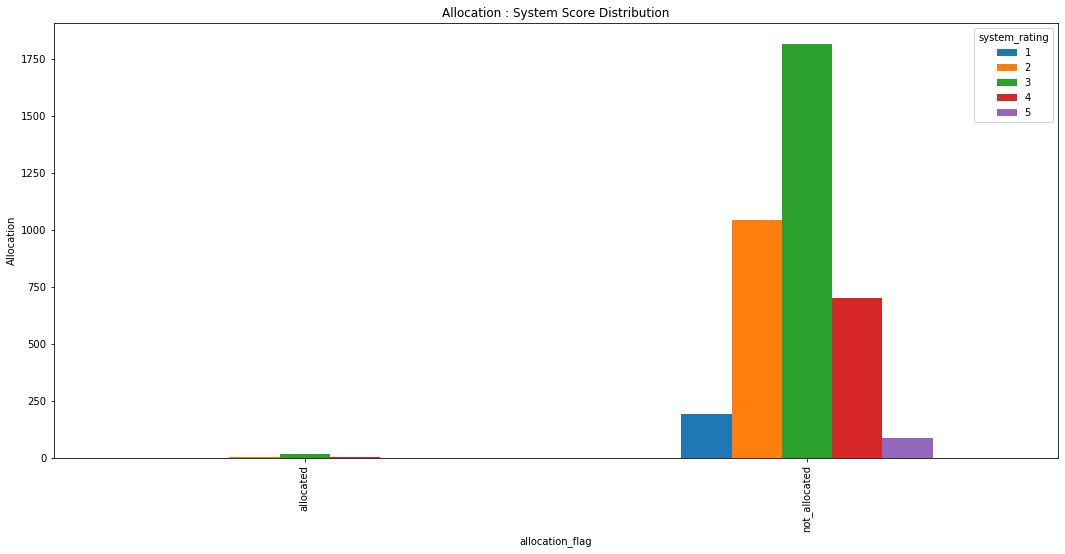

In [962]:
# Valid,allocation vs score
x1=df_final[df_final["valid_transcation"]==True]

df3dd = pd.pivot_table(x1, index =["allocation_flag"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df3dd.plot.bar(stacked=False,figsize=(18,8))
plt.title("Allocation : System Score Distribution")
plt.ylabel("Allocation")
plt.savefig("americanpic1e.png")

df3dd.loc["Total"] = df3dd.sum()
df3dd["Total"] = df3dd.sum(axis=1)
df3dd.loc["Allocated as % of total valid allocations for score"]=(df3dd.loc["allocated"]/df2d["Valid"][0])*100

df3dd=df3dd.round(1)
df3dd.loc['Allocated as % of total valid allocations for score'] = df3dd.loc['Allocated as % of total valid allocations for score'].astype(str) + '%'

df3dd.reset_index(inplace=True)
df3dd_string="Valid"
df3dd.name="Allocation : System Score Distribution"
worksheet4.write(bottom_border+2, 1, df3dd_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df3dd.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df3dd.shape[0]-1
top_right=2+df3dd.shape[1]-1  

df3dd=df3dd.round(1)
df3dd.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
df3dd['Allocation Flag'] = df3dd['Allocation Flag'].replace(['not_allocated'],'not allocated')

df3dd.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3dd.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.insert_image(start_row-3,top_right+5, 'americanpic1e.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.set_row(bottom_border-1,15,cell_format3)

worksheet4.write(bottom_border-1, 2,"Total",new_format2)
worksheet4.write(bottom_border, 2,"Allocated as % of total valid allocations for score",new_format2)

df3dd



system_rating,Allocation Flag,1,2,3,4,5,Total
0,allocated,0,0,15,5,1,21
1,not allocated,25,119,1817,652,83,2696
2,Total,25,119,1832,657,84,2717
3,allocated as % of total valid allocations for ...,0.0%,0.0%,62.5%,20.8%,4.2%,87.5%


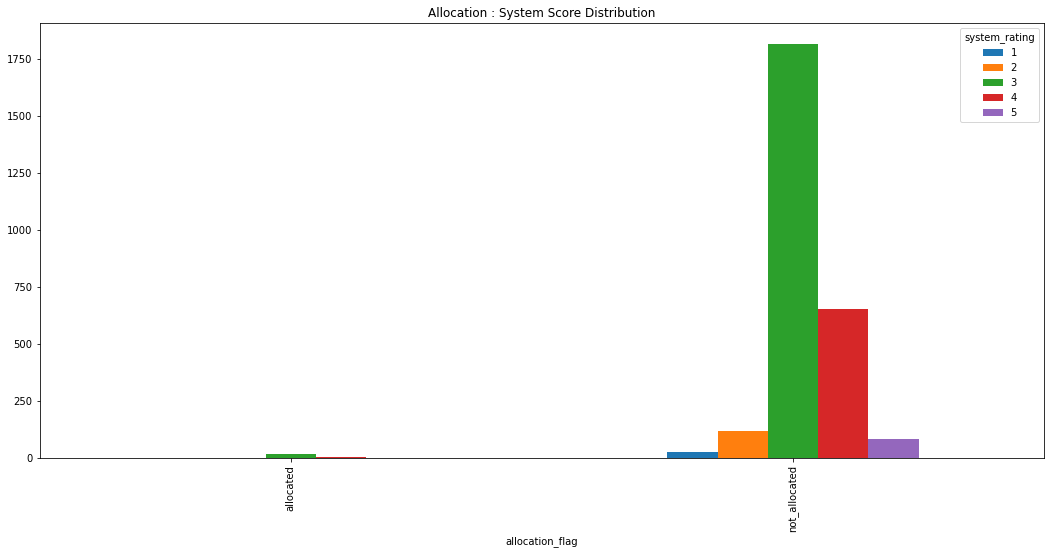

In [963]:
#next table
#valid+similar,allocation vs score

x1=df_final[df_final["valid_transcation"]==True]
x3=x1[x1["is_similar"]=="Yes"]
df4d = pd.pivot_table(x3, index =["allocation_flag"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df4d.plot.bar(stacked=False,figsize=(18,8))
plt.title("Allocation : System Score Distribution")
plt.savefig("americanpic2e.png")

df4d.loc["Total"] = df4d.sum()
df4d["Total"] = df4d.sum(axis=1)
df4d.loc["allocated as % of total valid allocations for score"]=(df4d.loc["allocated"]/df2d["Valid"][0])*100


df4d=df4d.round(1)
df4d.loc['allocated as % of total valid allocations for score'] = df4d.loc['allocated as % of total valid allocations for score'].astype(str) + '%'


df4d.reset_index(inplace=True)
df4d_string="Valid & Similar"
df4d.name="Allocation : System Score Distribution"

worksheet4.write(bottom_border+2+12, 1, df4d_string,cell_format2)
worksheet4.write_string(bottom_border+4+14, 2, df4d.name,cell_format)
worksheet4.write(bottom_border+2+12, 2, "",cell_format2)
worksheet4.write(bottom_border+2+12, 0, "",cell_format2)


start_row=bottom_border+6+12
bottom_border=start_row+df4d.shape[0]-1
top_right=2+df4d.shape[1]-1  

df4d=df4d.round(1)
df4d.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
df4d['Allocation Flag'] = df4d['Allocation Flag'].replace(['not_allocated'],'not allocated')

df4d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.insert_image(start_row-3,top_right+5, 'americanpic2e.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.set_row(bottom_border-1,15,cell_format3)

worksheet4.write(bottom_border-1, 2,"Total",new_format2)
worksheet4.write(bottom_border, 2,"Allocated as % of total valid allocations for score",new_format2)

df4d

,Allocation Flag,1,2,3,4,5,Total
0,allocated,0,3,0,0,0,3
1,not allocated,169,925,0,47,3,1144
2,Total,169,928,0,47,3,1147
3,allocated as % of total valid allocations for ...,0.0%,12.5%,0.0%,0.0%,0.0%,12.5%


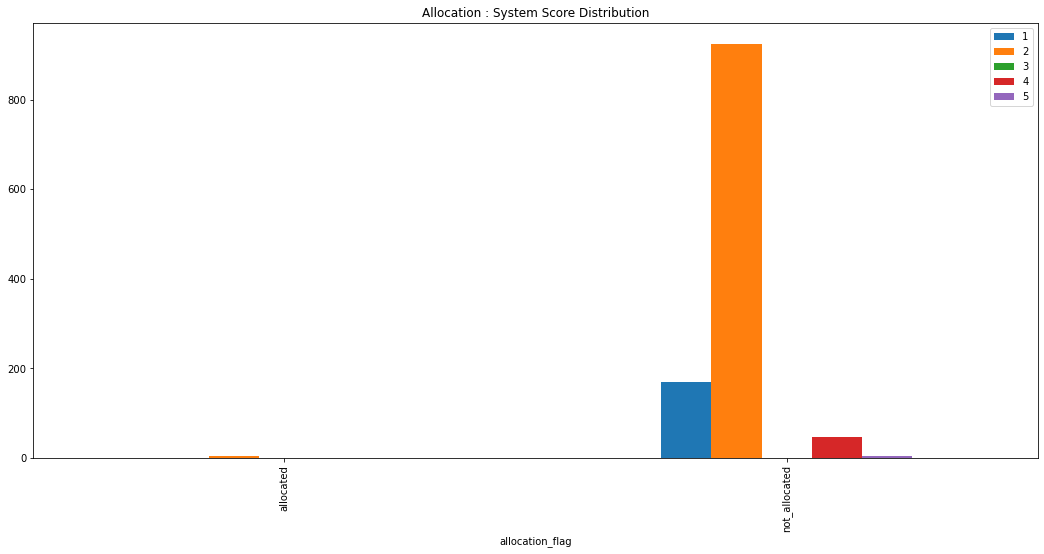

In [964]:
#next table
#valid+non-similar,allocation vs score

x1=df_final[df_final["valid_transcation"]==True]
x3=x1[x1["is_similar"]=="No"]
df5d = pd.pivot_table(x3, index =["allocation_flag"],columns=["system_rating"],aggfunc ="size",fill_value=0)

set1={1,2,3,4,5}
set2=set(df5d.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df5d.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df5d=dfx[cols]

df5d=df5d.fillna(0)

df5d.plot.bar(stacked=False,figsize=(18,8))
plt.title("Allocation : System Score Distribution")
plt.savefig("americanpic3e.png")

df5d.loc["Total"] = df5d.sum()
df5d["Total"] = df5d.sum(axis=1)
df5d.loc["allocated as % of total valid allocations for score"]=(df5d.loc["allocated"]/df2d["Valid"][0])*100

df5d=df5d.round(1)
df5d.loc['allocated as % of total valid allocations for score'] = df5d.loc['allocated as % of total valid allocations for score'].astype(str) + '%'


df5d.reset_index(inplace=True)
df5d_string="Valid & Non-similar"
df5d.name="Allocation : System Score Distribution"
worksheet4.write(bottom_border+2+12, 1, df5d_string,cell_format2)
worksheet4.write_string(bottom_border+2+12, 2, df5d.name,cell_format)
worksheet4.write(bottom_border+2+12, 2, "",cell_format2)
worksheet4.write(bottom_border+2+12, 0, "",cell_format2)



start_row=bottom_border+6+12
bottom_border=start_row+df5d.shape[0]-1
top_right=2+df5d.shape[1]-1  

df5d=df5d.round(1)
df5d.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
df5d['Allocation Flag'] = df5d['Allocation Flag'].replace(['not_allocated'],'not allocated')

df5d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.insert_image(start_row-3,top_right+5, 'americanpic3e.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.set_row(bottom_border-1,15,cell_format3)

worksheet4.write(bottom_border-1, 2,"Total",new_format2)
worksheet4.write(bottom_border, 2,"Allocated as % of total valid allocations for score",new_format2)

df5d

In [965]:
df_final["Rejected Reason"].value_counts()

                                                               3570
SYSTEM REJECT - EMPLOYEE ALLOCATED                             1632
TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)              637
CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE ORDER YET        524
Screen Reject by Customer                                       500
EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT                      344
SYSTEM REJECT- CURRENT ASSIGNMENT EXTENSION                     199
EMPLOYEE IS NOT REACHABLE / NOT RESPONDING TO EMAIL             138
NON-AVAILABILITY OF VISA                                         49
EMPLOYEE GOING ON/ALREADY ON MATERNITY/LOP/SABBATICAL LEAVE      37
Tech Reject by Customer                                          17
Communication Reject by Customer                                 10
SYSTEM REJECTED - INDENT FULFILLED                               10
EMPLOYEE IS NOT RESPONDING TO CLIENT INTERVIEW SCHEDULE           6
Name: Rejected Reason, dtype: int64

In [966]:
x1=df_final[df_final["valid_transcation"]==True]
x1["Rejected Reason"].value_counts()

                                                               1765
SYSTEM REJECT - EMPLOYEE ALLOCATED                              868
TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO MARK)              338
Screen Reject by Customer                                       274
CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE ORDER YET        244
EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT                      157
SYSTEM REJECT- CURRENT ASSIGNMENT EXTENSION                      98
EMPLOYEE IS NOT REACHABLE / NOT RESPONDING TO EMAIL              58
NON-AVAILABILITY OF VISA                                         24
EMPLOYEE GOING ON/ALREADY ON MATERNITY/LOP/SABBATICAL LEAVE      15
Tech Reject by Customer                                          11
SYSTEM REJECTED - INDENT FULFILLED                                6
Communication Reject by Customer                                  4
EMPLOYEE IS NOT RESPONDING TO CLIENT INTERVIEW SCHEDULE           2
Name: Rejected Reason, dtype: int64

In [967]:
#allocation by geography


x=df_final[df_final["COUNTRY"].isin(list1)]
x["count"]=1

df = pd.pivot_table(x, index =["COUNTRY"],columns=["count"],aggfunc ="size",fill_value=0)


df1 = pd.pivot_table(x, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)

merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["allocated as a % of total"]=(merged_df["allocated"]/merged_df[1])*100
merged_df["not-allocated as a % of total"]=(merged_df["not_allocated"]/merged_df[1])*100


x1=x[x["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
df2 = pd.pivot_table(x2, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True,how="left")
merged_df1['allocated_y'] = merged_df1['allocated_y'].fillna(0)
merged_df1["Allocated + Valid as % of Total Allocated"]=(merged_df1["allocated_y"]/merged_df1["allocated_x"])*100

x3=x1[x1["valid_transcation"]==False]
df3 = pd.pivot_table(x3, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True,how="left")

x4=x2[x2["is_similar"]=="Yes"]
df4 = pd.pivot_table(x4, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df4, left_index=True, right_index=True,how="left")
merged_df3["As % of Valid Allocations"]=(merged_df3["Yes"]/merged_df3["allocated_y"])*100
merged_df3

x5=x2[x2["is_similar"]=="No"]
df5 = pd.pivot_table(x5, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df4 = merged_df3.merge(df5, left_index=True, right_index=True,how="left")
merged_df4["As % of Valid Allocated"]=(merged_df4["No"]/merged_df4["allocated_y"])*100

merged_df4.rename(columns={'Yes': 'allocated+valid+similar','No': 'allocated+valid+Non-similar',1: "total","allocated_y":"allocated+valid","allocated":"allocated+invalid","allocated_x":"Allocated"},inplace=True)
df6d=merged_df4.fillna(0)
df6d.loc["Total"] = df6d.sum()

df6d=df6d.round(1)
df6d['allocated as a % of total'] = df6d['allocated as a % of total'].astype(str) + '%'
#allocation by geography


x=df_final[df_final["COUNTRY"].isin(list1)]
x["count"]=1

df = pd.pivot_table(x, index =["COUNTRY"],columns=["count"],aggfunc ="size",fill_value=0)


df1 = pd.pivot_table(x, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)

merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["allocated as a % of total"]=(merged_df["allocated"]/merged_df[1])*100
merged_df["not-allocated as a % of total"]=(merged_df["not_allocated"]/merged_df[1])*100


x1=x[x["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
df2 = pd.pivot_table(x2, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True,how="left")
merged_df1['allocated_y'] = merged_df1['allocated_y'].fillna(0)
merged_df1["Allocated + Valid as % of Total Allocated"]=(merged_df1["allocated_y"]/merged_df1["allocated_x"])*100

x3=x1[x1["valid_transcation"]==False]
df3 = pd.pivot_table(x3, index =["COUNTRY"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True,how="left")

x4=x2[x2["is_similar"]=="Yes"]
df4 = pd.pivot_table(x4, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df3 = merged_df2.merge(df4, left_index=True, right_index=True,how="left")
merged_df3["As % of Valid Allocations"]=(merged_df3["Yes"]/merged_df3["allocated_y"])*100
merged_df3

x5=x2[x2["is_similar"]=="No"]
df5 = pd.pivot_table(x5, index =["COUNTRY"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df4 = merged_df3.merge(df5, left_index=True, right_index=True,how="left")
merged_df4["As % of Valid Allocated"]=(merged_df4["No"]/merged_df4["allocated_y"])*100

merged_df4.rename(columns={'Yes': 'allocated+valid+similar','No': 'allocated+valid+Non-similar',1: "total","allocated_y":"allocated+valid","allocated":"allocated+invalid","allocated_x":"Allocated"},inplace=True)
df6d=merged_df4.fillna(0)
df6d.loc["Total"] = df6d.sum()

df6d["allocated as a % of total"]["Total"]=(df6d["Allocated"]["Total"]/df6d["total"]["Total"])*100
df6d["not-allocated as a % of total"]["Total"]=(df6d["not_allocated"]["Total"]/df6d["total"]["Total"])*100
df6d["Allocated + Valid as % of Total Allocated"]["Total"]=(df6d["allocated+valid"]["Total"]/df6d["Allocated"]["Total"])*100
df6d["As % of Valid Allocations"]["Total"]=(df6d["allocated+valid+similar"]["Total"]/df6d["allocated+valid"]["Total"])*100
df6d["As % of Valid Allocated"]["Total"]=(df6d["allocated+valid+Non-similar"]["Total"]/df6d["allocated+valid"]["Total"])*100

df6d=df6d.round(1)
df6d['allocated as a % of total'] = df6d['allocated as a % of total'].astype(str) + '%'
df6d['not-allocated as a % of total'] = df6d['not-allocated as a % of total'].astype(str) + '%'
df6d['Allocated + Valid as % of Total Allocated'] = df6d['Allocated + Valid as % of Total Allocated'].astype(str) + '%'
df6d['As % of Valid Allocations'] = df6d['As % of Valid Allocations'].astype(str) + '%'


df6d.reset_index(inplace=True)

df6d_string="ALLOCATION ANALYSIS BY GEOGRAPHY"
df6d.name="Allocation Analysis"
worksheet4.write(bottom_border+2+12, 2, df6d_string,cell_format1)
worksheet4.write_string(bottom_border+4+12, 2, df6d.name,cell_format)
worksheet4.set_row(bottom_border+2+12,25,title_format)

start_row=bottom_border+6+12
bottom_border=start_row+df6d.shape[0]-1
top_right=2+df6d.shape[1]-1  

df6d=df6d.round(1)

df6d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)

worksheet4.write(bottom_border, 2,"Total",new_format2)


df6d

<ipython-input-967-dbec9a0891e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1
<ipython-input-967-dbec9a0891e7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1


,COUNTRY,total,Allocated,not_allocated,allocated as a % of total,not-allocated as a % of total,allocated+valid,Allocated + Valid as % of Total Allocated,allocated+invalid,allocated+valid+similar,As % of Valid Allocations,allocated+valid+Non-similar,As % of Valid Allocated
0,EUROPE,116.0,0.0,116.0,0.0%,100.0%,0.0,0.0%,0.0,0.0,0.0%,0.0,0.0
1,INDIA,6900.0,35.0,6865.0,0.5%,99.5%,24.0,68.6%,11.0,21.0,87.5%,3.0,12.5
2,USA,516.0,1.0,515.0,0.2%,99.8%,0.0,0.0%,1.0,0.0,0.0%,0.0,0.0
3,Total,7532.0,36.0,7496.0,0.5%,99.5%,24.0,66.7%,12.0,21.0,87.5%,3.0,12.5


In [968]:
#valid+allocated

x=df_final[df_final["COUNTRY"].isin(list1)]
x1=x[x["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]


df7dd = pd.pivot_table(x2, index =["COUNTRY"],columns=["system_rating"],aggfunc ="size",fill_value=0)

set1={1,2,3,4,5}
set2=set(df7dd.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df7dd.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df7dd=dfx[cols]

df7dd=df7dd.fillna(0)

df7dd['Total'] = df7dd.sum(axis=1)
df7dd.loc["Total"] = df7dd.sum()

df7dd.reset_index(inplace=True)
df7dd_string="Valid & Allocated"
df7dd.name="Geography : System Score Distribution"
worksheet4.write(bottom_border+2, 1, df7dd_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df7dd.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df7dd.shape[0]-1
top_right=2+df7dd.shape[1]-1  


df7dd.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})

for col_num, value in enumerate(df7dd.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df7dd

,COUNTRY,1,2,3,4,5,Total
0,INDIA,0,3,15,5,1,24
1,Total,0,3,15,5,1,24


In [969]:
#next table
#valid+allocated+similar

x=df_final[df_final["COUNTRY"].isin(list1)]
x1=x[x["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
x4=x2[x2["is_similar"]=="Yes"]

df7d = pd.pivot_table(x4, index =["COUNTRY"],columns=["system_rating"],aggfunc ="size",fill_value=0)

set1={1,2,3,4,5}
set2=set(df7d.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df7d.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df7d=dfx[cols]

df7d=df7d.fillna(0)

df7d['Total'] = df7d.sum(axis=1)
df7d.loc["Total"] = df7d.sum()

df7d.reset_index(inplace=True)
df7d_string="Valid & Allocated & Similar"
df7d.name="Geography : System Score Distribution"
worksheet4.write(bottom_border+2, 1, df7d_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df7d.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)


start_row=bottom_border+6
bottom_border=start_row+df7d.shape[0]-1
top_right=2+df7d.shape[1]-1  


df7d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df7d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df7d


,COUNTRY,1,2,3,4,5,Total
0,INDIA,0,0,15,5,1,21
1,Total,0,0,15,5,1,21


In [970]:
#next table
#valid +allocated + non-similar

x=df_final[df_final["COUNTRY"].isin(list1)]
x1=x[x["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
x4=x2[x2["is_similar"]=="No"]

df8d = pd.pivot_table(x4, index =["COUNTRY"],columns=["system_rating"],aggfunc ="size",fill_value=0)
set1={1,2,3,4,5}
set2=set(df8d.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df8d.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df8d=dfx[cols]

df8d=df8d.fillna(0)

df8d['Total'] = df8d.sum(axis=1)
df8d.loc["Total"] = df8d.sum()

df8d.reset_index(inplace=True)
df8d_string="Valid & Allocated & Non-Similar"
df8d.name="Geography: System Score Distribution"
worksheet4.write(bottom_border+2, 1, df8d_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df8d.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)


start_row=bottom_border+6
bottom_border=start_row+df8d.shape[0]-1
top_right=2+df8d.shape[1]-1  


df8d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df8d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df8d

,COUNTRY,1,2,3,4,5,Total
0,INDIA,0,3,0,0,0,3
1,Total,0,3,0,0,0,3


In [971]:
#next table 
#top 10 skills for valid allocations

x=df_final[df_final["valid_transcation"]==True]
df = pd.pivot_table(x, index =["Essential Skills"],columns=["valid_transcation"],aggfunc ="size",fill_value=0)

x1=x[x["allocation_flag"]=="allocated"]
df1 = pd.pivot_table(x1, index =["Essential Skills"],columns=["allocation_flag"],aggfunc ="size",fill_value=0)
merged_df = df.merge(df1, left_index=True, right_index=True)
merged_df["As % of Total Valid Trans for Skill"]=(merged_df["allocated"]/merged_df[True])*100

x2=x1[x1["is_similar"]=="Yes"]
df2 = pd.pivot_table(x2, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df1 = merged_df.merge(df2, left_index=True, right_index=True)
merged_df1["as % of total valid allocations"]=(merged_df1["Yes"]/merged_df["allocated"])*100

x3=x1[x1["is_similar"]=="No"]
df3 = pd.pivot_table(x3, index =["Essential Skills"],columns=["is_similar"],aggfunc ="size",fill_value=0)
merged_df2 = merged_df1.merge(df3, left_index=True, right_index=True,how="left")
merged_df2["As % of total valid allocations"]=(merged_df2["No"]/merged_df2["allocated"])*100


merged_df2=merged_df2.sort_values(by="allocated",ascending=False)
merged_df2=merged_df2.head(10)
df9d=merged_df2.fillna(0)
eslist=df9d.index.values.tolist() 

df9d.rename(columns={True: 'Valid transactions','Yes':'valid+allocated+similar','No':'valid+allocated+non-similar'},inplace=True)
df9d.loc["Total"]=df9d.sum()

df9d["As % of Total Valid Trans for Skill"]["Total"]=(df9d["allocated"]["Total"]/df9d["Valid transactions"]["Total"])*100
df9d["as % of total valid allocations"]["Total"]=(df9d["valid+allocated+similar"]["Total"]/df9d["allocated"]["Total"])*100
df9d["As % of total valid allocations"]["Total"]=(df9d["valid+allocated+non-similar"]["Total"]/df9d["allocated"]["Total"])*100

df9d=df9d.round(1)
df9d['As % of Total Valid Trans for Skill'] = df9d['As % of Total Valid Trans for Skill'].astype(str) + '%'
df9d['as % of total valid allocations'] = df9d['as % of total valid allocations'].astype(str) + '%'
df9d['As % of total valid allocations'] = df9d['As % of total valid allocations'].astype(str) + '%'

df9d.reset_index(inplace=True)
df9d_string="ALLOCATION ANALYSIS FOR TOP 10 ESSENTIAL SKILLS"
df9d.name="Valid Allocations : Top 10 Essential Skills"
worksheet4.write(bottom_border+2, 2, df9d_string,cell_format1)
worksheet4.write_string(bottom_border+4, 2, df9d.name,cell_format)
worksheet4.set_row(bottom_border+2,25,title_format)

start_row=bottom_border+6
bottom_border=start_row+df9d.shape[0]-1
top_right=2+df9d.shape[1]-1 

df9d=df9d.round(1)

df9d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df9d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df9d


,Essential Skills,Valid transactions,allocated,As % of Total Valid Trans for Skill,valid+allocated+similar,as % of total valid allocations,valid+allocated+non-similar,As % of total valid allocations
0,Selenium,346.0,3.0,0.9%,3.0,100.0%,0.0,0.0%
1,ASP.NET MVC 5,65.0,2.0,3.1%,2.0,100.0%,0.0,0.0%
2,Application Testing,174.0,2.0,1.1%,2.0,100.0%,0.0,0.0%
3,React JS,109.0,2.0,1.8%,2.0,100.0%,0.0,0.0%
4,.NET,177.0,1.0,0.6%,1.0,100.0%,0.0,0.0%
5,DevOps Digital Rig,8.0,1.0,12.5%,1.0,100.0%,0.0,0.0%
6,JIRA,1.0,1.0,100.0%,1.0,100.0%,0.0,0.0%
7,Java-J2EE,160.0,1.0,0.6%,1.0,100.0%,0.0,0.0%
8,Linux Admin,28.0,1.0,3.6%,1.0,100.0%,0.0,0.0%
9,Mainframe,14.0,1.0,7.1%,1.0,100.0%,0.0,0.0%


In [972]:
#allocated +valid skill vs score

x1=df_final[df_final["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]




df = pd.pivot_table(x2, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df10dd=df.reindex(eslist)

set1={1,2,3,4,5}
set2=set(df10dd.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df10dd.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df10dd=dfx[cols]

df10dd=df10dd.fillna(0)

df10dd['Total'] = df10dd.sum(axis=1)
df10dd.loc["Total"] = df10dd.sum()

df10dd.reset_index(inplace=True)
df10dd_string="Allocated & Valid "
df10dd.name="Top 10 Essential Skills : System Score Distribution"

worksheet4.write(bottom_border+2, 1, df10dd_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df10dd.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df10dd.shape[0]-1
top_right=2+df10dd.shape[1]-1 

df10dd.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df10dd.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df10dd

,Essential Skills,1,2,3,4,5,Total
0,Selenium,0,0,2,1,0,3
1,ASP.NET MVC 5,0,0,2,0,0,2
2,Application Testing,0,0,2,0,0,2
3,React JS,0,0,1,1,0,2
4,.NET,0,0,1,0,0,1
5,DevOps Digital Rig,0,0,1,0,0,1
6,JIRA,0,0,1,0,0,1
7,Java-J2EE,0,0,0,1,0,1
8,Linux Admin,0,0,1,0,0,1
9,Mainframe,0,0,1,0,0,1


In [973]:

#next table
#allocated,valid+similar skills  vs system score

x1=df_final[df_final["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
x4=x2[x2["is_similar"]=="Yes"]

df = pd.pivot_table(x4, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df10d=df.reindex(eslist)

set1={1,2,3,4,5}
set2=set(df10d.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df10d.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df10d=dfx[cols]

df10d=df10d.fillna(0)

df10d['Total'] = df10d.sum(axis=1)
df10d.loc["Total"] = df10d.sum()

df10d.reset_index(inplace=True)
df10d_string="Allocated & Valid & Similar"
df10d.name="Top 10 Essential Skills : System Score Distribution"

worksheet4.write(bottom_border+2, 1, df10d_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df10d.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df10d.shape[0]-1
top_right=2+df10d.shape[1]-1 

df10d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,index=False,header=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df10d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)

df10d




,Essential Skills,1,2,3,4,5,Total
0,Selenium,0,0,2,1,0,3
1,ASP.NET MVC 5,0,0,2,0,0,2
2,Application Testing,0,0,2,0,0,2
3,React JS,0,0,1,1,0,2
4,.NET,0,0,1,0,0,1
5,DevOps Digital Rig,0,0,1,0,0,1
6,JIRA,0,0,1,0,0,1
7,Java-J2EE,0,0,0,1,0,1
8,Linux Admin,0,0,1,0,0,1
9,Mainframe,0,0,1,0,0,1


In [974]:
#next table
#allocated,valid+non-similar vs system score
x1=df_final[df_final["allocation_flag"]=="allocated"]
x2=x1[x1["valid_transcation"]==True]
x4=x2[x2["is_similar"]=="No"]

df = pd.pivot_table(x4, index =["Essential Skills"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df11d=df.reindex(eslist)
set1={1,2,3,4,5}
set2=set(df11d.columns.values)
x=set2.symmetric_difference(set1)
x1=list(x)

df = pd.DataFrame(columns=x1)
dfx=df11d.merge(df, left_index=True, right_index=True,how="left")
dfx
cols=dfx.columns.tolist()
cols.sort()
df11d=dfx[cols]

df11d=df11d.fillna(0)

df11d['Total'] = df11d.sum(axis=1)
df11d.loc["Total"] = df11d.sum()


df11d.reset_index(inplace=True)
df11d_string="Allocated & Valid & Non-Similar"
df11d.name="Top 10 Essential skills : System Score Distribution"

worksheet4.write(bottom_border+2, 1, df11d_string,cell_format2)
worksheet4.write_string(bottom_border+4, 2, df11d.name,cell_format)
worksheet4.write(bottom_border+2, 2, "",cell_format2)
worksheet4.write(bottom_border+2, 3, "",cell_format2)
worksheet4.write(bottom_border+2, 4, "",cell_format2)
worksheet4.write(bottom_border+2, 0, "",cell_format2)

start_row=bottom_border+6
bottom_border=start_row+df11d.shape[0]-1
top_right=2+df11d.shape[1]-1 

df11d=df11d.fillna(0)
df11d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df11d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
    


worksheet4.set_row(1,20,title_format)

worksheet4.write(1, 2,"ALLOCATION ANALYSIS - TRANSACTIONAL DATA",cell_format1)

worksheet4.set_row(bottom_border,15,cell_format3)
worksheet4.write(bottom_border, 2,"Total",new_format2)




df11d


,Essential Skills,1,2,3,4,5,Total
0,Selenium,0.0,0.0,0.0,0.0,0.0,0.0
1,ASP.NET MVC 5,0.0,0.0,0.0,0.0,0.0,0.0
2,Application Testing,0.0,0.0,0.0,0.0,0.0,0.0
3,React JS,0.0,0.0,0.0,0.0,0.0,0.0
4,.NET,0.0,0.0,0.0,0.0,0.0,0.0
5,DevOps Digital Rig,0.0,0.0,0.0,0.0,0.0,0.0
6,JIRA,0.0,0.0,0.0,0.0,0.0,0.0
7,Java-J2EE,0.0,0.0,0.0,0.0,0.0,0.0
8,Linux Admin,0.0,0.0,0.0,0.0,0.0,0.0
9,Mainframe,0.0,0.0,0.0,0.0,0.0,0.0


In [975]:
#allocation analysis part 2

#df_allocation = pd.read_excel(r'C:\Users\Admin\Downloads\allocation_data_analysis_march_22_4_21.xlsx', sheet_name='data')
#df_allocation.head()

#table creation

Total_Supplies_Proposed_for_allocations=df_allocation.proposed_flag.value_counts()[0]
Supplies_Proposed_but_not_allocated =df_allocation.allocation_flag.value_counts()[0]
Proposal_to_Allocation_Ratio=(Total_Supplies_Proposed_for_allocations/allocated)*100



df12d=pd.DataFrame({"count":[total_transactions,allocated,Total_Supplies_Proposed_for_allocations,Supplies_Proposed_but_not_allocated,Proposal_to_Allocation_Ratio]},index=["Total transactions","Allocated","Total Supplies Proposed (for allocations)","Supplies Proposed but not allocated","Proposal to Allocation Ratio(Total Supplies Proposed for allocations/allocated)"])

df12d.reset_index(inplace=True)

df12d["percentage of total transactions"]=(df12d["count"]/total_transactions)*100
df12d=df12d.round(1)
df12d['percentage of total transactions'] = df12d['percentage of total transactions'].astype(str) + '%'


df12d.name="Allocation Analysis"
df12d_string="Allocation Analysis Part 2"

worksheet4.write_string(bottom_border+4, 2, df12d.name,cell_format)



worksheet4.set_row(bottom_border+2,20,title_format)
worksheet4.write(bottom_border+2, 2,"ALLOCATION ANALYSIS - ALLOCATION DATA",cell_format1)

start_row=bottom_border+6
bottom_border=start_row+df12d.shape[0]-1
top_right=2+df12d.shape[1]-1 


df12d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df12d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)
    


df12d

,index,count,percentage of total transactions
0,Total transactions,7673.0,100.0%
1,Allocated,36.0,0.5%
2,Total Supplies Proposed (for allocations),109.0,1.4%
3,Supplies Proposed but not allocated,73.0,1.0%
4,Proposal to Allocation Ratio(Total Supplies Pr...,302.8,3.9%


In [976]:
#next table
df_allocation["count"]=1
x=df_allocation[df_allocation["allocation_flag"]=="not_allocated"]
df13d = pd.pivot_table(x, index =["rejected_reason"],columns=["count"],aggfunc ="size",fill_value=0)
indexNamesArr = df13d.index.values
indexNamesArr[0]="blank"
df13d = df13d.sort_values(by=1, ascending=False)
df13d.rename(columns={1:"count"},inplace=True)
df13d.loc["Total"]=df13d.sum()
df13d.reset_index(inplace=True)
df13d["percentage of total"]=(df13d["count"]/df13d["count"][10])*100
df13d=df13d.round(1)
df13d['percentage of total'] = df13d['percentage of total'].astype(str) + '%'


df13d.rename(columns={"rejected_reason":"Rejected Reason"},inplace=True)

df13d.name="Rejection Reasons: Supplies proposed but not allocated"


worksheet4.write_string(bottom_border+4, 2, df13d.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df13d.shape[0]-1
top_right=2+df13d.shape[1]-1 


df13d.to_excel(writer,sheet_name='Allocation Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet4.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df13d.columns.values):
    worksheet4.write(start_row-1, 2+col_num, value, header_format)


df13d

count,Rejected Reason,count,percentage of total
0,Screen Reject by Customer,30,41.1%
1,blank,13,17.8%
2,EMPLOYEE NOT INTERESTED IN THIS ASSIGNMENT,10,13.7%
3,SYSTEM REJECT - EMPLOYEE ALLOCATED,8,11.0%
4,TECHNICAL REJECT (TECHNICAL SKILLS NOT UP TO M...,6,8.2%
5,EMPLOYEE IS NOT REACHABLE / NOT RESPONDING TO ...,2,2.7%
6,CLIENT HAS DROPPED THE ORDER/NOT CONFIRMED THE...,1,1.4%
7,Communication Reject by Customer,1,1.4%
8,EMPLOYEE GOING ON/ALREADY ON MATERNITY/LOP/SAB...,1,1.4%
9,EMPLOYEE IS NOT RESPONDING TO CLIENT INTERVIEW...,1,1.4%


In [977]:
no_of_valid

3864

In [978]:
df_final.shape

(7673, 46)

In [979]:
df_final["demand_guid"].nunique()

3886

In [980]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO',
       'transactions', 'count'],
      dtype='object')

In [981]:
#general
x=df_final[df_final["valid_transcation"]==True]
x["count"]=1
x1=x[x["is_similar"]=="Yes"]
x["count"]=1
valid_similar=x1["count"].sum()
valid_similar

<ipython-input-981-74080df3a955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1
<ipython-input-981-74080df3a955>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1


2717

In [982]:
x=df_final[df_final["valid_transcation"]==True]
x["count"]=1
x1=x[x["is_similar"]=="No"]
valid_nonsimilar=x1["count"].sum()
valid_nonsimilar

<ipython-input-982-9b1482370629>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["count"]=1


1147

In [983]:
df_final["count"]=1

In [984]:
df= pd.pivot_table(df_final, index =["valid_transcation"],columns=["count"],aggfunc ="size",fill_value=0)
df

count,1
valid_transcation,
False,3809
True,3864


In [985]:
unique_demands=df_final["demand_guid"].nunique()
unique_demands

3886

In [986]:
unique_supplies=df_final["emp_no"].nunique()
unique_supplies

1904

In [987]:
data = {'values':[unique_demands,unique_supplies,total_transactions,no_of_valid,no_of_invalid,valid_similar,valid_nonsimilar]}
df1e = pd.DataFrame(data, index =['Unique demands',
                                'Unique supplies',
                                'Total transactions',
                                'No of valid',"No of invalid","valid & similar","valid & non-similar"])
df1e.loc["Accuracy"]=(df1e.loc["valid & similar"]/df1e.loc["No of valid"])*100
df1e.reset_index(inplace=True)
df1e.name="Transaction analysis"



In [988]:
worksheet0.write_string(3, 2, df1e.name,cell_format)
start_row=0+5
bottom_border=start_row+df1e.shape[0]-1
top_right=2+df1e.shape[1]-1

df1e=df1e.round(1)
df1e.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,index=False,header=False)

worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1e.columns.values):
    worksheet0.write(4, 2+col_num, value, header_format)

df1e

,index,values
0,Unique demands,3886.0
1,Unique supplies,1904.0
2,Total transactions,7673.0
3,No of valid,3864.0
4,No of invalid,3809.0
5,valid & similar,2717.0
6,valid & non-similar,1147.0
7,Accuracy,70.3


In [989]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO',
       'transactions', 'count'],
      dtype='object')

system_rating,Transaction Status,1,2,3,4,5,Total
0,Invalid,187,1039,1754,716,113,3809
1,Valid,194,1047,1832,704,87,3864
2,Total,381,2086,3586,1420,200,7673


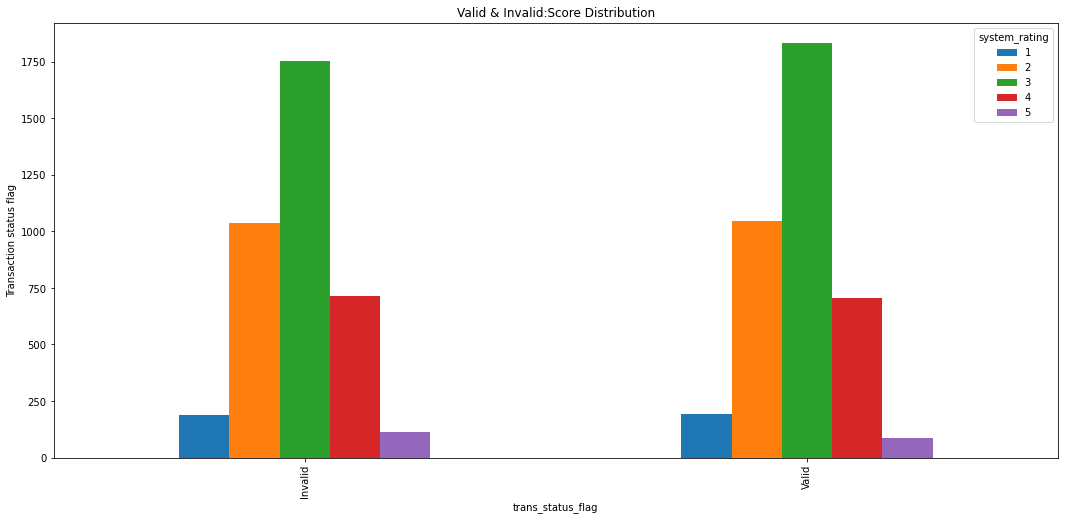

In [990]:
df2e = pd.pivot_table(df_final, index =["trans_status_flag"],columns="system_rating",aggfunc ="size",fill_value=0)
df2e.plot.bar(stacked=False,figsize=(18,8))
plt.title("Valid & Invalid:Score Distribution")
plt.ylabel("Transaction status flag")
plt.savefig("americanpic1f.png",bbox_inches = 'tight')

df2e['Total'] = df2e.sum(axis=1)
df2e.loc["Total"] = df2e.sum()
df2e.reset_index(inplace=True)

df2e.name="Valid & Invalid : Score Distribution"


worksheet0.write_string(bottom_border+3, 2, df2e.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df2e.shape[0]-1
top_right=2+df2e.shape[1]-1 

df2e.rename(columns={"trans_status_flag":"Transaction Status"},inplace=True)
df2e.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2e.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
worksheet0.insert_image(start_row-1,top_right+5, 'americanpic1f.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet0.set_row(bottom_border,15,cell_format3)
worksheet0.write(bottom_border, 2,"Total",new_format2)
df2e

system_rating,User score,1,2,3,4,5,Total
0,2,38,215,287,83,14,637
1,4,343,1871,3299,1337,186,7036
2,Total,381,2086,3586,1420,200,7673


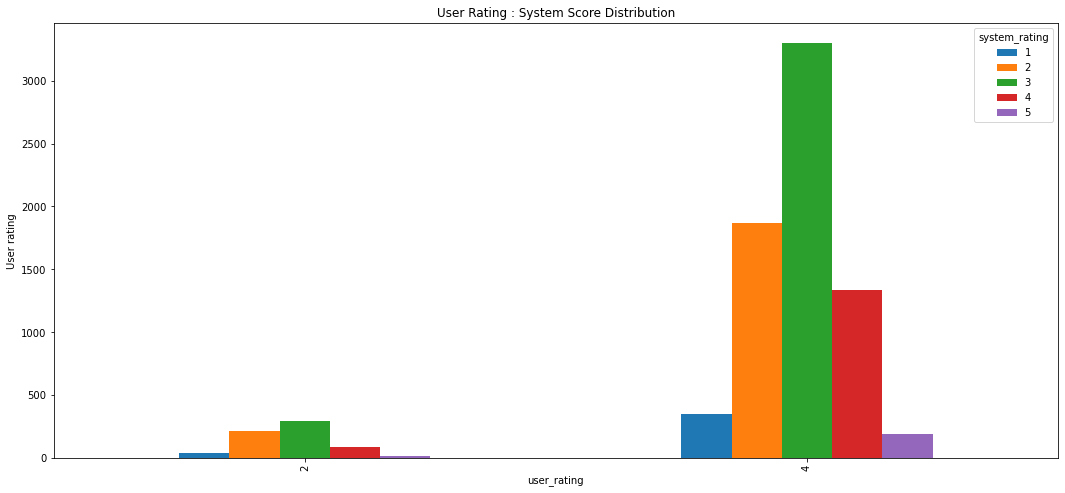

In [991]:
#user rating vs score

df3e = pd.pivot_table(df_final, index =["user_rating"],columns="system_rating",aggfunc ="size",fill_value=0)
df3e.plot.bar(stacked=False,figsize=(18,8))
plt.title("User Rating : System Score Distribution")
plt.ylabel("User rating")
plt.savefig("americanpic2f.png",bbox_inches = 'tight')

df3e['Total'] = df3e.sum(axis=1)
df3e.loc["Total"] = df3e.sum()

df3e.reset_index(inplace=True)

df3e.name="User Rating : System Score Distribution"
worksheet0.write_string(bottom_border+3+11, 2, df3e.name,cell_format)

start_row=bottom_border+5+11
bottom_border=start_row+df3e.shape[0]-1
top_right=2+df3e.shape[1]-1 

df3e.rename(columns={"user_rating":"User score"},inplace=True)
df3e.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3e.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
worksheet0.insert_image(start_row-1,top_right+5, 'americanpic2f.png',{'x_scale': 0.5, 'y_scale': 0.5})

#set column widths

#worksheet0.set_column(2, 2, 18)
#worksheet.set_column(2, 2, 25)
#worksheet1.set_column(2, 2, 23)
#worksheet1.set_column('N:N',34)
#worksheet1.set_column('D:M',13)
#worksheet3.set_column(2, 2, 23)
#worksheet4.set_column(2, 2, 23)
#worksheet4.set_column('L:L', 23)


# Apply alignment.
worksheet0.set_column('C:C',18,new_format1)
worksheet0.set_column('D:AD',8,new_format)

worksheet.set_column('C:C',30,new_format1)
worksheet.set_column('D:AD',8,new_format)

worksheet1.set_column('C:C',42,new_format1)
worksheet1.set_column('D:N',16,new_format)


worksheet3.set_column('C:C',62,new_format1)
worksheet3.set_column('D:O',16,new_format)


worksheet4.set_column('C:C',23,new_format1)
worksheet4.set_column('D:O',16,new_format)

worksheet6.set_column('C:C',23,new_format1)
worksheet6.set_column('D:J',16,new_format)
worksheet6.set_column('M:M',32,new_format1)

worksheet0.set_row(1,20,title_format)

worksheet0.write(1, 2,"GENERAL",cell_format1)

worksheet0.set_row(bottom_border,15,cell_format3)
worksheet0.write(bottom_border, 2,"Total",new_format2)

df3e

system_rating,Similarity,1,2,3,4,5,Total
0,Non-similar,169,928,0,47,3,1147
1,similar,25,119,1832,657,84,2717
2,Total,194,1047,1832,704,87,3864


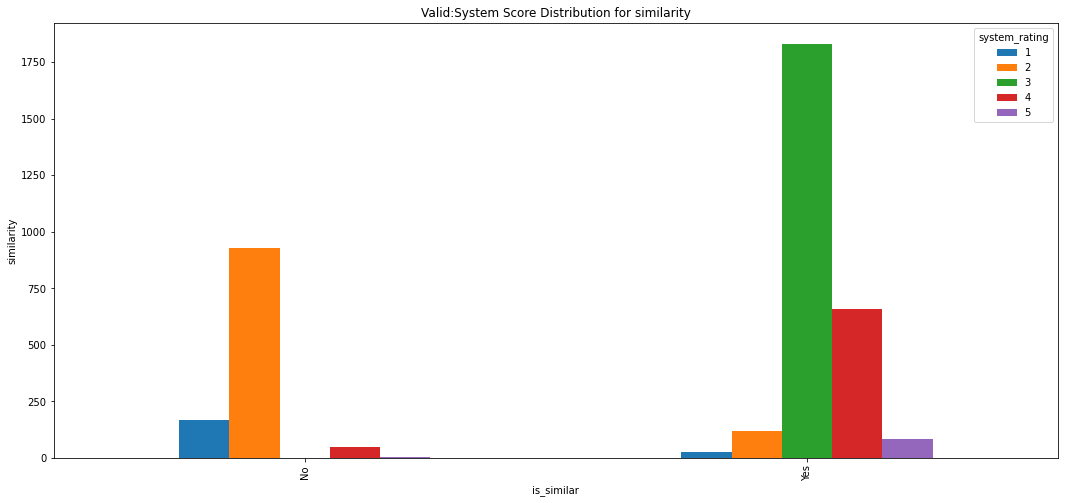

In [992]:
x=df_final[df_final["valid_transcation"]==True]


df4e = pd.pivot_table(x, index =["is_similar"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df4e.plot.bar(stacked=False,figsize=(18,8))
plt.title("Valid:System Score Distribution for similarity")
plt.ylabel("similarity")
plt.savefig("americanpic3f.png",bbox_inches = 'tight')

df4e['Total'] = df4e.sum(axis=1)
df4e.loc["Total"] = df4e.sum()
df4e=df4e.rename(index={'Yes': 'similar','No': 'Non-similar'})

df4e.reset_index(inplace=True)

df4e.name="Valid : System Score Distribution"
worksheet0.write_string(bottom_border+3+11, 2, df4e.name,cell_format)

start_row=bottom_border+5+11
bottom_border=start_row+df4e.shape[0]-1
top_right=2+df4e.shape[1]-1 

df4e.rename(columns={"is_similar":"Similarity"},inplace=True)
df4e.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4e.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
worksheet0.insert_image(start_row-1,top_right+5, 'americanpic3f.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet0.hide_gridlines(2)
worksheet.hide_gridlines(2)
worksheet1.hide_gridlines(2)
worksheet3.hide_gridlines(2)
worksheet4.hide_gridlines(2)


worksheet0.set_row(bottom_border,15,cell_format3)
worksheet0.write(bottom_border, 2,"Total",new_format2)

df4e


    



In [993]:
df_final.columns

Index(['uni_key', 'demand_guid', 'emp_no', 'proposal_date', 'rejection_date',
       'Rejected Reason', 'score', 'Business line', 'PROPOSAL SOURCE DESC',
       'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE', 'Essential Skills',
       'jd_text', 'role', 'modified', 'recent_skills', 'projects',
       'project_skills', 'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_project_certificate_skills_uni', 'number_of_skills',
       'number_of_projects', 'project_modified_date', 'current_date',
       'days_since_project_not_modified', 'trans_status_flag', 'system_rating',
       'user_rating', 'diffence', 'is_similar', 'Flag for invalid transaction',
       'valid_transcation', 'proposed_flag', 'allocation_flag',
       'rejection_flag', 'emp_stat', 'ALLOCATED ON',
       'derived_indent_geography', 'location', 'COUNTRY', 'INDENT NO',
       'transactions', 'count'],
      dtype='object')

In [994]:
df5e= pd.pivot_table(df_final, index =['trans_status_flag'],columns="Business line",aggfunc ="size",fill_value=0)
df5e['Total'] = df5e.sum(axis=1)
df5e.loc['Total'] = df5e.sum()
df5e.name = "Business Line Distribution"
df5e.reset_index(inplace=True)


worksheet0.write_string(bottom_border+3+11, 2, df5e.name,cell_format)

start_row=bottom_border+5+11
bottom_border=start_row+df5e.shape[0]-1
top_right=2+df5e.shape[1]-1 

df5e.rename(columns={"trans_status_flag":"Transaction Status"},inplace=True)
df5e.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5e.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
    
worksheet0.set_row(bottom_border,15,cell_format3)
worksheet0.write(bottom_border, 2,"Total",new_format2)
df5e


Business line,Transaction Status,AMR1,APME,CIA1,CIA2,CIAP,CIEU,CRA2,CREU,ERA1,...,IDAE,IDAP,IDCT,IDDC,IDDX,IDED,IDEU,IDOT,SF,Total
0,Invalid,0,2,3,0,5,6,1,0,1,...,1428,26,655,140,341,177,134,9,16,3809
1,Valid,1,2,4,3,5,7,0,1,0,...,1475,20,528,130,462,187,82,11,22,3864
2,Total,1,4,7,3,10,13,1,1,1,...,2903,46,1183,270,803,364,216,20,38,7673


#top 5 skills based on unique demands
df = df_final.drop_duplicates(subset=["demand_guid"])
df["count"]=1

df1 = pd.pivot_table(df, index =["essential_skills"],columns=["count"],aggfunc ="size",fill_value=0)
df1=df1.sort_values(by=1,ascending=False)
df1=df1.head(5)
df1["% of unique demands for that skill"]=(df1[1]/3886)*100
df1.rename(columns={1: 'Number of unique demands'},inplace=True)
df1

df1.to_excel('top_5_skills_based_on_unique_demands2.xlsx',index=True)

import numpy as np
df1["% of unique demands for that skill"]=np.round(df1['% of unique demands for that skill'],
                       decimals = 2) 

In [995]:
df_final["days_since_project_not_modified"].value_counts()

1000000    311
152        103
336         97
427         74
56          74
          ... 
1280         1
1306         1
1252         1
1240         1
2683         1
Name: days_since_project_not_modified, Length: 832, dtype: int64

In [996]:
#DAYS SINCE PROJECT NOT MODIFIED SYSTEM RATING DISTRIBUTION

list1=[]
for x in df_final["days_since_project_not_modified"]:
    if x<0:
        v="project end date in future"
    elif x<101 and x>0:
        v="0-100"
    elif x>100 and x<201:
        v="100-200"
    elif x>200 and x<301:
        v="200-300"
    elif x>300 and x<401:
        v="300-400"
    elif x>400 and x<50:
        v="400-500"
    elif x==1000000:
        v="project end date not present"
    
    elif x>500:
        v="500 and above"
    
    
    else:
        pass
    list1.append(v)

df_final["days_since_project_not_modified_bucket"]=list1

df = pd.pivot_table(df_final, index =["days_since_project_not_modified_bucket"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df["Total"]=df.sum(axis=1)

df.name = "Days Since Latest Project Not Updated : System Rating Distribution"

dfl=df.copy()

df.reset_index(inplace=True)
df.rename(columns={"days_since_project_not_modified_bucket":"Days since project not updated (buckets)"},inplace=True)

worksheet0.write_string(bottom_border+3, 2, df.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 

df.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)


df

system_rating,Days since project not updated (buckets),1,2,3,4,5,Total
0,0-100,89,399,639,215,32,1374
1,100-200,65,347,567,198,24,1201
2,200-300,35,268,471,200,17,991
3,300-400,44,254,528,212,33,1071
4,500 and above,112,695,1254,534,90,2685
5,project end date in future,0,7,9,3,2,21
6,project end date not present,36,116,118,58,2,330


In [997]:
m=list(dfl.index.values)
m

['0-100',
 '100-200',
 '200-300',
 '300-400',
 '500 and above',
 'project end date in future',
 'project end date not present']

In [998]:
#PERCENTAGE EQUIVALENCY OF THE ABOVE TABLE (FOR EACH BUCKET)

x1=list((dfl.loc["0-100"]/dfl["Total"]["0-100"])*100)
x2=list((dfl.loc["100-200"]/dfl["Total"]["100-200"])*100)
x3=list((dfl.loc["200-300"]/dfl["Total"]["200-300"])*100)
x4=list((dfl.loc["300-400"]/dfl["Total"]["300-400"])*100)
x5=list((dfl.loc["500 and above"]/dfl["Total"]["500 and above"])*100)
x6=list((dfl.loc["project end date in future"]/dfl["Total"]["project end date in future"])*100)
x7=list((dfl.loc["project end date not present"]/dfl["Total"]["project end date not present"])*100)

data = [x1,x2,x3,x4,x5,x6,x7]
df = pd.DataFrame(data, columns = [1,2,3,4,5,"Total"],index=m)
df=df.round(1)

df.name = "Days Since Latest Project Not Updated : Percentage of Total for each bucket"

df.reset_index(inplace=True)

df.rename(columns={"index":"Days since project not updated (buckets)"},inplace=True)


worksheet0.write_string(bottom_border+3, 2, df.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 

df.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
    
df



,Days since project not updated (buckets),1,2,3,4,5,Total
0,0-100,6.5,29.0,46.5,15.6,2.3,100.0
1,100-200,5.4,28.9,47.2,16.5,2.0,100.0
2,200-300,3.5,27.0,47.5,20.2,1.7,100.0
3,300-400,4.1,23.7,49.3,19.8,3.1,100.0
4,500 and above,4.2,25.9,46.7,19.9,3.4,100.0
5,project end date in future,0.0,33.3,42.9,14.3,9.5,100.0
6,project end date not present,10.9,35.2,35.8,17.6,0.6,100.0


In [999]:
#PROPOSAL DAY DISTRIBUTION

In [1000]:
df_final["proposal_date"]

listi=[]
for x in df_final["proposal_date"]:
    v=x.day
    listi.append(v)
df_final["proposal_day"]=listi

,Proposal date bucket,transactions
0,0-5th,1068
1,5-10th,1548
2,10-15th,766
3,15-20th,1349
4,20-25th,1197
5,25-31st,1745


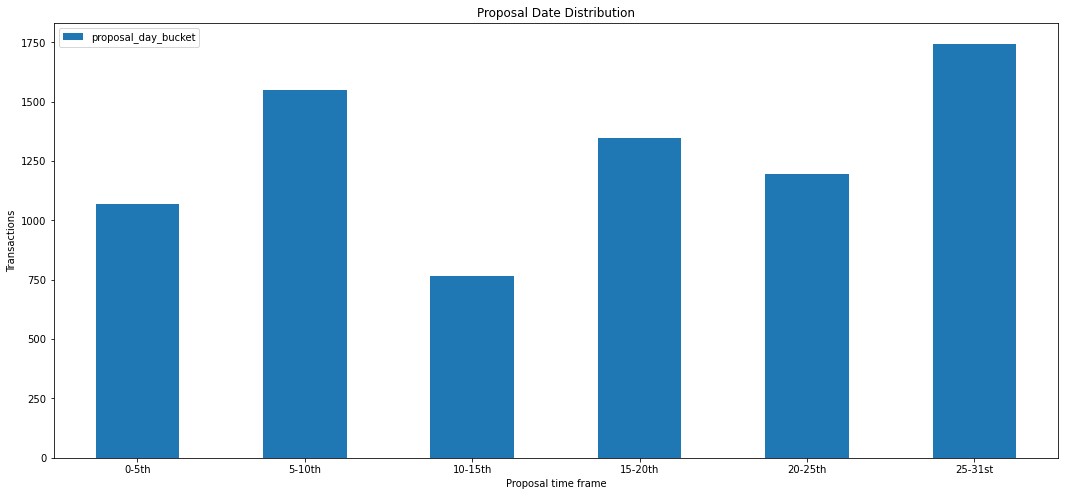

In [1001]:
list1=[]
for x in df_final["proposal_day"]:
    if x<6:
        v="0-5th"
    
    elif x>5 and x<11:
        v="5-10th"
    elif x>10 and x<16:
        v="10-15th"
    elif x>15 and x<21:
        v="15-20th"
    elif x>20 and x<26:
        v="20-25th"
    elif x>25:
        v="25-31st"
    
    else:
        pass
    list1.append(v)

df_final["proposal_day_bucket"]=list1

df=df_final["proposal_day_bucket"].value_counts().to_frame()

df=df.reindex(["0-5th","5-10th","10-15th","15-20th","20-25th","25-31st"])


df.plot.bar(figsize=(18,8))
plt.title("Proposal Date Distribution")
plt.ylabel("Transactions")
plt.xlabel("Proposal time frame")
plt.xticks(rotation=0)
plt.savefig("americanpic4f.png",bbox_inches = 'tight')

df.name = "Proposal Date Distribution"

df.reset_index(inplace=True)

df.rename(columns={"index":"Proposal date bucket","proposal_day_bucket":"transactions"},inplace=True)

worksheet0.write_string(bottom_border+3, 2, df.name,cell_format)

start_row=bottom_border+5
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 

df.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
worksheet0.insert_image(start_row-1,top_right+5, 'americanpic4f.png',{'x_scale': 0.5, 'y_scale': 0.5})    
df




In [1002]:
#ACCURACY BY REGION


listg=["INDIA","USA","EUROPE"]

listo=[]
for x in df_final["COUNTRY"]:
    if x not in listg:
        v="others"
    else:
        v=x
    listo.append(v)
    
df_final["COUNTRY2"]=listo


In [1003]:
df_final["COUNTRY2"].value_counts()

INDIA     6900
USA        516
others     141
EUROPE     116
Name: COUNTRY2, dtype: int64

In [1004]:
df=df_final["COUNTRY2"].value_counts().to_frame()
df

valid_df=df_final[df_final["trans_status_flag"]=="Valid"]
df1=valid_df["COUNTRY2"].value_counts().to_frame()

df = df.merge(df1, left_index=True, right_index=True,how="left")
df.rename(columns={"COUNTRY2_x":"Total Transactions","COUNTRY2_y":"Valid"},inplace=True)
df

sim_df=valid_df[valid_df["is_similar"]=="Yes"]
df1=sim_df["COUNTRY2"].value_counts().to_frame()
df = df.merge(df1, left_index=True, right_index=True,how="left")
df.rename(columns={"COUNTRY2":"Valid & Similar"},inplace=True)
df["Accuracy"]=(df["Valid & Similar"]/df["Valid"])*100
df=df.fillna(0)
df=df.round(1)

df.name = "Accuracy By Location"

df.reset_index(inplace=True)

df.rename(columns={"index":"Region"},inplace=True)

worksheet0.write_string(bottom_border+3+10, 2, df.name,cell_format)

start_row=bottom_border+5+10
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 

df.to_excel(writer,sheet_name='General',startrow=start_row , startcol=2,header=False,index=False)
worksheet0.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet0.write(start_row-1, 2+col_num, value, header_format)
    
df

,Region,Total Transactions,Valid,Valid & Similar,Accuracy
0,INDIA,6900,3500,2438,69.7
1,USA,516,227,165,72.7
2,others,141,77,64,83.1
3,EUROPE,116,60,50,83.3


In [1005]:
# Proficiency Analysis

#df_mand_skill_in_supply_skills = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Sean\2021 data edge networks\july\wipro\transaction_proficiency_analysis_march_22_4_21.xlsx', sheet_name='mand_skill_in_supply_skills')

#df_mand_skill_in_project_skills = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Sean\2021 data edge networks\july\wipro\transaction_proficiency_analysis_march_22_4_21.xlsx', sheet_name='mand_skill_in_project_skills')

#df_mand_sk_in_certificate_skill = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Sean\2021 data edge networks\july\wipro\transaction_proficiency_analysis_march_22_4_21.xlsx', sheet_name='mand_sk_in_certificate_skill')

#df_mand_sk_in_recent_project_skill = pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\Sean\2021 data edge networks\july\wipro\transaction_proficiency_analysis_march_22_4_21.xlsx', sheet_name='rec_proj_sk_and_prof_match')


#load original data to get total number of transactions
#df_original= pd.read_excel(r'C:\Users\Admin\OneDrive\Desktop\test data fro wipro report.xlsx')

In [1006]:
a1=df_mand_skill_in_supply_skills.shape[0]
a2=df_mand_skill_in_project_skills.shape[0]
a3=df_mand_sk_in_certificate_skill.shape[0]
a4=df_mand_sk_in_recent_project_skill.shape[0]
a0=df_final.shape[0]
dfn = df_mand_sk_in_certificate_skill[(df_mand_sk_in_certificate_skill["mand_skill_found_in_certificate"]=="present") & (df_mand_sk_in_certificate_skill["mand_skill_found_in_sup_project"]=="not_present")]
a5=dfn.shape[0]

df_general=pd.DataFrame(data={"count":[a0,a1,a2,a4,a3,a5]},index=["Total Transactions","Total trans where supply has mandatory skill","Transactions with mandatory skill in project skills","Transactions with mandatory skill in recent project skills","Transactions with mandatory skills in certifications","Transactions with mandatory skills only in certifications"])
df_general["Percentage of total"]=(df_general["count"]/a0)*100
df_general=df_general.round(1)


df_general.reset_index(inplace=True)
df_general.name="Overall analysis"

df_general['Percentage of total'] = df_general['Percentage of total'].astype(str) + '%'

worksheet5.write_string(3, 2, df_general.name,cell_format)
start_row=0+5
bottom_border=start_row+df_general.shape[0]-1
top_right=2+df_general.shape[1]-1


df_general.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,index=False,header=False)

worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df_general.columns.values):
    worksheet5.write(4, 2+col_num, value, header_format)
worksheet5.set_column('C:C',48,new_format1)
worksheet5.set_column('D:N',16,new_format)

df_general


,index,count,Percentage of total
0,Total Transactions,7673,100.0%
1,Total trans where supply has mandatory skill,2616,34.1%
2,Transactions with mandatory skill in project s...,2310,30.1%
3,Transactions with mandatory skill in recent pr...,555,7.2%
4,Transactions with mandatory skills in certific...,855,11.1%
5,Transactions with mandatory skills only in cer...,289,3.8%


In [1007]:
df_mand_skill_in_project_skills["prof_level"].value_counts()
df_mand_skill_in_project_skills["project_skill_prof"].value_counts()

L1    1703
L2     502
L3     105
Name: project_skill_prof, dtype: int64

In [1008]:
df_mand_skill_in_project_skills["prof_level"]=df_mand_skill_in_project_skills["prof_level"].replace(["L1","L2","L3","L4"],[1,2,3,4])
df_mand_skill_in_project_skills["project_skill_prof"]=df_mand_skill_in_project_skills["project_skill_prof"].replace(["L1","L2","L3","L4"],[1,2,3,4])
df_mand_skill_in_project_skills["prof_difference"]=df_mand_skill_in_project_skills["prof_level"]-df_mand_skill_in_project_skills["project_skill_prof"]

,Proficiency Difference,count
0,2,1080
1,1,657
2,0,492
3,-1,69
4,-2,10
5,3,2


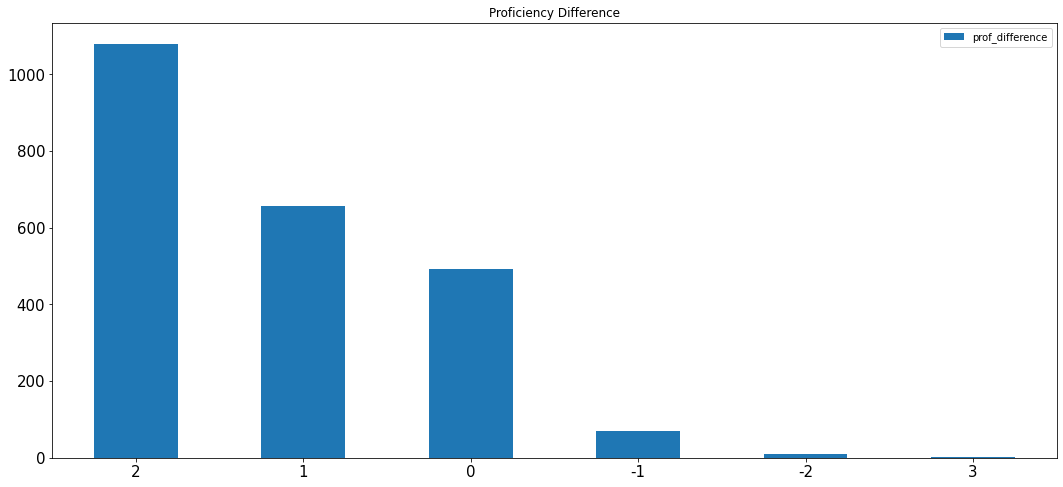

In [1009]:
#next table

df1 =df_mand_skill_in_project_skills["prof_difference"].value_counts().to_frame()

df1.plot.bar(figsize=(18,8))
plt.title("Proficiency Difference")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic1g.png",bbox_inches = 'tight')

df1.reset_index(inplace=True)
df1_string="Mandatory Skill in Project Skill"
df1.name="Proficiency Difference(demand prof-supply prof)"

worksheet5.write(bottom_border+2+1, 1, df1_string,cell_format2)
worksheet5.write_string(bottom_border+4+1, 2, df1.name,cell_format)
worksheet5.write(bottom_border+2+1, 2,"",cell_format2)
worksheet5.write(bottom_border+2+1, 0,"",cell_format2)


start_row=bottom_border+6+1
bottom_border=start_row+df1.shape[0]-1
top_right=2+df1.shape[1]-1 

df1.rename(columns={"index":"Proficiency Difference","prof_difference":"count"},inplace=True)

df1

In [1010]:
#next table

#HIGHER
df1a=df1[df1["Proficiency Difference"]<0]
df1a.loc["total"]=df1a.sum()

#SAME
df1b=df1[df1["Proficiency Difference"]==0]
df1b.loc["total"]=df1b.sum()

#LOWER
df1c=df1[df1["Proficiency Difference"]>0]
df1c.loc["total"]=df1c.sum()

df1a

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,Proficiency Difference,count
3,-1,69
4,-2,10
total,-3,79


In [1011]:
#uploading df1 to excel after creating higher, lower , same as we had to add total column too

df1.loc["Total"]=df1.sum()
df1["Proficiency Difference"]["Total"]="Total"
df1.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border+1, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.insert_image(start_row-1,10, 'americanpic1g.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet5.write(bottom_border+1, 2,"Total",new_format2)

0

In [1012]:
higher=df1a["count"]["total"]

same=df1b["count"]["total"]

lower=df1c["count"]["total"]

lower


1739

In [1013]:
df2=pd.DataFrame(data={"count":[higher,same,lower]},index=["Higher","Same","Lower"])
df2.loc["Total"]=df2.sum()
df2["percentage of total"]=(df2["count"]/df2["count"]["Total"])*100
df2["percentage of total transactions"]=(df2["count"]/a0)*100
df2=df2.round(1)
df2.loc["N-1"]=df2["count"]["Same"]
df2["percentage of total"]["N-1"]=""
df2["percentage of total transactions"]["N-1"]=(df2["count"]["N-1"]/a0)*100

df2.reset_index(inplace=True)


df2=df2.round(1)
df2['percentage of total'] = df2['percentage of total'].astype(str) + '%'
df2['percentage of total transactions'] = df2['percentage of total transactions'].astype(str) + '%'

df2.name="Proficiency Level analysis"
worksheet5.write_string(bottom_border+4+8, 2,df2.name,cell_format)

start_row=bottom_border+6+8
bottom_border=start_row+df2.shape[0]-1
top_right=2+df2.shape[1]-1 


df2.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.write(bottom_border-1, 2,"Total",new_format2)
worksheet5.write(bottom_border, 2,"N-1",new_format2)

df2


<ipython-input-1013-8d112aa1c617>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["percentage of total"]["N-1"]=""
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-1013-8d112aa1c617>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["percentage of total transactions"]["N-1"]=(df2["count"]["N-1"]/a0)*100

,index,count,percentage of total,percentage of total transactions
0,Higher,79,3.4%,1.0%
1,Same,492,21.3%,6.4%
2,Lower,1739,75.3%,22.7%
3,Total,2310,100.0%,30.1%
4,N-1,492,%,6.4%


system_rating,Similarity,1,2,3,4,5,Total
0,Non-Similar,25,283,0,34,12,354
1,Similar,1,30,1097,695,133,1956
2,Total,26,313,1097,729,145,2310


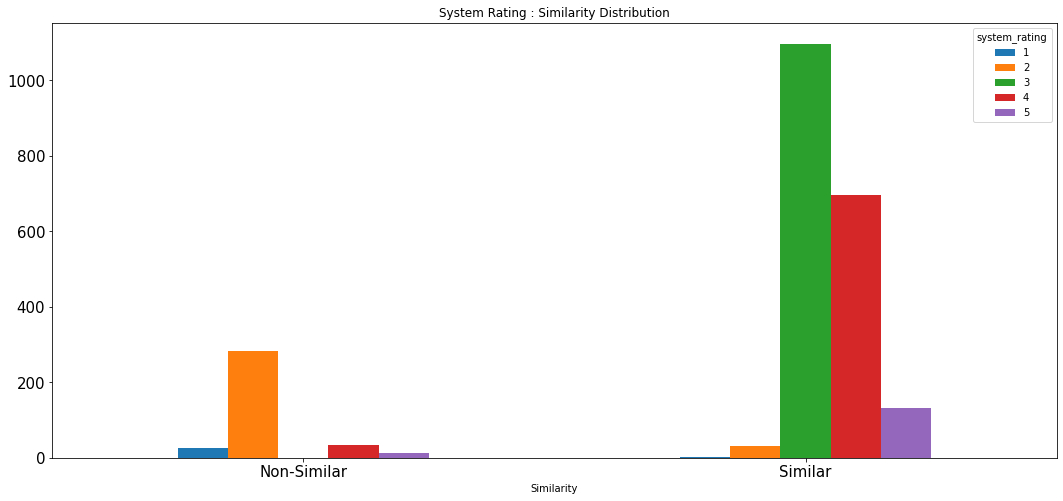

In [1014]:
#next table

df3 = pd.pivot_table(df_mand_skill_in_project_skills, index =["is_similar"],columns=["system_rating"],aggfunc ="size",fill_value=0)

df3.rename(index={"No":"Non-Similar","Yes":"Similar"},inplace=True)

df3.plot.bar(figsize=(18,8))
plt.title("System Rating : Similarity Distribution")
plt.xlabel("Similarity")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic2g.png",bbox_inches = 'tight')

df3["Total"]=df3.sum(axis=1)
df3.loc["Total"]=df3.sum()

df3.reset_index(inplace=True)

df3.name="System Rating : Similarity Distribution"


worksheet5.write_string(bottom_border+4, 2, df3.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df3.shape[0]-1
top_right=2+df3.shape[1]-1 


df3.rename(columns={"is_similar":"Similarity"},inplace=True)
df3.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.insert_image(start_row-1,10, 'americanpic2g.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet5.write(bottom_border, 2,"Total",new_format2)
df3

In [1015]:
df_mand_skill_in_project_skills.columns

Index(['demand_guid', 'emp_no', 'PROPOSED ON', 'REJECTED ON', 'ALLOCATED ON',
       'REJECTED REASON', 'PROP JSCORE PERC', 'DEM BUSL',
       'PROPOSAL SOURCE DESC', 'PROJECT ACQUIRED SKILL', 'TRANSACTION DATE',
       'essential_skills', 'jd_text', 'role', 'skillname', 'prof_level',
       'bias', 'sup_modified', 'sup_recent_skills', 'sup_projects',
       'sup_certifications', 'sup_proj_end_date', 'sup_recent_proj_skills',
       'sup_all_project_skills', 'sup_certificate_skills',
       'sup_uni_skills_in_all', 'mand_skill_found_in_sup_skill',
       'demand_emp_uni_key', 'mand_skill_found_in_sup_project',
       'project_skill_prof', 'mapping_project_profi',
       'mapping_mandat_sk_profi', 'proj_sk_and_mand_sk_prof_diff',
       'proposal_date', 'rejection_date', 'rejected_reason', 'score',
       'modified', 'recent_skills', 'projects', 'project_skills',
       'certifications', 'end_date', 'certificate_skills',
       'recent+project_skills+certificate_skills',
       'recent_

In [1016]:
#PROF DIFFERENCE VS REJECTIONS AND ALLOCATIONS

dfa = pd.pivot_table(df_mand_skill_in_project_skills, index =["rejection_flag"],columns=["prof_difference"],aggfunc ="size",fill_value=0)
dfa["Total"]=dfa.sum(axis=1)
dfa.reset_index(inplace=True)
dfa.rename(columns={"rejection_flag":"Rejection Flag"},inplace=True)
dfa.name="Rejection : Prof Difference Distribution"


worksheet5.write_string(bottom_border+4, 2, dfa.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+dfa.shape[0]-1
top_right=2+dfa.shape[1]-1 


dfa.rename(columns={"is_similar":"Similarity"},inplace=True)
dfa.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(dfa.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)

dfa

prof_difference,Rejection Flag,-2,-1,0,1,2,3,Total
0,not_rejected,7,37,233,345,500,2,1124
1,rejected,3,32,259,312,580,0,1186


In [1017]:
dfb = pd.pivot_table(df_mand_skill_in_project_skills, index =["allocation_flag"],columns=["prof_difference"],aggfunc ="size",fill_value=0)
dfb["Total"]=dfb.sum(axis=1)
dfb.reset_index(inplace=True)
dfb.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
dfb.name="Allocation : Prof Difference Distribution"


worksheet5.write_string(bottom_border+4, 2, dfb.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+dfb.shape[0]-1
top_right=2+dfb.shape[1]-1 



dfb.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(dfb.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)


dfb

prof_difference,Allocation Flag,-2,-1,0,1,2,3,Total
0,allocated,0,2,5,2,3,0,12
1,not_allocated,10,67,487,655,1077,2,2298


In [1018]:
#TOP ESSENTIAL SKILLS VS PROF LEVEL DIFFERENCE FOR UNIQUE DEMANDS

dfx = df_mand_skill_in_project_skills.drop_duplicates(subset=["demand_guid"])

df = pd.pivot_table(dfx, index =["essential_skills"],columns=["prof_difference"],aggfunc ="size",fill_value=0)
df["Total"]=df.sum(axis=1)
df=df.sort_values(by='Total', ascending=False)
df=df.head(5)
dft=df.copy()

df.reset_index(inplace=True)
df.rename(columns={"essential_skills":"Essential Skills"},inplace=True)
df.name="Top Essential Skills : Prof Difference Distribution (For Unique Demands)"


worksheet5.write_string(bottom_border+4, 2, df.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 



df.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
    
df

prof_difference,Essential Skills,-2,-1,0,1,2,Total
0,Selenium,0,1,24,34,94,153
1,Core Java,0,2,28,16,38,84
2,Java-J2EE,0,0,16,25,41,82
3,Application Testing,0,0,15,33,30,78
4,Spring Boot,0,0,2,16,58,76


In [1019]:
# % equivalency

dft=dft.reset_index()
x=dft["essential_skills"].to_list()
dft=dft.drop(['essential_skills'], axis = 1)

dft.loc[0]=(dft.loc[0]/dft["Total"][0])*100
dft.loc[1]=(dft.loc[1]/dft["Total"][1])*100
dft.loc[2]=(dft.loc[2]/dft["Total"][2])*100
dft.loc[3]=(dft.loc[3]/dft["Total"][3])*100
dft.loc[4]=(dft.loc[4]/dft["Total"][4])*100

dft=dft.round(1)

dft["Essential Skills"]=x

df=dft.reindex(columns= ['Essential Skills',-2,-1,0,1,2,"Total"])

df[[-2,-1,0,1,2,"Total"]] = df[[-2,-1,0,1,2,"Total"]].astype(str) + '%'

df.name="Top Essential Skills : % of Total for Skill "


worksheet5.write_string(bottom_border+4, 2, df.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 



df.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)

df


prof_difference,Essential Skills,-2,-1,0,1,2,Total
0,Selenium,0.0%,0.7%,15.7%,22.2%,61.4%,100.0%
1,Core Java,0.0%,2.4%,33.3%,19.0%,45.2%,100.0%
2,Java-J2EE,0.0%,0.0%,19.5%,30.5%,50.0%,100.0%
3,Application Testing,0.0%,0.0%,19.2%,42.3%,38.5%,100.0%
4,Spring Boot,0.0%,0.0%,2.6%,21.1%,76.3%,100.0%


In [1020]:
#mandatory skills in certificate skills

df_mand_sk_in_certificate_skill["prof_level"].value_counts()
df_mand_sk_in_certificate_skill["certificate_skill_prof"].value_counts()

L1    586
L2    184
L3     41
L4      4
Name: certificate_skill_prof, dtype: int64

In [1021]:
df_mand_sk_in_certificate_skill["prof_level"]=df_mand_sk_in_certificate_skill["prof_level"].replace(["L1","L2","L3","L4"],[1,2,3,4])
df_mand_sk_in_certificate_skill["certificate_skill_prof"]=df_mand_sk_in_certificate_skill["certificate_skill_prof"].replace(["L1","L2","L3","L4"],[1,2,3,4])
df_mand_sk_in_certificate_skill["prof_difference"]=df_mand_sk_in_certificate_skill["prof_level"]-df_mand_sk_in_certificate_skill["certificate_skill_prof"]

,Proficiency Difference,count
0,2.0,421
1,1.0,265
2,0.0,101
3,-1.0,24
4,-2.0,4


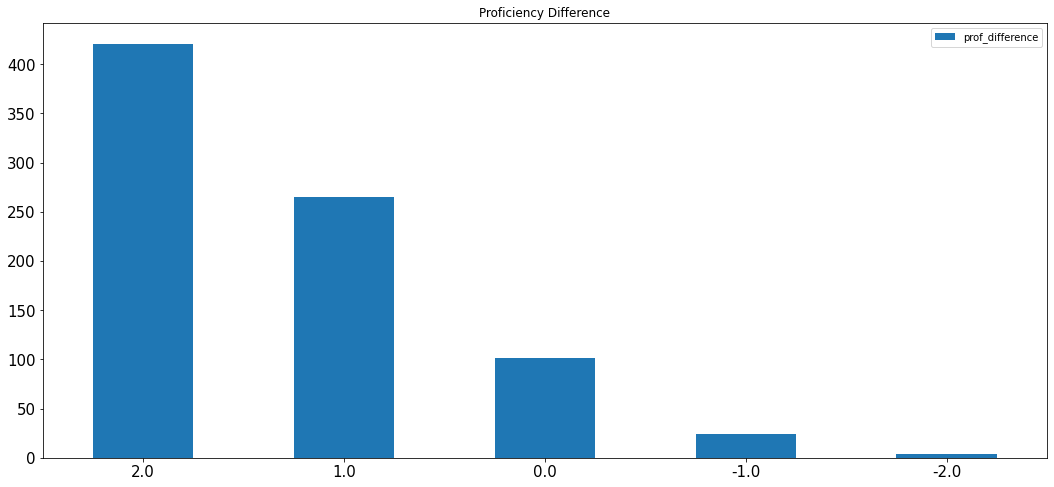

In [1022]:
df4 =df_mand_sk_in_certificate_skill["prof_difference"].value_counts().to_frame()
df4.plot.bar(figsize=(18,8))
plt.title("Proficiency Difference")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic3g.png",bbox_inches = 'tight')


df4.reset_index(inplace=True)
df4_string="Mandatory Skill in Certification"
df4.name="Proficiency Difference(demand prof-supply prof)"

worksheet5.write(bottom_border+2+11, 1, df4_string,cell_format2)
worksheet5.write_string(bottom_border+4+11, 2, df4.name,cell_format)
worksheet5.write(bottom_border+2+11, 2,"",cell_format2)
worksheet5.write(bottom_border+2+11, 0,"",cell_format2)

start_row=bottom_border+6+11
bottom_border=start_row+df4.shape[0]-1
top_right=2+df4.shape[1]-1 

df4.rename(columns={"index":"Proficiency Difference","prof_difference":"count"},inplace=True)

df4

In [1023]:
#HIGHER
dfa=df4[df4["Proficiency Difference"]<0]
dfa.loc["total"]=dfa.sum()

#SAME
dfb=df4[df4["Proficiency Difference"]==0]
dfb.loc["total"]=dfb.sum()

#LOWER
dfc=df4[df4["Proficiency Difference"]>0]
dfc.loc["total"]=dfc.sum()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [1024]:
#uploading df4 to excel 

df4.loc["Total"]=df4.sum()
df4["Proficiency Difference"]["Total"]="Total"

df4.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border+1, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.insert_image(start_row-1,10, 'americanpic3g.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet5.write(bottom_border+1, 2,"Total",new_format2)

0

In [1025]:
higher=dfa["count"]["total"]

same=dfb["count"]["total"]

lower=dfc["count"]["total"]

In [1026]:
df5=pd.DataFrame(data={"count":[higher,same,lower]},index=["Higher","Same","Lower"])
df5.loc["Total"]=df5.sum()
df5["percentage of total"]=(df5["count"]/df5["count"]["Total"])*100
df5["percentage of total transactions"]=(df5["count"]/a0)*100
df5=df5.round(1)
df5.loc["N-1"]=df5["count"]["Same"]
df5["percentage of total"]["N-1"]=""
df5["percentage of total transactions"]["N-1"]=(df5["count"]["N-1"]/a0)*100
df5=df5.round(1)

df5.reset_index(inplace=True)


df5=df5.round(1)
df5['percentage of total'] = df5['percentage of total'].astype(str) + '%'
df5['percentage of total transactions'] = df5['percentage of total transactions'].astype(str) + '%'

df5.name="Proficiency Level analysis"
worksheet5.write_string(bottom_border+4+2, 2, df5.name,cell_format)

start_row=bottom_border+6+2
bottom_border=start_row+df5.shape[0]-1
top_right=2+df5.shape[1]-1 


df5.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.write(bottom_border-1, 2,"Total",new_format2)
worksheet5.write(bottom_border, 2,"N-1",new_format2)
df5

<ipython-input-1026-e82f9c4550b7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["percentage of total transactions"]["N-1"]=(df5["count"]["N-1"]/a0)*100


,index,count,percentage of total,percentage of total transactions
0,Higher,28.0,3.4%,0.4%
1,Same,101.0,12.4%,1.3%
2,Lower,686.0,84.2%,8.9%
3,Total,815.0,100.0%,10.6%
4,N-1,101.0,%,1.3%


In [1027]:
list1=[]
for x in df_mand_sk_in_certificate_skill["PROP JSCORE PERC"]:
    
    if x>=0 and x<31:
        v=1
    elif x>30 and x<51:
        v=2
    elif x>50 and x<71:
        v=3
    elif x>70 and x<91:
        v=4
    elif x>90 and x<101:
        v=5
    
    
    else:
        pass
    list1.append(v)

df_mand_sk_in_certificate_skill["system rating"]=list1

df_mand_sk_in_certificate_skill["mand_skill_found_in_sup_project"]

df = pd.pivot_table(df_mand_sk_in_certificate_skill, index =["mand_skill_found_in_sup_project"],columns=["system rating"],aggfunc ="size",fill_value=0)

df.name="Mandatory Skill Present In Supply Project (For all mandatory skill present in certificate)"
worksheet5.write_string(bottom_border+4+2, 2, df.name,cell_format)

start_row=bottom_border+6+2
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1 


df.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)

df


system rating,1,2,3,4,5
mand_skill_found_in_sup_project,,,,,
not_present,6,59,151,62,11
present,2,71,207,227,59


In [1028]:
#mandatory skill in recent project

df_mand_sk_in_recent_project_skill["prof_level"].value_counts()
df_mand_sk_in_recent_project_skill["rec_project_skill_prof"].value_counts()

L1    388
L2    146
L3     21
Name: rec_project_skill_prof, dtype: int64

In [1029]:
df_mand_sk_in_recent_project_skill["prof_level"]=df_mand_sk_in_recent_project_skill["prof_level"].replace(["L1","L2","L3","L4"],[1,2,3,4])
df_mand_sk_in_recent_project_skill["rec_project_skill_prof"]=df_mand_sk_in_recent_project_skill["rec_project_skill_prof"].replace(["L1","L2","L3","L4"],[1,2,3,4])

df_mand_sk_in_recent_project_skill["prof_difference"]=df_mand_sk_in_recent_project_skill["prof_level"]-df_mand_sk_in_recent_project_skill["rec_project_skill_prof"]

,Proficiency Difference,count
0,2,207
1,1,167
2,0,158
3,-1,22
4,-2,1


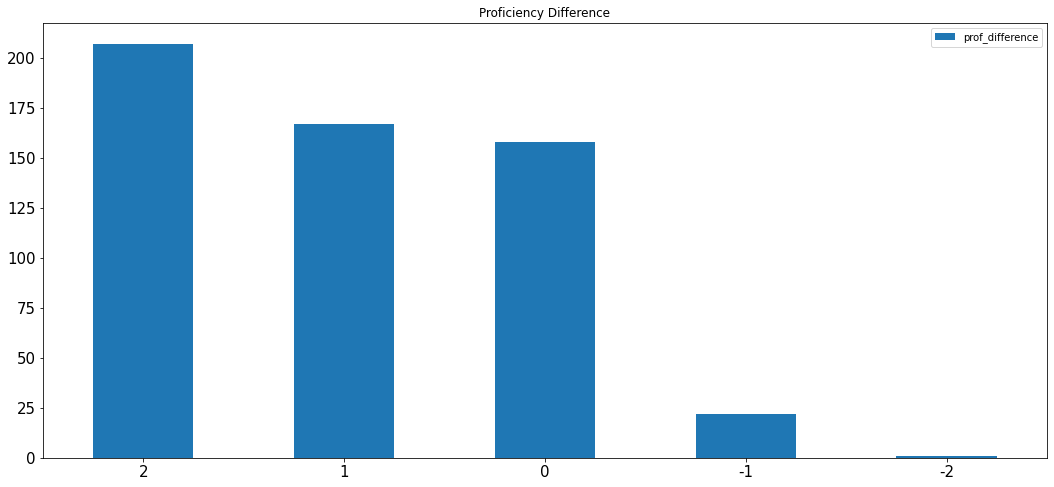

In [1030]:
df6 =df_mand_sk_in_recent_project_skill["prof_difference"].value_counts().to_frame()

df6.plot.bar(figsize=(18,8))
plt.title("Proficiency Difference")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic4g.png",bbox_inches = 'tight')


df6.reset_index(inplace=True)
df6_string="Mandatory Skill in Recent Project"
df6.name="Proficiency Difference(demand prof-supply prof)"

worksheet5.write(bottom_border+2+1, 1, df6_string,cell_format2)
worksheet5.write_string(bottom_border+4+1, 2, df6.name,cell_format)
worksheet5.write(bottom_border+2+1, 2,"",cell_format2)
worksheet5.write(bottom_border+2+1, 0,"",cell_format2)

start_row=bottom_border+6+1
bottom_border=start_row+df6.shape[0]-1
top_right=2+df6.shape[1]-1 

df6.rename(columns={"index":"Proficiency Difference","prof_difference":"count"},inplace=True)
df6

In [1031]:
#HIGHER
dfa=df6[df6["Proficiency Difference"]<0]
dfa.loc["total"]=dfa.sum()

#SAME
dfb=df6[df6["Proficiency Difference"]==0]
dfb.loc["total"]=dfb.sum()

#LOWER
dfc=df6[df6["Proficiency Difference"]>0]
dfc.loc["total"]=dfc.sum()

dfa

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,Proficiency Difference,count
3,-1,22
4,-2,1
total,-3,23


In [1032]:
#uploading df6 to excel

df6.loc["Total"]=df6.sum()
df6["Proficiency Difference"]["Total"]="Total"

df6.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border+1, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df6.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.insert_image(start_row-1,10, 'americanpic4g.png',{'x_scale': 0.5, 'y_scale': 0.5})

worksheet5.write(bottom_border+1, 2,"Total",new_format2)
df6

,Proficiency Difference,count
0,2,207
1,1,167
2,0,158
3,-1,22
4,-2,1
Total,Total,555


In [1033]:
higher=dfa["count"]["total"]

same=dfb["count"]["total"]

lower=dfc["count"]["total"]

In [1034]:
df7=pd.DataFrame(data={"count":[higher,same,lower]},index=["Higher","Same","Lower"])
df7.loc["Total"]=df7.sum()
df7["percentage of total"]=(df7["count"]/df7["count"]["Total"])*100
df7["percentage of total transactions"]=(df7["count"]/a0)*100
df7=df7.round(1)
df7.loc["N-1"]=df7["count"]["Same"]
df7["percentage of total"]["N-1"]=""
df7["percentage of total transactions"]["N-1"]=(df7["count"]["N-1"]/a0)*100
df7=df7.round(1)


df7.reset_index(inplace=True)


df7=df7.round(1)
df7['percentage of total'] = df7['percentage of total'].astype(str) + '%'
df7['percentage of total transactions'] = df7['percentage of total transactions'].astype(str) + '%'

df7.name="Proficiency Level analysis"
worksheet5.write_string(bottom_border+4+8, 2, df7.name,cell_format)

start_row=bottom_border+6+8
bottom_border=start_row+df7.shape[0]-1
top_right=2+df7.shape[1]-1 


df7.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df7.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.write(bottom_border-1, 2,"Total",new_format2)
worksheet5.write(bottom_border, 2,"N-1",new_format2)
    
df7

<ipython-input-1034-9e964c6e7d0c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["percentage of total"]["N-1"]=""
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-1034-9e964c6e7d0c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7["percentage of total transactions"]["N-1"]=(df7["count"]["N-1"]/a0)*100

,index,count,percentage of total,percentage of total transactions
0,Higher,23,4.1%,0.3%
1,Same,158,28.5%,2.1%
2,Lower,374,67.4%,4.9%
3,Total,555,100.0%,7.2%
4,N-1,158,%,2.1%


system_rating,Similarity,1,2,3,4,5,Total
0,Non-Similar,12,100,0,4,0,116
1,Similar,1,9,231,177,21,439
2,Total,13,109,231,181,21,555


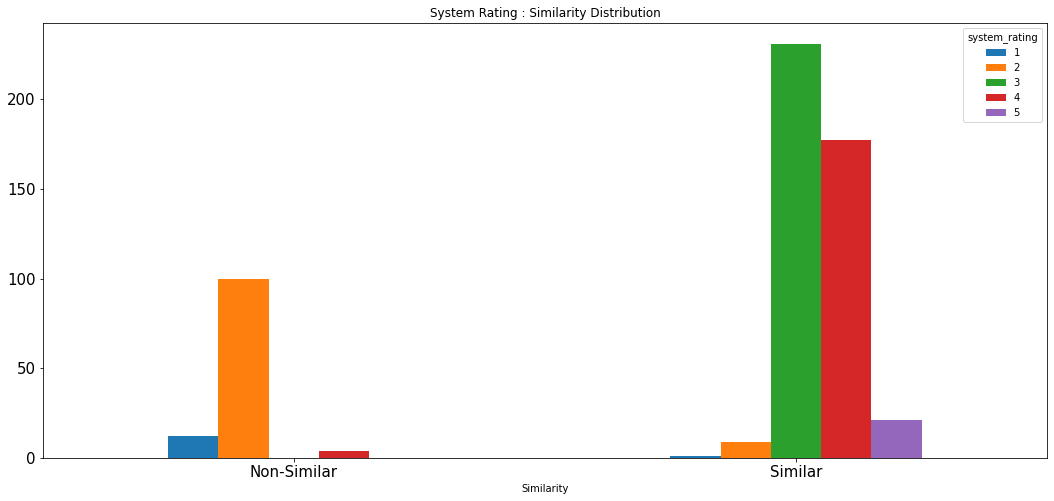

In [1035]:
#next table

df8 = pd.pivot_table(df_mand_sk_in_recent_project_skill, index =["is_similar"],columns=["system_rating"],aggfunc ="size",fill_value=0)
df8.rename(index={"No":"Non-Similar","Yes":"Similar"},inplace=True)
df8.plot.bar(figsize=(18,8))
plt.title("System Rating : Similarity Distribution")
plt.xlabel("Similarity")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic5g.png",bbox_inches = 'tight')

df8["Total"]=df8.sum(axis=1)
df8.loc["Total"]=df8.sum()

df8.reset_index(inplace=True)
df8.name="System Rating : Similarity Distribution"


worksheet5.write_string(bottom_border+4, 2, df8.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+df8.shape[0]-1
top_right=2+df8.shape[1]-1 


df8.rename(columns={"is_similar":"Similarity"},inplace=True)
df8.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df8.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)
worksheet5.insert_image(start_row-1,10, 'americanpic5g.png',{'x_scale': 0.5, 'y_scale': 0.5})    
    
worksheet5.set_row(1,20,title_format)

worksheet5.write(1, 2,"Proficiency Analysis",cell_format1)

worksheet5.write(bottom_border, 2,"Total",new_format2)
worksheet5.hide_gridlines(2)


df8

In [1036]:
#PROF DIFFERENCE VS REJECTIONS AND ALLOCATIONS

dfa = pd.pivot_table(df_mand_sk_in_recent_project_skill, index =["rejection_flag"],columns=["prof_difference"],aggfunc ="size",fill_value=0)
dfa["Total"]=dfa.sum(axis=1)
dfa.reset_index(inplace=True)
dfa.rename(columns={"rejection_flag":"Rejection Flag"},inplace=True)
dfa.name="Rejection : Prof Difference Distribution"


worksheet5.write_string(bottom_border+4, 2, dfa.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+dfa.shape[0]-1
top_right=2+dfa.shape[1]-1 


dfa.rename(columns={"is_similar":"Similarity"},inplace=True)
dfa.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(dfa.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)

dfa

prof_difference,Rejection Flag,-2,-1,0,1,2,Total
0,not_rejected,1,16,69,91,109,286
1,rejected,0,6,89,76,98,269


In [1037]:
dfb = pd.pivot_table(df_mand_sk_in_recent_project_skill, index =["allocation_flag"],columns=["prof_difference"],aggfunc ="size",fill_value=0)
dfb["Total"]=dfb.sum(axis=1)
dfb.reset_index(inplace=True)
dfb.rename(columns={"allocation_flag":"Allocation Flag"},inplace=True)
dfb.name="Allocation : Prof Difference Distribution"


worksheet5.write_string(bottom_border+4, 2, dfb.name,cell_format)

start_row=bottom_border+6
bottom_border=start_row+dfb.shape[0]-1
top_right=2+dfb.shape[1]-1 



dfb.to_excel(writer,sheet_name='Proficiency Analysis',startrow=start_row , startcol=2,header=False,index=False)
worksheet5.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(dfb.columns.values):
    worksheet5.write(start_row-1, 2+col_num, value, header_format)

dfb

prof_difference,Allocation Flag,-2,-1,0,1,2,Total
0,allocated,0,1,3,0,2,6
1,not_allocated,1,21,155,167,205,549


In [1038]:
import pandas as pd

In [1039]:
#profile completeness

df_prof_comp=pd.concat([df_prof_comp1,df_prof_comp2])
df_prof_comp.shape

(81246, 28)

In [1040]:
df_prof_comp.columns

Index(['emp_no', 'emp_tbl_bench', 'modified', 'recent_skills', 'projects',
       'certifications', 'trainings', 'emp_stat', 'responsibility',
       'project_skills', 'certificate_skills', 'training_name',
       'recent+project_skills+certificate_skills', 'number_of_skills_in_all',
       'number_of_skills_in_project', 'number_of_skills_in_certificates',
       'number_of_trainings', 'number_of_projects', 'project_modified_date',
       'project_responsibility_length', 'current_date',
       'days_since_project_not_modified',
       'project_responsibility_updated_flag', 'recent_project_updated_flag',
       'project_skills_atleast_1_flag', 'all_skills_atleast_1_flag',
       'projects_present_or_not_flag',
       'no_projects_and_no_skills_present_flag'],
      dtype='object')

,employee status,count
0,Billable Employee,45398
1,Existing,19390
2,Virtual,10176
3,Virtual (Rotation),6121
4,Partial,161
5,Total,81246


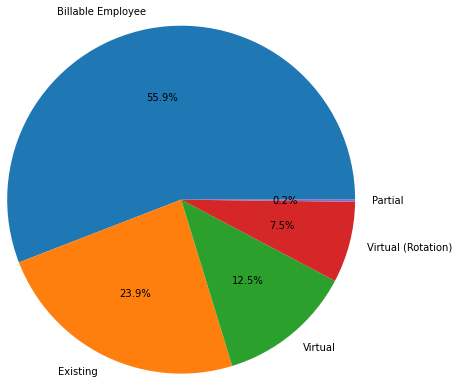

In [1041]:
df1=df_prof_comp["emp_stat"].value_counts().to_frame()

dfn=df1.copy()

df1.loc["Total"]=df1.sum()
df1.reset_index(inplace=True)
dfn.reset_index(inplace=True)
df1.rename(columns={"emp_stat":"count","index":"employee status"},inplace=True)
dfn.rename(columns={"emp_stat":"count","index":"employee status"},inplace=True)
df1.name="Employee Status Distribution"

plt.pie(dfn["count"], labels = dfn["employee status"],autopct='%1.1f%%',radius=2)

plt.savefig("americanpic1h.png",bbox_inches = 'tight')

worksheet6.write(2,12,"Employee Status Distribution")
worksheet6.write_string(3, 2, df1.name,cell_format)
start_row=0+5
bottom_border=start_row+df1.shape[0]-1
top_right=2+df1.shape[1]-1


df1.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,index=False,header=False)

worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, 4, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df1.columns.values):
    worksheet6.write(4, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,12, 'americanpic1h.png',{'x_scale': 0.5, 'y_scale': 0.5})
worksheet6.write(bottom_border, 2,"Total",new_format2)
df1

In [1042]:
df_prof_comp["recent_project_updated_flag"]=df_prof_comp["recent_project_updated_flag"].replace("updated","updated1")
df_prof_comp["project_skills_atleast_1_flag"]=df_prof_comp["project_skills_atleast_1_flag"].replace("updated","updated2")
df_prof_comp["project_responsibility_updated_flag"]=df_prof_comp["project_responsibility_updated_flag"].replace("updated","updated3")

emp_stat,Employee Status:,Billable Employee,Existing,Virtual,Virtual (Rotation),Partial,Total
4,Total,45398,19390,10176,6121,161,81246
0,With Projects,35386,4208,7220,5284,126,52224
1,With Recent Projects,13731,1316,2657,1940,31,19675
2,With Project Skill,12061,972,2281,1696,22,17032
3,With Project Resposibility,9311,786,1734,1261,16,13108


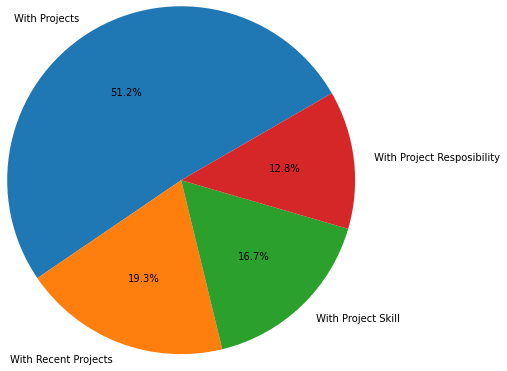

In [1043]:
#next table

x=df_prof_comp[df_prof_comp["projects_present_or_not_flag"]=="projects_present"]
dfa = pd.pivot_table(x, index =["projects_present_or_not_flag"],columns=["emp_stat"],aggfunc ="size",fill_value=0)

x=df_prof_comp[df_prof_comp["recent_project_updated_flag"]=="updated1"]
dfb = pd.pivot_table(x, index =["recent_project_updated_flag"],columns=["emp_stat"],aggfunc ="size",fill_value=0)

x1=x[x["project_skills_atleast_1_flag"]=="updated2"]
dfc = pd.pivot_table(x1, index =["project_skills_atleast_1_flag"],columns=["emp_stat"],aggfunc ="size",fill_value=0)

x2=x1[x1["project_responsibility_updated_flag"]=="updated3"]
dfd = pd.pivot_table(x2, index =["project_responsibility_updated_flag"],columns=["emp_stat"],aggfunc ="size",fill_value=0)


df2=pd.concat([dfa,dfb,dfc,dfd])
df2.rename(index={"projects_present":"With Projects","updated1":"With Recent Projects","updated2":" With Project Skill","updated3":" With Project Resposibility"},inplace=True)
df2["Total"]=df2.sum(axis=1)

df2=df2.reindex(columns=["Billable Employee","Existing","Virtual","Virtual (Rotation)","Partial","Total"])
dfn=df2.copy()
df2.loc["Total"]=df1["count"].values

df2.reset_index(inplace=True)
dfn.reset_index(inplace=True)
df2=df2.reindex([4,0,1,2,3])
df2.rename(columns={"index":"Employee Status:"},inplace=True)


plt.pie(dfn["Total"], labels = dfn["index"],autopct='%1.1f%%',radius=2,startangle=30)
plt.savefig("americanpic2h.png",bbox_inches = 'tight')

df2.name="Employee Status: Project Analysis"

worksheet6.write_string(bottom_border+3+5+1, 2, df2.name,cell_format)
worksheet6.write(17+1,12,"Employee Status: Project Analysis")

start_row=bottom_border+5+5+1
bottom_border=start_row+df2.shape[0]-1
top_right=2+df2.shape[1]-1



df2.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df2.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,12, 'americanpic2h.png',{'x_scale': 0.5, 'y_scale': 0.5})    
df2


In [1044]:
#creating percentage equivalency table for the above :

    
Billable_Employee=list(df2["Billable Employee"].apply(lambda x:(x/df2["Billable Employee"][4])*100))
Existing=list(df2["Existing"].apply(lambda x:(x/df2["Existing"][4])*100))
Partial=list(df2["Partial"].apply(lambda x:(x/df2["Partial"][4])*100))
Virtual=list(df2["Virtual"].apply(lambda x:(x/df2["Virtual"][4])*100))
Virtual_Rotation=list(df2["Virtual (Rotation)"].apply(lambda x:(x/df2["Virtual (Rotation)"][4])*100))
Total=list(df2["Total"].apply(lambda x:(x/df2["Total"][4])*100))

df3 = pd.DataFrame({"Employee Status":list(df2["Employee Status:"].values),"Billable Employee":Billable_Employee,"Existing":Existing,"Partial":Partial,"Virtual":Virtual,"Virtual (Rotation)":Virtual_Rotation,"Total":Total})
df3=df3.round(1)

df3['Billable Employee'] = df3['Billable Employee'].astype(str) + '%'
df3['Existing'] = df3['Existing'].astype(str) + '%'
df3['Partial'] = df3['Partial'].astype(str) + '%'
df3['Virtual'] = df3['Virtual'].astype(str) + '%'
df3['Virtual (Rotation)'] = df3['Virtual (Rotation)'].astype(str) + '%'
df3['Total'] = df3['Total'].astype(str) + '%'

df3.name="Employee Status Analysis : Percentage Equivalency"

worksheet6.write_string(bottom_border+3+1, 2, df3.name,cell_format)


start_row=bottom_border+5+1
bottom_border=start_row+df3.shape[0]-1
top_right=2+df3.shape[1]-1



df3.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df3.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
df3

    

,Employee Status,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation),Total
0,Total,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%
1,With Projects,77.9%,21.7%,78.3%,71.0%,86.3%,64.3%
2,With Recent Projects,30.2%,6.8%,19.3%,26.1%,31.7%,24.2%
3,With Project Skill,26.6%,5.0%,13.7%,22.4%,27.7%,21.0%
4,With Project Resposibility,20.5%,4.1%,9.9%,17.0%,20.6%,16.1%


In [1045]:
#next table



In [1046]:
df_prof_comp["count"]=1
x=df_prof_comp[df_prof_comp["number_of_skills_in_project"]>=1]
dfa = pd.pivot_table(x, index =["count"],columns=["emp_stat"],aggfunc="size",fill_value=0)
dfa.rename(index={1:"Has Project skills"},inplace=True)
dfa

emp_stat,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation)
count,,,,,
Has Project skills,32512,3594,113,6570,4835


In [1047]:
x1=df_prof_comp[df_prof_comp["number_of_skills_in_all"]==0]
dfb = pd.pivot_table(x1, index =["count"],columns=["emp_stat"],aggfunc="size",fill_value=0)
dfb.rename(index={1:"Has No Skills"},inplace=True)
dfb

emp_stat,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation)
count,,,,,
Has No Skills,9903,15279,36,2979,776


In [1048]:
x=df_prof_comp[df_prof_comp["number_of_skills_in_project"]==0]
x2=x[x["number_of_skills_in_all"]>=1]
dfc = pd.pivot_table(x2, index =["count"],columns=["emp_stat"],aggfunc="size",fill_value=0)
dfc.rename(index={1:"Has Other Skills"},inplace=True)
dfc

emp_stat,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation)
count,,,,,
Has Other Skills,2983,517,12,627,510


emp_stat,Employee Status:,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation),Total
0,Has Project skills,32512,3594,113,6570,4835,47624
1,Has No Skills,9903,15279,36,2979,776,28973
2,Has Other Skills,2983,517,12,627,510,4649
3,Total,45398,19390,161,10176,6121,81246


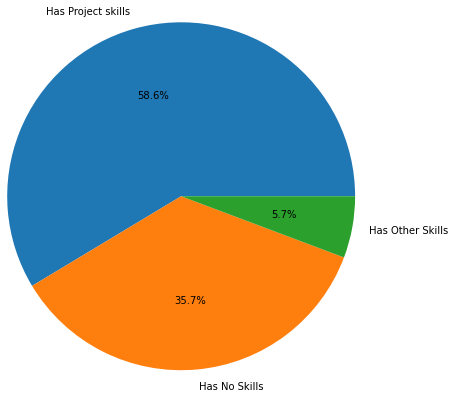

In [1049]:
df4=pd.concat([dfa,dfb,dfc])

df4["Total"]=df4.sum(axis=1)
dfn=df4.copy()
df4.loc["Total"]=df4.sum()
df4.reset_index(inplace=True)
dfn.reset_index(inplace=True)

df4.rename(columns={"count":"Employee Status:"},inplace=True)

df4.name="Employee Status: Skill Analysis"

plt.pie(dfn["Total"], labels = dfn["count"],autopct='%1.1f%%',radius=2)
plt.savefig("americanpic3h.png",bbox_inches = 'tight')

worksheet6.write_string(bottom_border+3+3, 2, df4.name,cell_format)
worksheet6.write(40,12,"Employee Status: Skill Analysis")

start_row=bottom_border+5+3
bottom_border=start_row+df4.shape[0]-1
top_right=2+df4.shape[1]-1



df4.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df4.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)

worksheet6.insert_image(start_row-1,12, 'americanpic3h.png',{'x_scale': 0.5, 'y_scale': 0.5}) 
worksheet6.write(bottom_border, 2,"Total",new_format2)
df4

In [1050]:
# next table

Billable_Employee=list(df4["Billable Employee"].apply(lambda x:(x/df4["Billable Employee"][3])*100))
Existing=list(df4["Existing"].apply(lambda x:(x/df4["Existing"][3])*100))
Partial=list(df4["Partial"].apply(lambda x:(x/df4["Partial"][3])*100))
Virtual=list(df4["Virtual"].apply(lambda x:(x/df4["Virtual"][3])*100))
Virtual_Rotation=list(df4["Virtual (Rotation)"].apply(lambda x:(x/df4["Virtual (Rotation)"][3])*100))
Total=list(df4["Total"].apply(lambda x:(x/df4["Total"][3])*100))

df5 = pd.DataFrame({"Employee Status:":list(df4["Employee Status:"].values),"Billable Employee":Billable_Employee,"Existing":Existing,"Partial":Partial,"Virtual":Virtual,"Virtual (Rotation)":Virtual_Rotation,"Total":Total})
df5=df5.round(1)

df5['Billable Employee'] = df5['Billable Employee'].astype(str) + '%'
df5['Existing'] = df5['Existing'].astype(str) + '%'
df5['Partial'] = df5['Partial'].astype(str) + '%'
df5['Virtual'] = df5['Virtual'].astype(str) + '%'
df5['Virtual (Rotation)'] = df5['Virtual (Rotation)'].astype(str) + '%'
df5['Total'] = df5['Total'].astype(str) + '%'

df5.name="Employee Status: Skill Analysis Percentage Equivalency"

worksheet6.write_string(bottom_border+3+1, 2, df5.name,cell_format)


start_row=bottom_border+5+1
bottom_border=start_row+df5.shape[0]-1
top_right=2+df5.shape[1]-1



df5.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df5.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
    
worksheet6.set_row(1,20,title_format)
worksheet6.write(bottom_border, 2,"Total",new_format2)
worksheet6.write(1, 2,"Profile Completness Analysis",cell_format1)
worksheet6.hide_gridlines(2)
df5


,Employee Status:,Billable Employee,Existing,Partial,Virtual,Virtual (Rotation),Total
0,Has Project skills,71.6%,18.5%,70.2%,64.6%,79.0%,58.6%
1,Has No Skills,21.8%,78.8%,22.4%,29.3%,12.7%,35.7%
2,Has Other Skills,6.6%,2.7%,7.5%,6.2%,8.3%,5.7%
3,Total,100.0%,100.0%,100.0%,100.0%,100.0%,100.0%


In [1051]:
df_prof_comp.head()

,emp_no,emp_tbl_bench,modified,recent_skills,projects,certifications,trainings,emp_stat,responsibility,project_skills,...,project_responsibility_length,current_date,days_since_project_not_modified,project_responsibility_updated_flag,recent_project_updated_flag,project_skills_atleast_1_flag,all_skills_atleast_1_flag,projects_present_or_not_flag,no_projects_and_no_skills_present_flag,count
0,M1toQGRR7WSBghR7k1WU9JmFRDhkNxQFNqbiFuu8gIg=,NO,2020-11-10T03:54:04,[u'ORACLE ENTERPRISE PLANNING AND BUDGETING CL...,"[{u'domain': u'MANUFACTURING', u'name': u'UNIL...","[{u'skills': [], u'type': u'External', u'name'...","[{u'end': u'2018-08-23', u'name': u'PSHC', u's...",Billable Employee,• Successfully handling all the tasksissues i...,[u'ORACLE ENTERPRISE PLANNING AND BUDGETING CL...,...,887,2021-06-01,287,updated3,updated1,updated2,updated,projects_present,projects_and_skills_present,1
1,fEfOLhtVKiOoJ8ewIRgPVccuaXQAeHjJozpZHYKjGec=,NO,2021-04-01T00:00:00,[],"[{u'domain': u'AUTOMOTIVE', u'name': u'ON BOAR...","[{u'skills': [{u'posid': 9650, u'proficiency':...","[{u'end': u'2018-06-11', u'name': u'Corporate ...",Billable Employee,To handle customer and project team requests,[u'AUTOMOTIVE DIAGNOSTICS AND MEASUREMENT CALI...,...,44,2021-06-01,62,not_updated,updated1,updated2,updated,projects_present,projects_and_skills_present,1
2,LxpCpUoVm0rZzD7ZjnSeWApGhIVS/cN2U42E8u6y4SA=,NO,2021-04-13T00:00:00,[],"[{u'domain': u'BANKING AND FINANCE', u'name': ...","[{u'skills': [{u'posid': 6478, u'proficiency':...","[{u'end': u'2020-03-27', u'name': u'JAX-RS - J...",Virtual (Rotation),A developer is responsible for many duties thr...,"[u'C# - CSHARP-PROGRAMMING', u'ADO.NET', u'ADO...",...,310,2021-06-01,69,updated3,updated1,updated2,updated,projects_present,projects_and_skills_present,1
3,MbOF6VJvfO6UI/PYAvBEQGvhvTl05xSY55J7ItRlHus=,NO,2021-04-05T10:53:49,[],"[{u'domain': u'CLOUD COMPUTING', u'name': u'IU...","[{u'skills': [], u'type': u'External', u'name'...","[{u'end': u'2019-12-18', u'name': u'Spirit of ...",Billable Employee,1. Talk to Customer to understand business req...,[],...,432,2021-06-01,231,updated3,updated1,not_updated,not_updated,projects_present,projects_and_skills_present,1
4,H1IGMWM2CZda4NJUo50RDi+x1bp4j9e2zBBgF4Eiulc=,NO,2021-04-06T11:19:39,"[u'WCF - WINDOWS COMMUNICATION FOUNDATION', u'...","[{u'domain': u'CONSUMER PRODUCTS', u'name': u'...",[],"[{u'end': u'2016-10-25', u'name': u'PSHC', u's...",Billable Employee,My Responsibilities:1. Incident management – W...,"[u'WCF - WINDOWS COMMUNICATION FOUNDATION', u'...",...,1183,2021-06-01,56,updated3,updated1,updated2,updated,projects_present,projects_and_skills_present,1


In [1052]:
worksheet6.write(bottom_border+2+1, 1,"Project & Skills Distribution",cell_format2)
worksheet6.write_string(bottom_border+2+1, 2, df6.name,cell_format)
worksheet6.write(bottom_border+2+1, 2,"",cell_format2)
worksheet6.write(bottom_border+2+1, 0,"",cell_format2)
worksheet6.write(bottom_border+2+1, 3,"",cell_format2)

0

,Number of Trainings,Supplies
0,0-10,46246
1,10-20,16401
2,20-30,10002
3,30-40,5088
4,40-50,2095
5,50 and above,1414
6,Total,81246


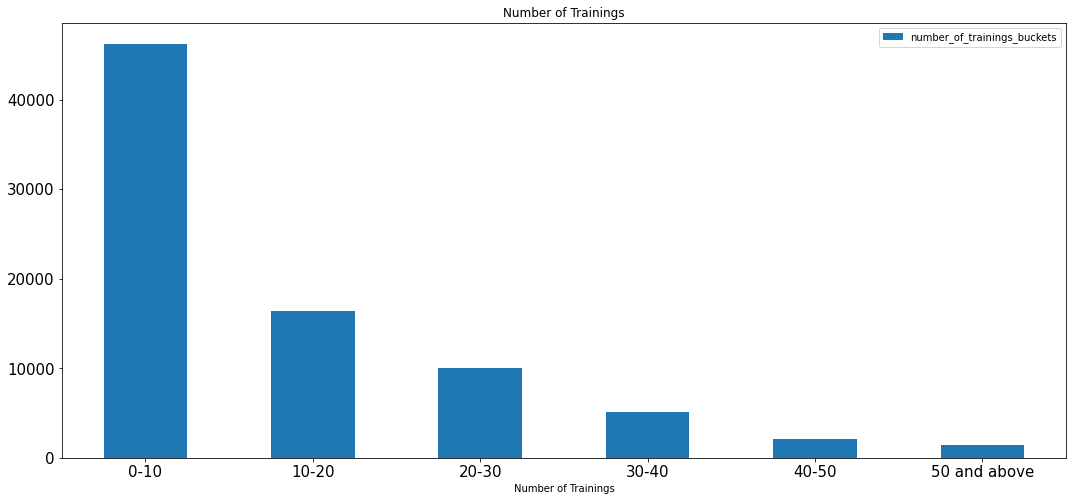

In [1053]:
#NUMBER OF TRAININGS: DISTRIBUTION

df_prof_comp["number_of_trainings"]


list1=[]
for x in df_prof_comp["number_of_trainings"]:
    
    if x<11 and x>0:
        v="0-10"
    elif x>10 and x<21:
        v="10-20"
    elif x>20 and x<31:
        v="20-30"
    elif x>30 and x<41:
        v="30-40"
    elif x>40 and x<51:
        v="40-50"
    
    elif x>51:
        v="50 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["number_of_trainings_buckets"]=list1


df=df_prof_comp["number_of_trainings_buckets"].value_counts().to_frame()

df.plot.bar(figsize=(18,8))
plt.title("Number of Trainings")
plt.xlabel("Number of Trainings")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic4h.png",bbox_inches = 'tight')

df.loc["Total"]=df.sum()
df.reset_index(inplace=True)
df.rename(columns={"index":"Number of Trainings","number_of_trainings_buckets":"Supplies"},inplace=True)

df.name="Number Of Trainings"

worksheet6.write_string(bottom_border+3+1+2, 2, df.name,cell_format)


start_row=bottom_border+5+1+2
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic4h.png',{'x_scale': 0.5, 'y_scale': 0.5})     
worksheet6.write(bottom_border, 2,"Total",new_format2)
df


In [1054]:
df_prof_comp["number_of_projects"].max()

102

,Number of Projects,Supplies
0,0-10,71763
1,10-20,8584
2,20-30,798
3,30-40,76
4,40-50,14
5,50 and above,11
6,Total,81246


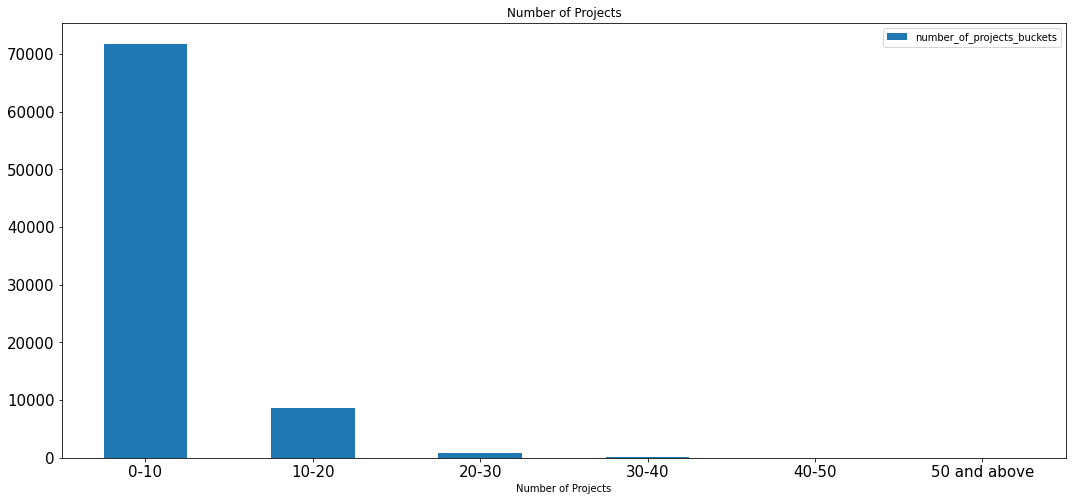

In [1055]:
#NUMBER OF PROJECTS: DISTRIBUTION




list1=[]
for x in df_prof_comp["number_of_projects"]:
    
    if x<11 and x>0:
        v="0-10"
    elif x>10 and x<21:
        v="10-20"
    elif x>20 and x<31:
        v="20-30"
    elif x>30 and x<41:
        v="30-40"
    elif x>40 and x<51:
        v="40-50"
    
    elif x>51:
        v="50 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["number_of_projects_buckets"]=list1


df=df_prof_comp["number_of_projects_buckets"].value_counts().to_frame()

df.plot.bar(figsize=(18,8))
plt.title("Number of Projects")
plt.xlabel("Number of Projects")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic5h.png",bbox_inches = 'tight')
df.loc["Total"]=df.sum()
df.reset_index(inplace=True)
df.rename(columns={"index":"Number of Projects","number_of_projects_buckets":"Supplies"},inplace=True)

df.name="Number Of Projects"

worksheet6.write_string(bottom_border+3+1+6, 2, df.name,cell_format)


start_row=bottom_border+5+1+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic5h.png',{'x_scale': 0.5, 'y_scale': 0.5})     
worksheet6.write(bottom_border, 2,"Total",new_format2)
df




In [1056]:
df_prof_comp["number_of_skills_in_project"].max()

2096

,Number of Skills,Supplies
0,0-10,42087
1,10-20,19716
2,20-30,8630
3,30-40,4492
4,40-50,2361
5,50 and above,3960
6,Total,81246


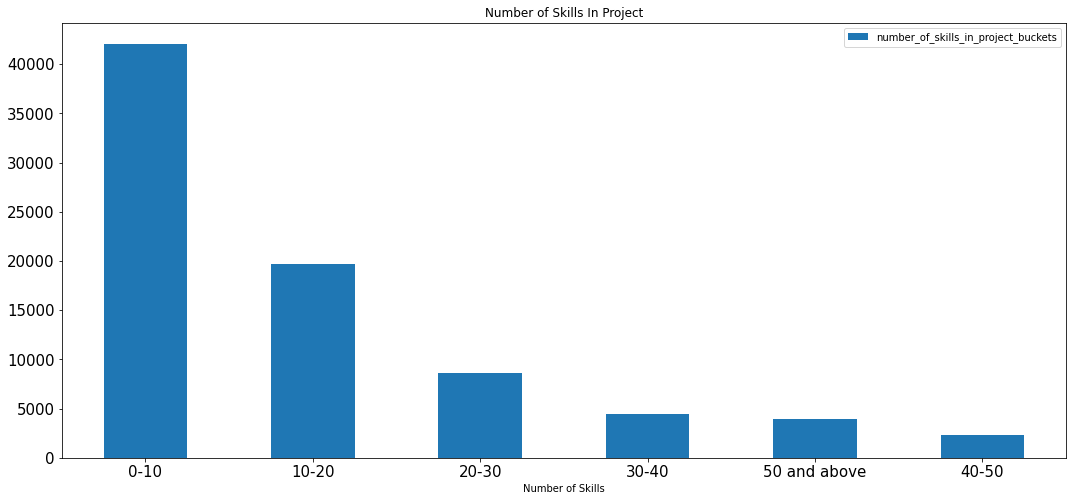

In [1057]:
#NUMBER OF SKILLS IN PROJECT: DISTRIBUTION




list1=[]
for x in df_prof_comp["number_of_skills_in_project"]:
    
    if x<11 and x>0:
        v="0-10"
    elif x>10 and x<21:
        v="10-20"
    elif x>20 and x<31:
        v="20-30"
    elif x>30 and x<41:
        v="30-40"
    elif x>40 and x<51:
        v="40-50"
    
    elif x>51:
        v="50 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["number_of_skills_in_project_buckets"]=list1


df=df_prof_comp["number_of_skills_in_project_buckets"].value_counts().to_frame()

df.plot.bar(figsize=(18,8))
plt.title("Number of Skills In Project")
plt.xlabel("Number of Skills")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic6h.png",bbox_inches = 'tight')

df=df.reindex(["0-10","10-20","20-30","30-40","40-50","50 and above"])
df.loc["Total"]=df.sum()
df.reset_index(inplace=True)
df.rename(columns={"index":"Number of Skills","number_of_skills_in_project_buckets":"Supplies"},inplace=True)
df.name="Number Of Skills In Project"

worksheet6.write_string(bottom_border+3+1+6, 2, df.name,cell_format)


start_row=bottom_border+5+1+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic6h.png',{'x_scale': 0.5, 'y_scale': 0.5})     
worksheet6.write(bottom_border, 2,"Total",new_format2)
df


,Number of Skills,Supplies
0,0-10,50416
1,10-20,18093
2,20-30,6334
3,30-40,2755
4,40-50,1265
5,50 and above,2383
6,Total,81246


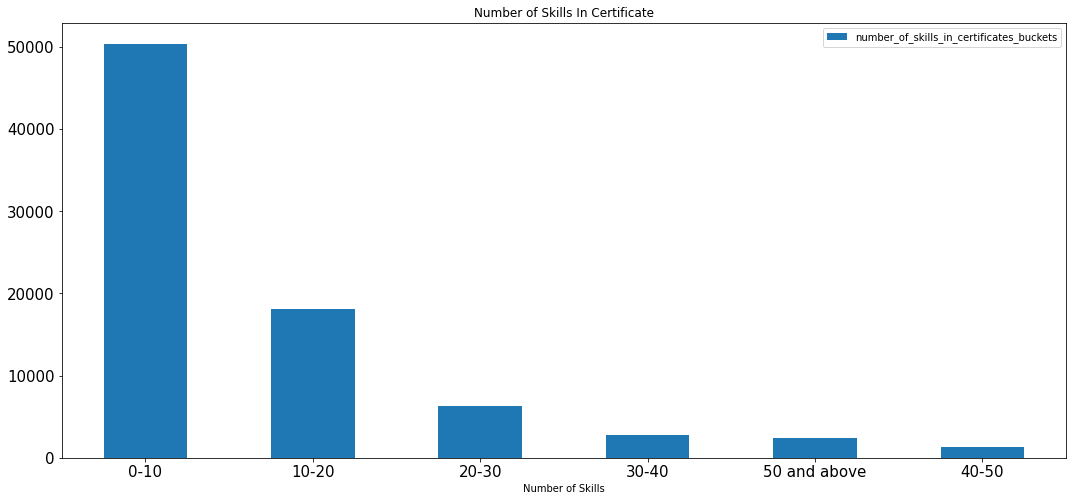

In [1058]:
#NUMBER OF SKILLS IN CERTIFICATE : DISTRIBUTION




list1=[]
for x in df_prof_comp["number_of_skills_in_certificates"]:
    
    if x<11 and x>0:
        v="0-10"
    elif x>10 and x<21:
        v="10-20"
    elif x>20 and x<31:
        v="20-30"
    elif x>30 and x<41:
        v="30-40"
    elif x>40 and x<51:
        v="40-50"
    
    elif x>51:
        v="50 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["number_of_skills_in_certificates_buckets"]=list1


df=df_prof_comp["number_of_skills_in_certificates_buckets"].value_counts().to_frame()

df.plot.bar(figsize=(18,8))
plt.title("Number of Skills In Certificate")
plt.xlabel("Number of Skills")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic7h.png",bbox_inches = 'tight')

df=df.reindex(["0-10","10-20","20-30","30-40","40-50","50 and above"])
df.loc["Total"]=df.sum()
df.reset_index(inplace=True)
df.rename(columns={"index":"Number of Skills","number_of_skills_in_certificates_buckets":"Supplies"},inplace=True)

df.name="Number Of Skills In Certificate"

worksheet6.write_string(bottom_border+3+1+6, 2, df.name,cell_format)


start_row=bottom_border+5+1+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic7h.png',{'x_scale': 0.5, 'y_scale': 0.5})     
worksheet6.write(bottom_border, 2,"Total",new_format2)
df

In [1059]:
df_prof_comp.columns

Index(['emp_no', 'emp_tbl_bench', 'modified', 'recent_skills', 'projects',
       'certifications', 'trainings', 'emp_stat', 'responsibility',
       'project_skills', 'certificate_skills', 'training_name',
       'recent+project_skills+certificate_skills', 'number_of_skills_in_all',
       'number_of_skills_in_project', 'number_of_skills_in_certificates',
       'number_of_trainings', 'number_of_projects', 'project_modified_date',
       'project_responsibility_length', 'current_date',
       'days_since_project_not_modified',
       'project_responsibility_updated_flag', 'recent_project_updated_flag',
       'project_skills_atleast_1_flag', 'all_skills_atleast_1_flag',
       'projects_present_or_not_flag',
       'no_projects_and_no_skills_present_flag', 'count',
       'number_of_trainings_buckets', 'number_of_projects_buckets',
       'number_of_skills_in_project_buckets',
       'number_of_skills_in_certificates_buckets'],
      dtype='object')

In [1060]:
df_prof_comp["number_of_skills_in_certificates"].max()

10743

,Number of Skills,Supplies
0,0-10,40071
1,10-20,24923
2,20-30,11099
3,30-40,3890
4,40-50,1004
5,50 and above,259
6,Total,81246


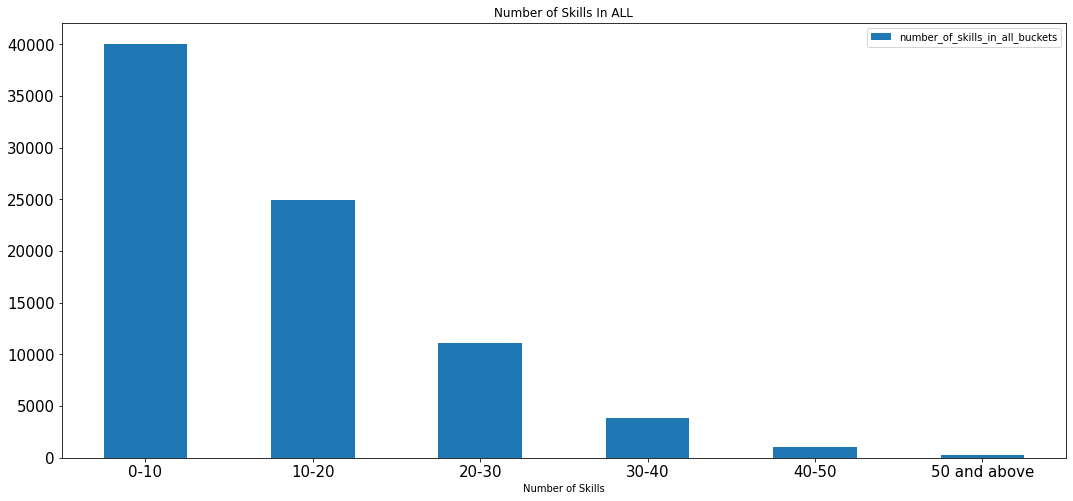

In [1061]:
#NUMBER OF SKILLS IN ALL : DISTRIBUTION




list1=[]
for x in df_prof_comp["number_of_skills_in_all"]:
    
    if x<11 and x>0:
        v="0-10"
    elif x>10 and x<21:
        v="10-20"
    elif x>20 and x<31:
        v="20-30"
    elif x>30 and x<41:
        v="30-40"
    elif x>40 and x<51:
        v="40-50"
    
    elif x>51:
        v="50 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["number_of_skills_in_all_buckets"]=list1


df=df_prof_comp["number_of_skills_in_all_buckets"].value_counts().to_frame()

df.plot.bar(figsize=(18,8))
plt.title("Number of Skills In ALL")
plt.xlabel("Number of Skills")
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.savefig("americanpic8h.png",bbox_inches = 'tight')
df.loc["Total"]=df.sum()
df.reset_index(inplace=True)
df.rename(columns={"index":"Number of Skills","number_of_skills_in_all_buckets":"Supplies"},inplace=True)

df.name="Number Of Skills In All"

worksheet6.write_string(bottom_border+3+1+6, 2, df.name,cell_format)


start_row=bottom_border+5+1+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic8h.png',{'x_scale': 0.5, 'y_scale': 0.5})  
worksheet6.write(bottom_border, 2,"Total",new_format2)
df

In [1062]:
df_prof_comp["days_since_project_not_modified"]

0        287
1         62
2         69
3        231
4         56
        ... 
40618    698
40619    383
40620    108
40621    290
40622     57
Name: days_since_project_not_modified, Length: 81246, dtype: int64

count,Days since project not updated,Supplies
0,0-100,3918
1,100-200,5876
2,200-300,5337
3,300-400,5667
4,400-500,5257
5,500 and above,25424
6,project end date in future,667
7,project end date not present,29100


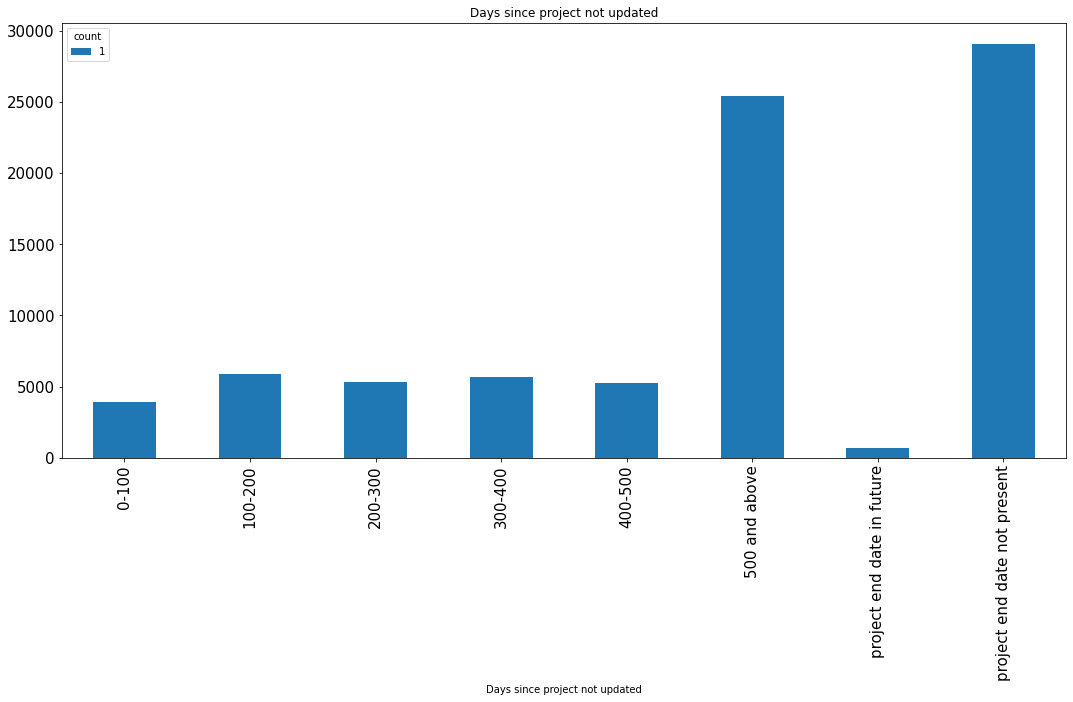

In [1063]:
#Days since project not updated


list1=[]
for x in df_prof_comp["days_since_project_not_modified"]:
    if x<0:
        v="project end date in future"
    elif x<101 and x>0:
        v="0-100"
    elif x>100 and x<201:
        v="100-200"
    elif x>200 and x<301:
        v="200-300"
    elif x>300 and x<401:
        v="300-400"
    elif x>400 and x<501:
        v="400-500"
    elif x==1000000:
        v="project end date not present"
    
    elif x>500:
        v="500 and above"
    
    
    else:
        pass
    list1.append(v)

df_prof_comp["days_since_project_not_modified_bucket"]=list1

df = pd.pivot_table(df_prof_comp, index =["days_since_project_not_modified_bucket"],columns=["count"],aggfunc ="size",fill_value=0)
df.plot.bar(figsize=(18,8))
plt.title("Days since project not updated")
plt.xlabel("Days since project not updated")
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.savefig("americanpic9h.png",bbox_inches = 'tight')

df.reset_index(inplace=True)
df.rename(columns={'days_since_project_not_modified_bucket':"Days since project not updated",1:'Supplies'},inplace=True)

df.name="Days Since Project Not Updated "

worksheet6.write_string(bottom_border+3+1+6, 2, df.name,cell_format)


start_row=bottom_border+5+1+6
bottom_border=start_row+df.shape[0]-1
top_right=2+df.shape[1]-1



df.to_excel(writer,sheet_name='Profile Completness Analysis',startrow=start_row , startcol=2,header=False,index=False)
border_fmt = workbook.add_format({'bottom':1, 'top':1, 'left':1, 'right':1})
worksheet6.conditional_format(xlsxwriter.utility.xl_range(bottom_border, 2, start_row-1, top_right), {'type': 'no_errors', 'format': border_fmt})
for col_num, value in enumerate(df.columns.values):
    worksheet6.write(start_row-1, 2+col_num, value, header_format)
worksheet6.insert_image(start_row-1,8, 'americanpic9h.png',{'x_scale': 0.5, 'y_scale': 0.5}) 
writer.save()
df

In [1064]:
#END OF PROGRAM

end="program execution succesful & output file saved"
end

'program execution succesful & output file saved'